# Train Preprocessing

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data =pd.read_csv("/content/drive/MyDrive/Colab Notebooks/ML/train.csv")

In [ ]:
data.head()

,inst_id,OC,sido,sgg,openDate,bedCount,instkind,revenue1,salescost1,sga1,salary1,noi1,noe1,interest1,ctax1,profit1,liquidAsset1,quickAsset1,receivableS1,inventoryAsset1,nonCAsset1,tanAsset1,OnonCAsset1,receivableL1,debt1,liquidLiabilities1,shortLoan1,NCLiabilities1,longLoan1,netAsset1,surplus1,revenue2,salescost2,sga2,salary2,noi2,noe2,interest2,ctax2,profit2,liquidAsset2,quickAsset2,receivableS2,inventoryAsset2,nonCAsset2,tanAsset2,OnonCAsset2,receivableL2,debt2,liquidLiabilities2,shortLoan2,NCLiabilities2,longLoan2,netAsset2,surplus2,employee1,employee2,ownerChange
0,1,open,choongnam,73,20071228,175.0,nursing_hospital,4.217530e+09,0.0,3.961135e+09,2.033835e+09,15652441.0,1.523624e+07,1.323624e+07,31641798.0,225169678.0,1.012700e+09,9.976719e+08,4.700557e+08,1.502781e+07,2.514586e+09,2.360684e+09,1.434496e+08,0.0,6.828260e+08,2.013237e+08,0.000000e+00,4.815023e+08,3.510000e+08,2.844460e+09,1.496394e+09,4.297848e+09,0.0,4.057422e+09,2.063787e+09,16194675.0,2.998335e+07,1.568305e+07,18808074.0,207829685.0,8.301695e+08,8.165705e+08,5.237026e+08,1.359897e+07,2.548115e+09,2.386263e+09,1.458986e+08,0.0,7.589937e+08,2.228769e+08,0.000000e+00,5.361169e+08,3.900000e+08,2.619290e+09,1.271224e+09,62.0,64.0,same
1,3,open,gyeongnam,32,19970401,410.0,general_hospital,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,801.0,813.0,same
2,4,open,gyeonggi,89,20161228,468.0,nursing_hospital,1.004522e+09,515483669.0,4.472197e+08,2.964023e+08,76156.0,3.000000e+04,0.000000e+00,0.0,41864754.0,2.724421e+08,2.536822e+08,8.095950e+06,1.875997e+07,1.204810e+08,1.204810e+08,0.000000e+00,0.0,9.241434e+07,9.241434e+07,0.000000e+00,0.000000e+00,0.000000e+00,3.005088e+08,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,234.0,1.0,same
3,7,open,incheon,141,20000814,353.0,general_hospital,7.250734e+10,0.0,7.067740e+10,3.178605e+10,506223059.0,1.259568e+09,1.196881e+09,173769780.0,902830288.0,1.304154e+10,1.153475e+10,0.000000e+00,1.506793e+09,4.317936e+10,3.832078e+10,3.945208e+09,0.0,4.236380e+10,2.799188e+10,1.988520e+10,1.437192e+10,7.253040e+09,1.385710e+10,8.643659e+09,6.685834e+10,0.0,6.492419e+10,2.971135e+10,476807804.0,1.353672e+09,1.277422e+09,218891720.0,838387466.0,1.112572e+10,9.890540e+09,0.000000e+00,1.235181e+09,3.958356e+10,3.485576e+10,3.915906e+09,0.0,3.775501e+10,1.701860e+10,9.219427e+09,2.073641e+10,1.510000e+10,1.295427e+10,7.740829e+09,663.0,663.0,same
4,9,open,gyeongnam,32,20050901,196.0,general_hospital,4.904354e+10,0.0,4.765605e+10,2.446078e+10,112352259.0,1.419089e+09,1.307249e+09,0.0,80749696.0,6.317084e+09,5.873265e+09,4.099320e+09,4.438186e+08,4.366733e+10,4.330613e+10,2.223400e+08,0.0,4.989811e+10,2.890919e+10,1.793038e+10,2.098892e+10,1.350000e+10,8.631164e+07,9.025550e+09,4.808280e+10,0.0,4.712580e+10,2.346004e+10,597748128.0,1.522108e+09,1.349851e+09,0.0,32642585.0,4.906776e+09,4.464017e+09,3.365227e+09,4.427591e+08,4.653138e+10,4.562945e+10,7.893407e+08,0.0,5.143259e+10,3.007259e+10,1.759375e+10,2.136001e+10,1.410803e+10,5.561941e+06,9.025550e+09,206.0,197.0,same


In [ ]:
data_prep = data.copy()
data_prep.drop(['inst_id','sgg'],axis=1,inplace=True)

In [ ]:
data_prep['OC'].replace({' close':0,'open':1},inplace=True)

In [ ]:
data_prep['OC'].value_counts()

1    286
0     15
Name: OC, dtype: int64

In [ ]:
data_prep['sido'].value_counts().index

Index(['gyeonggi', 'gyeongbuk', 'gyeongnam', 'busan', 'choongnam', 'jeonnam',
       'seoul', 'jeonbuk', 'daegu', 'choongbuk', 'daejeon', 'incheon',
       'gangwon', 'ulsan', 'gwangju', 'sejong'],
      dtype='object')

1 경기도 13,571,450 <br>
2 서울특별시 9,505,926<br>
3 부산광역시 3,348,874<br>
3 경상남도 3,311,438<br>
3 인천광역시 2,949,150<br>
4 경상북도 2,624,310<br>
4 대구광역시 2,383,858<br>
4 충청남도 2,118,638<br>
5 전라남도 1,832,604<br>
5 전라북도 1,785,392<br>
5 충청북도 1,597,097<br>
5 강원도 1,538,660<br>
5 대전광역시 1,451,272<br>
5 광주광역시 1,441,636<br>
6 울산광역시 1,121,100<br>
7.제주도 674,484<br>
7 세종특별자치시 374,377<br>

In [ ]:
data_prep['sido'].replace({'gyeonggi':6,'seoul':5,
                           'busan':4,'gyeongnam':4,'incheon':4,
                          'gyeongbuk':3,'daegu':3,'choongnam':3,
                          'jeonnam':2,'jeonbuk':2,
                          'choongbuk':2,'gangwon':2,'daejeon':2,'gwangju':2,
                          'ulsan':1,'sejong':0,'jeju':0},inplace=True)

In [ ]:
data_prep['sido'].isnull().sum()

0

In [ ]:
data_prep['openDate'] = data['openDate'].apply(lambda x: int(str(x)[:4]))

In [ ]:
data_prep['openDate']

0      2007
1      1997
2      2016
3      2000
4      2005
       ... 
296    2005
297    2014
298    1983
299    2007
300    2001
Name: openDate, Length: 301, dtype: int64

In [ ]:
data_prep.rename(columns={'openDate':'openYear'},inplace=True)

In [ ]:
data_prep['openYear'].isnull().sum()

0

#### inst_kind

In [ ]:
data_prep['instkind'].isnull().sum()

1

In [ ]:
data_prep[data_prep['instkind'].isnull()]

,OC,sido,openYear,bedCount,instkind,revenue1,salescost1,sga1,salary1,noi1,noe1,interest1,ctax1,profit1,liquidAsset1,quickAsset1,receivableS1,inventoryAsset1,nonCAsset1,tanAsset1,OnonCAsset1,receivableL1,debt1,liquidLiabilities1,shortLoan1,NCLiabilities1,longLoan1,netAsset1,surplus1,revenue2,salescost2,sga2,salary2,noi2,noe2,interest2,ctax2,profit2,liquidAsset2,quickAsset2,receivableS2,inventoryAsset2,nonCAsset2,tanAsset2,OnonCAsset2,receivableL2,debt2,liquidLiabilities2,shortLoan2,NCLiabilities2,longLoan2,netAsset2,surplus2,employee1,employee2,ownerChange
193,0,6,2012,NaN,NaN,305438818.0,22416139.0,467475340.0,254868810.0,13451554.0,90129732.0,4239523.0,0.0,-261130839.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,534296550.0,64355691.0,869364734.0,675718430.0,1333.0,24317070.0,5929772.0,0.0,-423739612.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15.0,15.0,change


In [ ]:
data_prep.dropna(subset=['instkind'],axis=0,inplace=True)

In [ ]:
data_prep['instkind'].isnull().sum()

0

In [ ]:
data_prep['instkind'].unique()

array(['nursing_hospital', 'general_hospital', 'hospital',
       'traditional_clinic', 'clinic', 'traditional_hospital',
       'dental_clinic'], dtype=object)

In [ ]:
data_prep['instkind'].replace({'traditional_hospital':'others','traditional_clinic':'others','dental_clinic':'others'},inplace=True)

In [ ]:
data_prep['instkind'].unique()

array(['nursing_hospital', 'general_hospital', 'hospital', 'others',
       'clinic'], dtype=object)

#### bedCount

In [ ]:
data_prep['bedCount'].isnull().sum()

4

In [ ]:
data_prep[data_prep['bedCount'].isnull()]

,OC,sido,openYear,bedCount,instkind,revenue1,salescost1,sga1,salary1,noi1,noe1,interest1,ctax1,profit1,liquidAsset1,quickAsset1,receivableS1,inventoryAsset1,nonCAsset1,tanAsset1,OnonCAsset1,receivableL1,debt1,liquidLiabilities1,shortLoan1,NCLiabilities1,longLoan1,netAsset1,surplus1,revenue2,salescost2,sga2,salary2,noi2,noe2,interest2,ctax2,profit2,liquidAsset2,quickAsset2,receivableS2,inventoryAsset2,nonCAsset2,tanAsset2,OnonCAsset2,receivableL2,debt2,liquidLiabilities2,shortLoan2,NCLiabilities2,longLoan2,netAsset2,surplus2,employee1,employee2,ownerChange
71,0,2,1999,NaN,others,4.131858e+09,1.436118e+08,3.529097e+09,2.198043e+09,56630198.0,228194537.0,113598011.0,22221340.0,2.653634e+08,1.970952e+09,1.963787e+09,0.000000e+00,7165400.0,3.553691e+09,2.749986e+09,527179060.0,0.0,2.803885e+09,2.793826e+09,2.590000e+09,1.005862e+07,0.000000e+00,2.720758e+09,0.000000e+00,3.318141e+09,1.443104e+08,2.982098e+09,1.709276e+09,58244152.0,164510269.0,91316429.0,13350570.0,72115788.0,1.694659e+09,1.686307e+09,0.000000e+00,8351300.0,3.451466e+09,2.778451e+09,410506320.0,0.0,2.658296e+09,2.632717e+09,2.442951e+09,2.557878e+07,0.000000e+00,2.487828e+09,0.000000e+00,85.0,74.0,same
297,0,3,2014,NaN,hospital,6.717144e+09,8.200000e+09,0.000000e+00,0.000000e+00,186359.0,139851326.0,129697525.0,0.0,-1.622521e+09,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,79.0,79.0,same
298,0,3,1983,NaN,hospital,0.000000e+00,0.000000e+00,5.479428e+07,7.500000e+06,121022160.0,137980960.0,137980960.0,0.0,-7.175308e+07,3.867238e+09,3.867238e+09,1.132312e+09,0.0,5.569636e+09,5.419756e+09,67957340.0,0.0,6.249466e+09,2.050342e+09,0.000000e+00,4.199124e+09,2.498749e+09,3.187408e+09,0.000000e+00,3.132198e+09,2.971193e+09,3.529793e+08,1.479400e+08,173212032.0,133064432.0,107972617.0,0.0,-151827207.0,4.074622e+09,4.069797e+09,1.132312e+09,4825310.0,5.554636e+09,5.419756e+09,52957340.0,0.0,6.370097e+09,2.170973e+09,0.000000e+00,4.199124e+09,2.498749e+09,3.259161e+09,0.000000e+00,NaN,NaN,NaN
300,1,5,2001,NaN,others,1.340971e+09,8.108450e+08,5.043409e+08,1.318978e+08,2264007.0,73558495.0,73558495.0,0.0,-4.550929e+07,6.624176e+08,6.197801e+08,1.545963e+07,42637474.0,1.024680e+10,1.011968e+10,86930500.0,0.0,5.418547e+09,3.187619e+09,0.000000e+00,2.230928e+09,2.190000e+09,5.490668e+09,6.269440e+09,1.499012e+09,8.328015e+08,5.254614e+08,1.333380e+08,4301929.0,94393907.0,94355280.0,0.0,50657033.0,4.969613e+08,4.526867e+08,1.545534e+07,44274527.0,1.038822e+10,1.026110e+10,86930500.0,0.0,5.349000e+09,3.123072e+09,0.000000e+00,2.225928e+09,2.190000e+09,5.536178e+09,6.269440e+09,15.0,15.0,same


In [ ]:
data_prep['bedCount'] = data_prep['bedCount'].fillna(data_prep.groupby('instkind')['bedCount'].transform('mean'))

In [ ]:
data_prep['bedCount'].isnull().sum()

0

#### 금융데이터

In [ ]:
data_prep.dropna(subset=['revenue1'],axis=0,inplace=True)

In [ ]:
data_prep['salescost1'].isnull().sum()

0

#### employee

In [ ]:
data_prep[data_prep['employee1'].isnull()]

,OC,sido,openYear,bedCount,instkind,revenue1,salescost1,sga1,salary1,noi1,noe1,interest1,ctax1,profit1,liquidAsset1,quickAsset1,receivableS1,inventoryAsset1,nonCAsset1,tanAsset1,OnonCAsset1,receivableL1,debt1,liquidLiabilities1,shortLoan1,NCLiabilities1,longLoan1,netAsset1,surplus1,revenue2,salescost2,sga2,salary2,noi2,noe2,interest2,ctax2,profit2,liquidAsset2,quickAsset2,receivableS2,inventoryAsset2,nonCAsset2,tanAsset2,OnonCAsset2,receivableL2,debt2,liquidLiabilities2,shortLoan2,NCLiabilities2,longLoan2,netAsset2,surplus2,employee1,employee2,ownerChange
48,1,5,1994,28.00000,others,8.872427e+09,9.641249e+08,7.638920e+09,4.488958e+09,19153521.0,2.160889e+08,204479315.0,72446781.0,0.000000e+00,1.302115e+09,1.186743e+09,2.671059e+06,97648359.0,8.347311e+09,8.178953e+09,2200500.0,0.0,6.749132e+09,5.759132e+09,4.000000e+09,9.900000e+08,9.900000e+08,2.900294e+09,0.0,8.632333e+09,8.994174e+08,7.616309e+09,4.283771e+09,132492468.0,2.188810e+08,199357358.0,30218421.0,0.000000e+00,1.002794e+09,8.915144e+08,0.000000e+00,80868500.0,8.581435e+09,8.368729e+09,25520500.0,0.0,5.958278e+09,5.956278e+09,4.992758e+09,2.000000e+06,0.000000e+00,3.625952e+09,0.0,NaN,NaN,NaN
93,0,3,2007,203.00000,hospital,5.423357e+09,0.000000e+00,5.212041e+09,2.958250e+09,23843435.0,1.288886e+08,128638631.0,11620200.0,9.465001e+07,2.851343e+09,2.734711e+09,1.085357e+09,116632010.0,5.453158e+09,5.438850e+09,0.0,0.0,4.457667e+09,1.864667e+09,1.750000e+09,2.590000e+09,2.590000e+09,3.846834e+09,0.0,5.073663e+09,0.000000e+00,4.984086e+09,3.060034e+09,40391187.0,1.292911e+08,128791122.0,10915720.0,-1.023856e+07,1.181463e+09,1.161359e+09,8.314617e+08,20103590.0,5.304341e+09,5.290033e+09,0.0,0.0,2.733619e+09,1.406195e+08,0.000000e+00,2.590000e+09,2.590000e+09,3.752184e+09,0.0,NaN,NaN,NaN
206,1,4,2017,160.00000,nursing_hospital,3.279139e+09,3.726966e+08,3.507972e+09,2.659892e+09,1596568.0,8.306566e+07,83065655.0,0.0,-6.829984e+08,4.237100e+08,3.662513e+08,1.826044e+08,57458700.0,6.990698e+09,6.972698e+09,8000000.0,0.0,3.478121e+09,6.481208e+08,0.000000e+00,2.830000e+09,2.830000e+09,3.936287e+09,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,NaN,103.0,NaN
212,0,2,1999,66.00000,nursing_hospital,2.233031e+10,8.484657e+08,1.849255e+10,1.232241e+10,423628901.0,1.304817e+09,417949094.0,415894516.0,1.692204e+09,1.829292e+10,1.818429e+10,3.728960e+09,108635115.0,1.307623e+10,1.265639e+10,312415620.0,0.0,1.582736e+10,1.285973e+10,0.000000e+00,2.967635e+09,0.000000e+00,1.554179e+10,0.0,2.239509e+10,8.492085e+08,1.805503e+10,1.138885e+10,483447584.0,1.574478e+09,571079590.0,553752070.0,1.846078e+09,1.708819e+10,1.701879e+10,3.084699e+09,69397471.0,1.239357e+10,1.173006e+10,310415620.0,0.0,1.563217e+10,1.288180e+10,0.000000e+00,2.750371e+09,0.000000e+00,1.384958e+10,0.0,NaN,NaN,NaN
242,1,4,2017,0.00000,others,6.845503e+08,0.000000e+00,5.619356e+08,3.014000e+08,8067090.0,2.748281e+06,1364824.0,18640111.0,1.092933e+08,1.332665e+09,1.331507e+09,6.243635e+07,0.0,7.721058e+08,5.021058e+08,270000000.0,0.0,9.528087e+07,9.491087e+07,0.000000e+00,3.700000e+05,0.000000e+00,2.009490e+09,0.0,7.745608e+08,0.000000e+00,7.560969e+08,3.638300e+08,15339220.0,4.402666e+06,617047.0,8050806.0,2.134966e+07,1.172968e+09,1.171014e+09,4.916044e+07,0.0,7.968085e+08,5.268085e+08,270000000.0,0.0,6.957960e+07,6.920960e+07,0.000000e+00,3.700000e+05,0.000000e+00,1.900197e+09,0.0,NaN,NaN,NaN
263,1,2,2002,39.00000,hospital,3.007769e+09,1.197756e+09,2.258240e+09,1.775322e+09,611489427.0,5.279657e+07,52076570.0,0.0,1.104651e+08,9.443247e+08,8.065135e+08,4.782392e+08,137811283.0,2.105344e+09,1.999416e+09,100700000.0,0.0,1.898375e+09,3.590747e+08,0.000000e+00,1.539300e+09,1.539300e+09,1.151294e+09,359919226.0,2.890536e+09,1.210112e+09,2.202889e+09,1.781860e+09,672171687.0,5.485612e+07,51537693.0,0.0,9.485052e+07,7.930

In [ ]:
data_prep[data_prep['employee2'].isnull()]

,OC,sido,openYear,bedCount,instkind,revenue1,salescost1,sga1,salary1,noi1,noe1,interest1,ctax1,profit1,liquidAsset1,quickAsset1,receivableS1,inventoryAsset1,nonCAsset1,tanAsset1,OnonCAsset1,receivableL1,debt1,liquidLiabilities1,shortLoan1,NCLiabilities1,longLoan1,netAsset1,surplus1,revenue2,salescost2,sga2,salary2,noi2,noe2,interest2,ctax2,profit2,liquidAsset2,quickAsset2,receivableS2,inventoryAsset2,nonCAsset2,tanAsset2,OnonCAsset2,receivableL2,debt2,liquidLiabilities2,shortLoan2,NCLiabilities2,longLoan2,netAsset2,surplus2,employee1,employee2,ownerChange
35,0,6,2013,132.00000,nursing_hospital,2.681766e+09,1.802009e+08,2.014580e+09,9.366451e+08,59924069.0,4.287212e+08,284069476.0,0.0,1.181879e+08,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,2.093132e+09,1.428541e+08,1.751390e+09,9.164822e+08,21947086.0,1.472983e+08,113100675.0,0.0,7.353718e+07,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,51.0,NaN,change
48,1,5,1994,28.00000,others,8.872427e+09,9.641249e+08,7.638920e+09,4.488958e+09,19153521.0,2.160889e+08,204479315.0,72446781.0,0.000000e+00,1.302115e+09,1.186743e+09,2.671059e+06,97648359.0,8.347311e+09,8.178953e+09,2200500.0,0.0,6.749132e+09,5.759132e+09,4.000000e+09,9.900000e+08,9.900000e+08,2.900294e+09,0.0,8.632333e+09,8.994174e+08,7.616309e+09,4.283771e+09,132492468.0,2.188810e+08,199357358.0,30218421.0,0.000000e+00,1.002794e+09,8.915144e+08,0.000000e+00,80868500.0,8.581435e+09,8.368729e+09,25520500.0,0.0,5.958278e+09,5.956278e+09,4.992758e+09,2.000000e+06,0.000000e+00,3.625952e+09,0.0,NaN,NaN,NaN
62,1,4,2017,128.00000,nursing_hospital,5.236406e+08,2.306773e+07,8.355775e+08,5.644636e+08,7534205.0,5.263060e+07,52630597.0,0.0,-3.801011e+08,6.073662e+08,5.953914e+08,1.015000e+06,11974763.0,3.629704e+09,3.629704e+09,0.0,0.0,3.513950e+09,3.342069e+09,2.918153e+09,1.718817e+08,1.718817e+08,7.231197e+08,723119742.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,38.0,NaN,NaN
93,0,3,2007,203.00000,hospital,5.423357e+09,0.000000e+00,5.212041e+09,2.958250e+09,23843435.0,1.288886e+08,128638631.0,11620200.0,9.465001e+07,2.851343e+09,2.734711e+09,1.085357e+09,116632010.0,5.453158e+09,5.438850e+09,0.0,0.0,4.457667e+09,1.864667e+09,1.750000e+09,2.590000e+09,2.590000e+09,3.846834e+09,0.0,5.073663e+09,0.000000e+00,4.984086e+09,3.060034e+09,40391187.0,1.292911e+08,128791122.0,10915720.0,-1.023856e+07,1.181463e+09,1.161359e+09,8.314617e+08,20103590.0,5.304341e+09,5.290033e+09,0.0,0.0,2.733619e+09,1.406195e+08,0.000000e+00,2.590000e+09,2.590000e+09,3.752184e+09,0.0,NaN,NaN,NaN
212,0,2,1999,66.00000,nursing_hospital,2.233031e+10,8.484657e+08,1.849255e+10,1.232241e+10,423628901.0,1.304817e+09,417949094.0,415894516.0,1.692204e+09,1.829292e+10,1.818429e+10,3.728960e+09,108635115.0,1.307623e+10,1.265639e+10,312415620.0,0.0,1.582736e+10,1.285973e+10,0.000000e+00,2.967635e+09,0.000000e+00,1.554179e+10,0.0,2.239509e+10,8.492085e+08,1.805503e+10,1.138885e+10,483447584.0,1.574478e+09,571079590.0,553752070.0,1.846078e+09,1.708819e+10,1.701879e+10,3.084699e+09,69397471.0,1.239357e+10,1.173006e+10,310415620.0,0.0,1.563217e+10,1.288180e+10,0.000000e+00,2.750371e+09,0.000000e+00,1.384958e+10,0.0,NaN,NaN,NaN
230,1,2,1999,340.00000,general_hospital,2.115853e+08,0.000000e+00,3.794506e+07,0.000000e+00,0.0,0.000000e+00,0.0,0.0,1.736403e+08,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.

In [ ]:
data_prep['employee1'] = data_prep['employee1'].fillna(data_prep.groupby('instkind')['employee1'].transform('mean'))
data_prep['employee2'] = data_prep['employee2'].fillna(data_prep.groupby('instkind')['employee2'].transform('mean'))

#### ownerChange

In [ ]:
data_prep['ownerChange'].isnull().sum()

10

In [ ]:
round(data_prep['ownerChange'].value_counts(normalize=True),3)

same      0.855
change    0.145
Name: ownerChange, dtype: float64

In [ ]:
data_prep['ownerChange'].index[-1]

300

In [ ]:
data_prep['ownerChange'] = data_prep['ownerChange'].fillna(pd.Series(np.random.choice(['same', 'change'], 
                                                      p=[0.85, 0.15],size=300)))

In [ ]:
data_prep['ownerChange'].isnull().sum()

0

#### 결측치 확인

In [ ]:
data_prep.isnull().sum()

OC                    0
sido                  0
openYear              0
bedCount              0
instkind              0
revenue1              0
salescost1            0
sga1                  0
salary1               0
noi1                  0
noe1                  0
interest1             0
ctax1                 0
profit1               0
liquidAsset1          0
quickAsset1           0
receivableS1          0
inventoryAsset1       0
nonCAsset1            0
tanAsset1             0
OnonCAsset1           0
receivableL1          0
debt1                 0
liquidLiabilities1    0
shortLoan1            0
NCLiabilities1        0
longLoan1             0
netAsset1             0
surplus1              0
revenue2              0
salescost2            0
sga2                  0
salary2               0
noi2                  0
noe2                  0
interest2             0
ctax2                 0
profit2               0
liquidAsset2          0
quickAsset2           0
receivableS2          0
inventoryAsset2 

In [ ]:
data_prep.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 292 entries, 0 to 300
Data columns (total 56 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   OC                  292 non-null    int64  
 1   sido                292 non-null    int64  
 2   openYear            292 non-null    int64  
 3   bedCount            292 non-null    float64
 4   instkind            292 non-null    object 
 5   revenue1            292 non-null    float64
 6   salescost1          292 non-null    float64
 7   sga1                292 non-null    float64
 8   salary1             292 non-null    float64
 9   noi1                292 non-null    float64
 10  noe1                292 non-null    float64
 11  interest1           292 non-null    float64
 12  ctax1               292 non-null    float64
 13  profit1             292 non-null    float64
 14  liquidAsset1        292 non-null    float64
 15  quickAsset1         292 non-null    float64
 16  receivab

#### 원핫 인코딩

In [ ]:
data_complete1 = pd.get_dummies(data_prep, columns = ['instkind','ownerChange'],drop_first=True)

In [ ]:
data_complete1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 292 entries, 0 to 300
Data columns (total 59 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   OC                         292 non-null    int64  
 1   sido                       292 non-null    int64  
 2   openYear                   292 non-null    int64  
 3   bedCount                   292 non-null    float64
 4   revenue1                   292 non-null    float64
 5   salescost1                 292 non-null    float64
 6   sga1                       292 non-null    float64
 7   salary1                    292 non-null    float64
 8   noi1                       292 non-null    float64
 9   noe1                       292 non-null    float64
 10  interest1                  292 non-null    float64
 11  ctax1                      292 non-null    float64
 12  profit1                    292 non-null    float64
 13  liquidAsset1               292 non-null    float64

파생변수 만들기

In [ ]:
data_prep4 = data_complete1.copy()

In [ ]:
a = data_prep4['profit1']/data_prep4['netAsset1'] #총자본경상이익율1
b = data_prep4['profit2']/data_prep4['netAsset2'] #총자본경상이익율2

c = data_prep4['quickAsset1']/data_prep4['liquidLiabilities1'] #당좌비율1
d = data_prep4['quickAsset2']/data_prep4['liquidLiabilities2'] #당좌비율2

e = data_prep4['revenue1']/data_prep4['netAsset1'] #총자본회전율1
f = data_prep4['revenue2']/data_prep4['netAsset2'] #총자본회전율2


data_prep4['평균_총자본경상이익율'] = (a+b)/2
data_prep4['총자본경상이익율_증감'] = (a-b)/b

data_prep4['평균_당좌비율'] = (c+d)/2
data_prep4['당좌비율_증감'] = (c-d)/d

data_prep4['평균_총자본회전율'] = (e+f)/2
data_prep4['총자본회전율_증감'] = (e-f)/e

In [ ]:
data_prep4.dropna(inplace=True)

In [ ]:
data_prep4.loc[data_prep4['bedCount'] < 30, 'bedCount_sort'] = 'clinic'
data_prep4.loc[(data_prep4['bedCount'] >= 30) & (data_prep4['bedCount'] < 100), 'bedCount_sort'] = 'hospital'
data_prep4.loc[data_prep4['bedCount'] >= 100, 'bedCount_sort'] = 'general hospital'

In [ ]:
data_prep4.drop(['bedCount'],axis=1,inplace=True)

In [ ]:
data_prep4.to_csv('병원개폐업_전처리_후4(bedcount범주형&파생변수o).csv')

# Test Preprocessing

In [ ]:
data = pd.read_csv('test.csv')
train = pd.read_csv('train.csv')
data2 = pd.read_csv('병원개폐업_전처리_후2(bedcount실수형&파생변수o).csv',index_col=0)
data4 = pd.read_csv('병원개폐업_전처리_후4(bedcount범주형&파생변수o).csv',index_col=0)
data2.replace([np.inf, -np.inf], np.nan,inplace=True)
data2.dropna(axis=0,inplace=True)
data4.replace([np.inf, -np.inf], np.nan,inplace=True)
data4.dropna(axis=0,inplace=True)

In [ ]:
complete = data.copy()

In [ ]:
cat_columns = data.columns[data.dtypes=='object']
num_columns = data.columns.difference(cat_columns)

In [ ]:
num_columns = ['NCLiabilities1', 'NCLiabilities2',  'OnonCAsset1', 'OnonCAsset2',
       'bedCount', 'ctax1', 'ctax2', 'debt1', 'debt2', 'interest1',
       'interest2', 'inventoryAsset1', 'inventoryAsset2', 'liquidAsset1',
       'liquidAsset2', 'liquidLiabilities1', 'liquidLiabilities2', 'longLoan1',
       'longLoan2', 'netAsset1', 'netAsset2', 'noe1', 'noe2', 'noi1', 'noi2',
       'nonCAsset1', 'nonCAsset2', 'openDate', 'profit1', 'profit2',
       'quickAsset1', 'quickAsset2', 'receivableL1', 'receivableL2',
       'receivableS1', 'receivableS2', 'revenue1', 'revenue2', 'salary1',
       'salary2', 'salescost1', 'salescost2', 'sga1', 'sga2',
       'shortLoan1', 'shortLoan2', 'surplus1', 'surplus2', 'tanAsset1',
       'tanAsset2']

In [ ]:
complete.drop(['inst_id','sgg'],axis=1,inplace=True)

In [ ]:
#bedcount /// train instkind 별 평균으로 대치 O
#employee /// train instkind 별 평균으로 대치 O
#ownerchange /// train 비율로 대치
complete['bedCount'] = data['bedCount'].fillna(train.groupby('instkind')['bedCount'].transform('mean'))
complete['employee1'] = data['employee1'].fillna(train.groupby('instkind')['employee1'].transform('mean'))
complete['employee2'] = data['employee2'].fillna(train.groupby('instkind')['employee2'].transform('mean'))
complete['ownerChange'] = data['ownerChange'].fillna(pd.Series(np.random.choice(['same', 'change'], 
                                                      p=[0.85, 0.15],size=127)))
for i in num_columns:
    complete[i].fillna(-999,inplace=True)
complete['instkind'].fillna('nursing_hospital',inplace=True)

In [ ]:
train['instkind'].value_counts().index[0]

'nursing_hospital'

In [ ]:
complete.isnull().sum()

OC                    127
sido                    0
openDate                0
bedCount                0
instkind                0
revenue1                0
salescost1              0
sga1                    0
salary1                 0
noi1                    0
noe1                    0
interest1               0
ctax1                   0
profit1                 0
liquidAsset1            0
quickAsset1             0
receivableS1            0
inventoryAsset1         0
nonCAsset1              0
tanAsset1               0
OnonCAsset1             0
receivableL1            0
debt1                   0
liquidLiabilities1      0
shortLoan1              0
NCLiabilities1          0
longLoan1               0
netAsset1               0
surplus1                0
revenue2                0
salescost2              0
sga2                    0
salary2                 0
noi2                    0
noe2                    0
interest2               0
ctax2                   0
profit2                 0
liquidAsset2

In [ ]:
complete['sido'].replace({'gyeonggi':6,'seoul':5,
                           'busan':4,'gyeongnam':4,'incheon':4,
                          'gyeongbuk':3,'daegu':3,'choongnam':3,
                          'jeonnam':2,'jeonbuk':2,
                          'choongbuk':2,'gangwon':2,'daejeon':2,'gwangju':2,
                          'ulsan':1,'sejong':0,'jeju':0},inplace=True)
complete['openDate'] = complete['openDate'].apply(lambda x: int(str(x)[:4]))
complete.rename(columns={'openDate':'openYear'},inplace=True)
complete['instkind'].replace({'traditional_hospital':'others','traditional_clinic':'others','dental_clinic':'others'},inplace=True)

In [ ]:
a = complete['profit1']/complete['netAsset1'] #총자본경상이익율1
b = complete['profit2']/complete['netAsset2'] #총자본경상이익율2

c = complete['quickAsset1']/complete['liquidLiabilities1'] #당좌비율1
d = complete['quickAsset2']/complete['liquidLiabilities2'] #당좌비율2

e = complete['revenue1']/complete['netAsset1'] #총자본회전율1
f = complete['revenue2']/complete['netAsset2'] #총자본회전율2


complete['평균_총자본경상이익율'] = (a+b)/2
complete['총자본경상이익율_증감'] = (a-b)/b

complete['평균_당좌비율'] = (c+d)/2
complete['당좌비율_증감'] = (c-d)/d

complete['평균_총자본회전율'] = (e+f)/2
complete['총자본회전율_증감'] = (e-f)/e

complete.replace([np.inf, -np.inf], -999,inplace=True)

/Users/kongdowoung/opt/anaconda3/lib/python3.8/site-packages/seaborn/utils.py:95: UserWarning: Glyph 54217 (\N{HANGUL SYLLABLE PYEONG}) missing from current font.
  fig.canvas.draw()
/Users/kongdowoung/opt/anaconda3/lib/python3.8/site-packages/seaborn/utils.py:95: UserWarning: Glyph 44512 (\N{HANGUL SYLLABLE GYUN}) missing from current font.
  fig.canvas.draw()
/Users/kongdowoung/opt/anaconda3/lib/python3.8/site-packages/seaborn/utils.py:95: UserWarning: Glyph 52509 (\N{HANGUL SYLLABLE CONG}) missing from current font.
  fig.canvas.draw()
/Users/kongdowoung/opt/anaconda3/lib/python3.8/site-packages/seaborn/utils.py:95: UserWarning: Glyph 51088 (\N{HANGUL SYLLABLE JA}) missing from current font.
  fig.canvas.draw()
/Users/kongdowoung/opt/anaconda3/lib/python3.8/site-packages/seaborn/utils.py:95: UserWarning: Glyph 48376 (\N{HANGUL SYLLABLE BON}) missing from current font.
  fig.canvas.draw()
/Users/kongdowoung/opt/anaconda3/lib/python3.8/site-packages/seaborn/utils.py:95: UserWarning: G

<AxesSubplot:>

/Users/kongdowoung/opt/anaconda3/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54217 (\N{HANGUL SYLLABLE PYEONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/kongdowoung/opt/anaconda3/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44512 (\N{HANGUL SYLLABLE GYUN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/kongdowoung/opt/anaconda3/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 52509 (\N{HANGUL SYLLABLE CONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/kongdowoung/opt/anaconda3/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51088 (\N{HANGUL SYLLABLE JA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/kongdowoung/opt/anaconda3/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48376 (\N{HANGUL SYLLABLE BON}) 

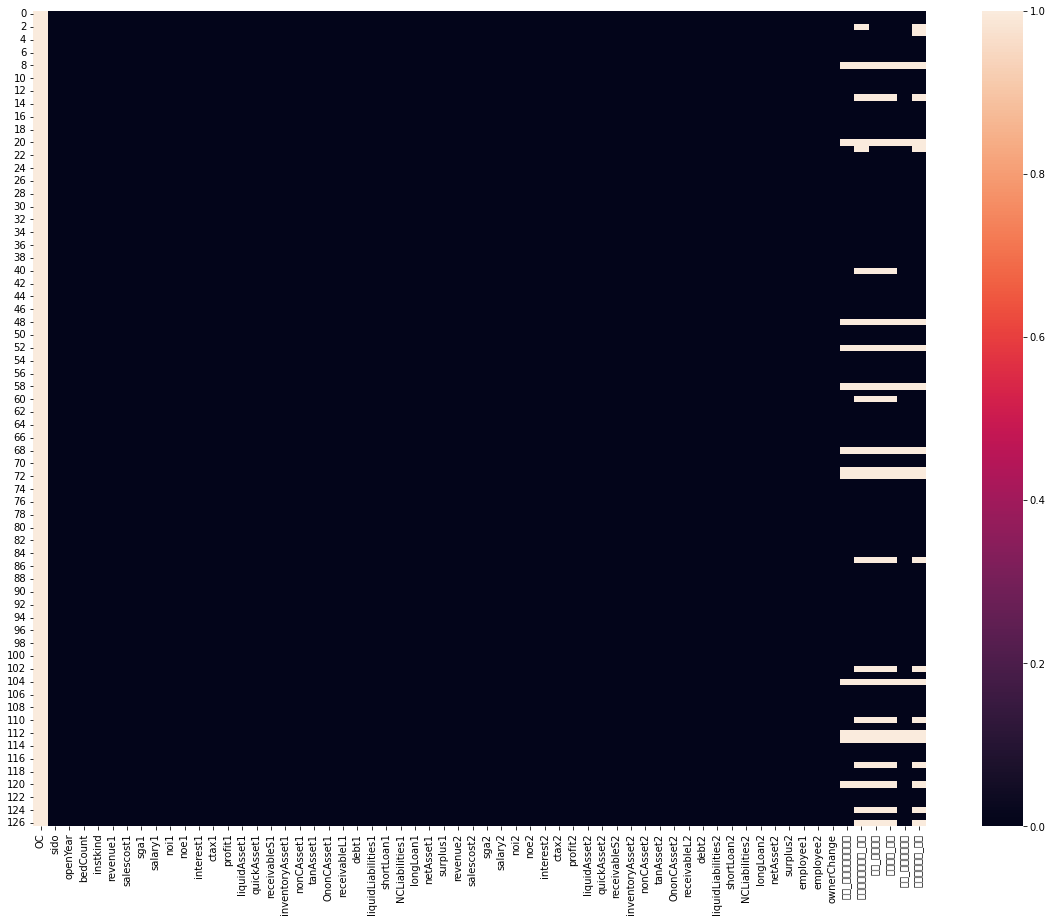

In [ ]:
%matplotlib inline
plt.figure(figsize = (20,15))
sns.heatmap(complete.isnull(), cbar=True)

In [ ]:
for i in ['평균_총자본경상이익율','총자본경상이익율_증감','평균_당좌비율','당좌비율_증감','평균_총자본회전율','총자본회전율_증감']:
    complete[i].fillna(-999,inplace=True)

In [ ]:
complete1 = complete.copy()

In [ ]:
complete1.loc[complete1['bedCount'] < 30, 'bedCount_sort'] = 'clinic'
complete1.loc[(complete1['bedCount'] >= 30) & (complete1['bedCount'] < 100), 'bedCount_sort'] = 'hospital'
complete1.loc[complete1['bedCount'] >= 100, 'bedCount_sort'] = 'general hospital'

In [ ]:
complete1

,OC,sido,openYear,bedCount,instkind,revenue1,salescost1,sga1,salary1,noi1,...,employee1,employee2,ownerChange,평균_총자본경상이익율,총자본경상이익율_증감,평균_당좌비율,당좌비율_증감,평균_총자본회전율,총자본회전율_증감,bedCount_sort
0,NaN,4,1998,300.000000,general_hospital,6.682486e+10,0.000000e+00,6.565709e+10,3.223695e+10,4.314093e+09,...,693.000000,693.000000,same,0.056108,1.483396,0.458319,-0.037978,7.284190,0.627470,general hospital
1,NaN,0,2016,44.000000,hospital,3.495758e+10,0.000000e+00,3.259270e+10,1.672254e+10,6.871024e+07,...,379.000000,371.000000,same,-0.597583,-1.025105,0.122501,0.086460,6.142643,-3.167651,hospital
2,NaN,2,1989,276.000000,general_hospital,2.326031e+10,2.542571e+09,2.308749e+10,1.168734e+10,1.601943e+09,...,97.822695,93.748201,same,-999.000000,-999.000000,0.427804,-0.119617,-999.000000,-999.000000,general hospital
3,NaN,4,2010,363.000000,general_hospital,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.850652e+09,...,760.000000,760.000000,same,0.066228,-0.188938,0.740908,-0.742936,0.000000,-999.000000,general hospital
4,NaN,2,2004,213.000000,general_hospital,5.037025e+10,0.000000e+00,4.855803e+10,2.296346e+10,1.534452e+09,...,437.000000,385.000000,same,0.163385,-0.176732,0.664685,-0.726925,1.954993,0.239316,general hospital
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122,NaN,2,2001,0.000000,others,2.233031e+10,8.484657e+08,1.849255e+10,1.232241e+10,4.236289e+08,...,560.000000,116.011905,same,0.121088,-0.183157,1.367599,0.070317,1.526907,-0.125440,clinic
123,NaN,6,2001,172.340278,others,1.833906e+10,0.000000e+00,1.760117e+10,6.824241e+09,3.145447e+07,...,132.000000,137.000000,same,0.042275,-0.922951,2.645394,-0.412695,2.074332,-0.161464,general hospital
124,NaN,6,2001,150.000000,hospital,1.424266e+10,1.726174e+09,1.148722e+10,6.279155e+09,2.723450e+07,...,97.822695,93.748201,same,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,general hospital
125,NaN,0,2001,172.340278,nursing_hospital,4.892710e+10,4.157148e+10,4.721485e+09,1.514547e+09,8.509815e+07,...,363.000000,343.000000,same,-2.317936,-1.201404,0.876984,0.219146,-95.845024,6.749559,general hospital


In [ ]:
complete1.drop(['bedCount'],axis=1,inplace=True)

### one-hot encoding

In [ ]:
data_complete1 = pd.get_dummies(complete1, columns = ['instkind','ownerChange','bedCount_sort'],drop_first=True)

In [ ]:
data_complete1.head()

,OC,sido,openYear,revenue1,salescost1,sga1,salary1,noi1,noe1,interest1,...,당좌비율_증감,평균_총자본회전율,총자본회전율_증감,instkind_general_hospital,instkind_hospital,instkind_nursing_hospital,instkind_others,ownerChange_same,bedCount_sort_general hospital,bedCount_sort_hospital
0,NaN,4,1998,6.682486e+10,0.000000e+00,6.565709e+10,3.223695e+10,4.314093e+09,4.901517e+09,1.775872e+09,...,-0.037978,7.284190,0.627470,1,0,0,0,1,1,0
1,NaN,0,2016,3.495758e+10,0.000000e+00,3.259270e+10,1.672254e+10,6.871024e+07,1.981033e+09,1.936455e+09,...,0.086460,6.142643,-3.167651,0,1,0,0,1,0,1
2,NaN,2,1989,2.326031e+10,2.542571e+09,2.308749e+10,1.168734e+10,1.601943e+09,1.380941e+09,8.101204e+08,...,-0.119617,-999.000000,-999.000000,1,0,0,0,1,1,0
3,NaN,4,2010,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.850652e+09,2.060989e+09,0.000000e+00,...,-0.742936,0.000000,-999.000000,1,0,0,0,1,1,0
4,NaN,2,2004,5.037025e+10,0.000000e+00,4.855803e+10,2.296346e+10,1.534452e+09,0.000000e+00,2.573804e+09,...,-0.726925,1.954993,0.239316,1,0,0,0,1,1,0


### target split

In [ ]:
X = data_complete1
data4_X = data4.drop(['OC'],axis=1)

### scaling

In [ ]:
#standard

In [ ]:
X_train_num = data4_X[[ 'openYear', 'revenue1', 'salescost1', 'sga1',
       'salary1', 'noi1', 'noe1', 'interest1', 'ctax1', 'profit1',
       'liquidAsset1', 'quickAsset1', 'receivableS1', 'inventoryAsset1',
       'nonCAsset1', 'tanAsset1', 'OnonCAsset1', 'receivableL1', 'debt1',
       'liquidLiabilities1', 'shortLoan1', 'NCLiabilities1', 'longLoan1',
       'netAsset1', 'surplus1', 'revenue2', 'salescost2', 'sga2', 'salary2',
       'noi2', 'noe2', 'interest2', 'ctax2', 'profit2', 'liquidAsset2',
       'quickAsset2', 'receivableS2', 'inventoryAsset2', 'nonCAsset2',
       'tanAsset2', 'OnonCAsset2', 'receivableL2', 'debt2',
       'liquidLiabilities2', 'shortLoan2', 'NCLiabilities2', 'longLoan2',
       'netAsset2', 'surplus2', 'employee1', 'employee2',
       '평균_총자본경상이익율', '총자본경상이익율_증감', '평균_당좌비율', '당좌비율_증감', '평균_총자본회전율',
       '총자본회전율_증감']]

X_num = X[[ 'openYear', 'revenue1', 'salescost1', 'sga1',
       'salary1', 'noi1', 'noe1', 'interest1', 'ctax1', 'profit1',
       'liquidAsset1', 'quickAsset1', 'receivableS1', 'inventoryAsset1',
       'nonCAsset1', 'tanAsset1', 'OnonCAsset1', 'receivableL1', 'debt1',
       'liquidLiabilities1', 'shortLoan1', 'NCLiabilities1', 'longLoan1',
       'netAsset1', 'surplus1', 'revenue2', 'salescost2', 'sga2', 'salary2',
       'noi2', 'noe2', 'interest2', 'ctax2', 'profit2', 'liquidAsset2',
       'quickAsset2', 'receivableS2', 'inventoryAsset2', 'nonCAsset2',
       'tanAsset2', 'OnonCAsset2', 'receivableL2', 'debt2',
       'liquidLiabilities2', 'shortLoan2', 'NCLiabilities2', 'longLoan2',
       'netAsset2', 'surplus2', 'employee1', 'employee2',
       '평균_총자본경상이익율', '총자본경상이익율_증감', '평균_당좌비율', '당좌비율_증감', '평균_총자본회전율',
       '총자본회전율_증감']]
X_cat = X[['sido','instkind_general_hospital', 'instkind_hospital','instkind_nursing_hospital', 'instkind_others', 'ownerChange_same','OC']]

from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(X_train_num)
X_stand = ss.transform(X_num)
X_stand = pd.DataFrame(data = X_stand, columns = X_num.columns)

data_complete2 = pd.concat([X_stand, X_cat],axis=1)

In [ ]:
data_complete2.to_csv('test_bedCount범주_standard.csv')

In [ ]:
data_complete2

,openYear,revenue1,salescost1,sga1,salary1,noi1,noe1,interest1,ctax1,profit1,...,당좌비율_증감,평균_총자본회전율,총자본회전율_증감,sido,instkind_general_hospital,instkind_hospital,instkind_nursing_hospital,instkind_others,ownerChange_same,OC
0,-0.726079,2.422635,-0.276402,3.447613,3.057431,4.594441,3.758111,5.393930,-0.023786,0.207897,...,-0.210372,-0.048298,0.252443,4,1,0,0,0,1,NaN
1,1.298761,0.963042,-0.276402,1.359442,1.246483,-0.268227,1.223775,5.941602,-0.332867,0.163014,...,-0.000072,-0.052162,-1.335616,0,0,1,0,0,1,NaN
2,-1.738499,0.427281,0.037002,0.759143,0.658739,1.487940,0.703028,2.100202,-0.332867,-2.121192,...,-0.348341,-3.454428,-418.039191,2,1,0,0,0,1,NaN
3,0.623815,-0.638093,-0.276402,-0.698939,-0.705488,5.209016,1.293159,-0.662740,-0.332867,2.215229,...,-1.401750,-0.072953,-418.039191,4,1,0,0,0,1,NaN
4,-0.051132,1.668977,-0.276402,2.367727,1.974966,1.410636,-0.495324,8.115302,-0.332867,2.704340,...,-1.374690,-0.066336,0.090021,2,1,0,0,0,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122,-0.388606,0.384685,-0.171818,0.468952,0.732869,0.138297,0.636969,0.762689,1.343518,1.251549,...,-0.027353,-0.067785,-0.062610,2,0,0,0,1,1,NaN
123,-0.388606,0.201877,-0.276402,0.412656,0.091085,-0.310900,-0.476904,-0.591269,2.449725,-0.183629,...,-0.843643,-0.065932,-0.077684,6,0,0,0,1,1,NaN
124,-0.388606,0.014253,-0.063629,0.026532,0.027459,-0.315734,0.251598,2.226555,-0.258164,-0.078741,...,-1688.454070,-3.454428,-418.039191,6,0,1,0,0,1,NaN
125,-0.388606,1.602877,4.847823,-0.400756,-0.528699,-0.249456,0.606826,2.195036,-0.204679,1.010194,...,0.224167,-0.397375,2.814216,0,0,0,1,0,1,NaN


# Modeling

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler,MinMaxScaler,MaxAbsScaler,RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, recall_score, precision_score, f1_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier ,AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn import tree
import xgboost as xgb
from xgboost import plot_importance,XGBClassifier

In [ ]:
data4 = pd.read_csv('/content/drive/MyDrive/병원개폐업_전처리_후4(bedcount범주형&파생변수o).csv',index_col=0)
data4 = pd.get_dummies(data4,drop_first=True)
data4.replace([np.inf, -np.inf], np.nan,inplace=True)
data4.dropna(axis=0,inplace=True)

In [ ]:
X = data4.drop(["OC"], axis = 1)
y = data4[["OC"]]

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, y,
                                                   test_size = 0.2, random_state = 42,
                                                   stratify = data4['OC'])

In [ ]:
X_train.reset_index(drop = True, inplace = True)
X_val.reset_index(drop = True, inplace = True)
y_train.reset_index(drop = True, inplace = True)
y_val.reset_index(drop = True, inplace = True)

In [ ]:
X_train_cat = X_train[['sido','bedCount_sort_general hospital',	'bedCount_sort_hospital',	'ownerChange_same']]
X_val_cat = X_val[['sido','bedCount_sort_general hospital',	'bedCount_sort_hospital',	'ownerChange_same']]
X_train_num = X_train.drop(['sido','bedCount_sort_general hospital',	'bedCount_sort_hospital',	'ownerChange_same','instkind_general_hospital',	'instkind_hospital',	'instkind_nursing_hospital',	'instkind_others'], axis=1)
X_val_num = X_val.drop(['sido','bedCount_sort_general hospital',	'bedCount_sort_hospital',	'ownerChange_same','instkind_general_hospital',	'instkind_hospital',	'instkind_nursing_hospital',	'instkind_others'], axis=1)

#### train set scaling

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train_num)

X_train_stand = scaler.transform(X_train_num)
X_val_stand = scaler.transform(X_val_num)

In [ ]:
X_train_stand = pd.DataFrame(data = X_train_stand, columns = X_train_num.columns)
X_val_stand = pd.DataFrame(data = X_val_stand, columns = X_val_num.columns)
X_train_stand

,openYear,revenue1,salescost1,sga1,salary1,noi1,noe1,interest1,ctax1,profit1,liquidAsset1,quickAsset1,receivableS1,inventoryAsset1,nonCAsset1,tanAsset1,OnonCAsset1,receivableL1,debt1,liquidLiabilities1,shortLoan1,NCLiabilities1,longLoan1,netAsset1,surplus1,revenue2,salescost2,sga2,salary2,noi2,noe2,interest2,ctax2,profit2,liquidAsset2,quickAsset2,receivableS2,inventoryAsset2,nonCAsset2,tanAsset2,OnonCAsset2,receivableL2,debt2,liquidLiabilities2,shortLoan2,NCLiabilities2,longLoan2,netAsset2,surplus2,employee1,employee2,평균_총자본경상이익율,총자본경상이익율_증감,평균_당좌비율,당좌비율_증감,평균_총자본회전율,총자본회전율_증감
0,-0.675594,-0.461025,-0.272222,-0.535046,-0.550807,-0.369162,-0.477837,-0.517173,0.243690,0.365205,-0.252671,-0.241505,-0.567606,-0.438611,-0.510866,-0.517569,-0.339978,0.0,-0.567790,-0.718035,-0.619724,-0.326478,-0.114915,-0.196733,-0.042360,-0.491391,-0.283392,-0.565804,-0.591588,-0.436937,-0.434797,-0.466237,-0.246469,0.212331,-0.390167,-0.382741,-0.658541,-0.426843,-0.518193,-0.528829,-0.359642,0.0,-0.587685,-0.699262,-0.584649,-0.386032,-0.233322,-0.288237,-0.134916,-0.572077,-0.589480,0.291220,0.095325,8.305396,3.046400,-0.077023,-0.017182
1,0.417362,-0.515649,-0.244149,-0.572385,-0.530242,-0.319967,-0.478526,-0.549155,-0.303097,-0.227272,-0.467394,-0.462017,-0.567606,-0.454733,-0.521669,-0.531682,-0.274250,0.0,-0.518285,-0.339582,-0.083702,-0.595498,-0.557184,-0.373666,-0.150063,-0.521145,-0.249380,-0.585350,-0.533277,-0.407628,-0.435194,-0.524970,-0.266020,-0.252824,-0.478062,-0.472889,-0.095468,-0.439729,-0.564778,-0.584009,-0.293855,0.0,-0.561640,-0.290476,-0.020029,-0.672466,-0.695803,-0.461867,-0.207046,-0.632721,-0.546854,-0.049278,0.076798,-0.467525,0.443088,-0.075197,-0.007968
2,-2.315030,1.181172,0.511588,1.613478,2.163942,3.810013,1.631550,-0.784190,-0.303604,-1.371527,1.649463,1.687248,-0.295004,0.326670,0.173984,0.176543,0.870613,0.0,1.305732,-0.211038,-0.619724,2.504943,-0.689418,-0.210355,-0.150063,1.464819,0.643966,2.000756,2.565267,4.913737,2.609063,-0.765415,-0.267796,-2.215381,1.913675,1.957401,-0.596655,0.473188,0.283844,0.296238,0.909340,0.0,1.417113,-0.044570,-0.584649,2.321325,-0.695803,-0.109385,-0.207046,2.050763,2.368766,-0.863265,0.090404,0.549641,0.048485,-0.051358,0.062139
3,0.417362,-0.403652,-0.240068,-0.421568,-0.388957,-0.330921,-0.364874,-0.141789,-0.305899,-0.172448,-0.408555,-0.404513,-0.567606,-0.376578,-0.306089,-0.280260,-0.355935,0.0,-0.333347,-0.418326,-0.163937,-0.194701,0.101727,-0.261569,-0.150063,-0.429486,-0.255214,-0.407212,-0.395312,-0.414163,-0.331255,-0.076458,-0.267796,-0.710510,-0.422132,-0.418531,-0.658541,-0.357240,-0.289145,-0.263449,-0.376368,0.0,-0.328540,-0.382325,-0.097725,-0.222723,0.030362,-0.309949,-0.207046,-0.435629,-0.427501,-0.204915,0.076843,-0.401703,0.252081,-0.075330,0.032515
4,-0.019820,-0.196775,-0.272222,-0.108197,-0.178197,-0.314950,-0.227278,0.296607,-0.233074,-0.146131,-0.396687,-0.403641,-0.567606,-0.145793,-0.135551,-0.094777,-0.323701,0.0,0.103910,0.511900,1.550290,-0.298584,-0.218838,-0.481521,-0.225977,-0.193618,-0.283392,-0.092221,-0.180089,-0.293067,-0.220764,0.370079,-0.188756,-0.149467,-0.401317,-0.395826,-0.658541,-0.455410,-0.025712,0.017894,-0.342580,0.0,0.103918,-0.433914,-0.258533,0.516201,1.223443,-0.478445,-0.123131,0.201130,0.263040,0.375988,0.154133,-0.435302,-1.454933,-0.017093,0.305227
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,0.198771,-0.396880,-0.227681,-0.427636,-0.418464,-0.282668,-0.284126,-0.383941,-0.215328,-0.123284,-0.417591,-0.410991,-0.567606,-0.447967,-0.468958,-0.477307,-0.354752,0.0,-0.489182,-0.575817,-0.413574,-0.321594,-0.271943,-0.311338,-0.024835,-0.392861,-0.235936,-0.431162,-0.414471,-0.370841,-0.242335,-0.446731,-0.227227,-0.088646,-0.405101,-0.398034,-0.658541,-0.429651,-0.493538,-0.503627,-0.375129,0.0,-0.496084,-0.611971,-0.508827,-0.3084

In [ ]:
X_train_stand1 = pd.concat([X_train_stand, X_train_cat],axis=1)
X_val_stand1 = pd.concat([X_val_stand, X_val_cat],axis=1)

#### Smote

In [ ]:
from imblearn.over_sampling import SMOTE
from collections import Counter

In [ ]:
# standard
smote = SMOTE(random_state = 42)
X_train_over_stand, y_train_over_stand = smote.fit_resample(X_train_stand1, y_train)

print('After OverSampling, shape of X_train: {}'.format(X_train_over_stand.shape))
print('After OverSampling, shape of y_train: {} \n'.format(y_train_over_stand.shape))
print('')
print("After OverSampling, '1': {}".format(sum(y_train_over_stand["OC"]==1)))
print("After OverSampling, '0': {}".format(sum(y_train_over_stand["OC"]==0)))

After OverSampling, shape of X_train: (374, 61)
After OverSampling, shape of y_train: (374, 1) 


After OverSampling, '1': 187
After OverSampling, '0': 187


In [ ]:
from sklearn.feature_selection import RFECV
from sklearn.model_selection import RepeatedStratifiedKFold

model = RandomForestClassifier(n_estimators=10,random_state=42)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3,random_state=1)
rfe = RFECV(model,cv=cv)
rfe = rfe.fit(X_train_over_stand, y_train_over_stand['OC'])

print('Selected features; %s' % list(X_train_over_stand.columns[rfe.support_]))

Selected features; ['openYear', 'revenue1', 'salescost1', 'sga1', 'salary1', 'noi1', 'noe1', 'interest1', 'ctax1', 'profit1', 'liquidAsset1', 'quickAsset1', 'inventoryAsset1', 'liquidLiabilities1', 'shortLoan1', 'netAsset1', 'surplus1', 'ctax2', 'profit2', 'liquidAsset2', 'receivableS2', 'inventoryAsset2', 'tanAsset2', 'NCLiabilities2', 'longLoan2', 'netAsset2', 'surplus2', 'employee1', 'employee2', '평균_총자본경상이익율', '총자본경상이익율_증감', '평균_당좌비율', '당좌비율_증감', '평균_총자본회전율', 'sido']


In [ ]:
X_transformed = rfe.transform(X_train_over_stand)
X_transformed.shape

(374, 35)

#### Pycaret

In [ ]:
# pycaret에 없는 모델 설치
!pip install xgboost
!pip install --upgrade xgboost
!pip install catboost

In [ ]:
# pycaret 설치
!pip install pycaret 
#!pip install category_encoders
# !pip install --upgrade pycaret

In [ ]:
# import pycaret
from pycaret.classification import *

In [ ]:
X_transformed = pd.DataFrame(X_transformed,columns=['openYear', 'revenue1', 'salescost1', 'sga1', 'salary1', 'noi1', 'noe1', 'interest1', 'ctax1', 'profit1', 'liquidAsset1', 'quickAsset1', 'inventoryAsset1', 'liquidLiabilities1', 'shortLoan1', 'netAsset1', 'surplus1', 'ctax2', 'profit2', 'liquidAsset2', 'receivableS2', 'inventoryAsset2', 'tanAsset2', 'NCLiabilities2', 'longLoan2', 'netAsset2', 'surplus2', 'employee1', 'employee2', '평균_총자본경상이익율', '총자본경상이익율_증감', '평균_당좌비율', '당좌비율_증감', '평균_총자본회전율', 'sido'])

In [ ]:
X_val_stand1 = X_val_stand1[['openYear', 'revenue1', 'salescost1', 'sga1', 'salary1', 'noi1', 'noe1', 'interest1', 'ctax1', 'profit1', 'liquidAsset1', 'quickAsset1', 'inventoryAsset1', 'liquidLiabilities1', 'shortLoan1', 'netAsset1', 'surplus1', 'ctax2', 'profit2', 'liquidAsset2', 'receivableS2', 'inventoryAsset2', 'tanAsset2', 'NCLiabilities2', 'longLoan2', 'netAsset2', 'surplus2', 'employee1', 'employee2', '평균_총자본경상이익율', '총자본경상이익율_증감', '평균_당좌비율', '당좌비율_증감', '평균_총자본회전율', 'sido']]

In [ ]:
train = pd.concat([X_transformed,y_train_over_stand.reset_index(drop=True)],axis=1)

In [ ]:
train_oversampling = train[train['OC']==0]

In [ ]:
train = pd.concat([train,train_oversampling],axis=0)

#### 전체 다합쳐서 시도

In [ ]:
X_over.reset_index(drop = True, inplace = True)
y_over.reset_index(drop = True, inplace = True)

In [ ]:
train = pd.concat([X_over, y_over],axis=1)

In [ ]:
train

,openYear,salescost1,interest1,ctax1,profit1,quickAsset1,inventoryAsset1,OnonCAsset1,liquidLiabilities1,NCLiabilities1,netAsset1,surplus1,inventoryAsset2,nonCAsset2,tanAsset2,OnonCAsset2,surplus2,employee1,평균_당좌비율,당좌비율_증감,평균_총자본회전율,총자본회전율_증감,sido,ownerChange_same,OC
0,0.286341,-0.276402,-0.617597,-0.205325,-0.036654,-0.445741,-0.432738,-0.253380,-0.671966,-0.583419,-0.290859,0.005048,-0.423697,-0.559528,-0.558825,-0.256366,0.022217,-0.490424,0.632457,0.449676,-0.067667,-0.054746,3,1,1
1,-0.501097,-0.276402,3.419262,0.367563,0.558400,1.167249,4.976478,3.487949,3.452640,1.075875,0.514328,0.797258,4.124054,1.563348,1.459804,3.705636,1.286116,3.432879,-0.432617,-0.637886,-0.055363,-0.004410,4,1,1
2,0.061359,-0.276402,3.795674,-0.332867,-0.163469,0.300603,1.122079,-0.175744,3.588785,1.866315,-0.492521,0.839587,1.173996,1.961598,2.129604,0.419844,1.537099,0.449602,-0.522229,0.476809,15.519711,-5.958044,4,1,1
3,-2.525937,0.272113,2.546376,-0.332867,0.524769,1.121564,0.133545,0.067749,2.318304,-0.190194,0.555297,0.854295,-0.198369,0.869795,0.970115,0.105405,1.566155,0.547521,-0.378928,-0.705713,-0.068386,0.104751,6,1,1
4,-1.963482,2.282292,0.926513,1.781553,0.163683,1.219979,2.693899,-0.358995,3.092185,1.906199,-0.172511,-0.160814,2.738065,1.674385,1.820745,-0.396213,1.566741,2.297014,-0.409102,-0.709298,-0.041466,0.286898,4,1,1
5,-0.501097,0.540174,0.867023,-0.116245,-0.835136,0.002257,1.745185,-0.394550,1.769989,1.017079,0.943427,0.844547,1.612173,2.223990,2.298452,-0.409695,1.640450,1.520187,-0.513712,0.414152,-0.065557,-0.044455,5,1,1
6,0.398832,0.813740,4.325947,-0.285140,0.079059,1.111742,0.465331,0.041722,2.923905,2.760236,0.906190,-0.160814,0.793332,2.247521,2.373852,-0.125335,-0.226129,-0.549176,-0.454163,0.188948,-0.062550,-0.168377,6,1,1
7,0.398832,-0.259322,0.571773,-0.332867,-0.232834,-0.413541,-0.269543,-0.182693,1.133007,-0.299875,0.082828,-0.160814,-0.436053,0.585193,0.662358,-0.147083,-0.226129,-0.542648,-0.511707,-1.334592,-0.071850,0.103104,2,0,1
8,0.398832,-0.276402,3.856058,-0.332867,-0.955170,0.898376,4.904688,1.541228,4.486770,2.105641,0.048221,-0.160814,4.880046,2.639711,2.430828,4.869975,-0.226129,0.469185,-0.494970,-0.066297,-0.046784,0.103987,4,1,1
9,-2.638429,4.129403,2.396504,0.222862,-3.530603,2.290492,0.028943,9.530314,5.141929,3.579425,-0.435326,-0.160814,-0.249824,2.561691,2.258991,8.804797,-0.226129,5.312931,-0.431466,-0.284875,0.207476,0.341113,1,1,1


In [ ]:
model = setup(
    data = train,
    target = "OC",
    fold = 15
)

In [ ]:
top5 = compare_models(sort='F1', n_select=5)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.9899,0.9984,0.9833,0.9879,0.9844,0.9770,0.9782,0.5367
et,Extra Trees Classifier,0.9899,1.0000,0.9833,0.9879,0.9844,0.9770,0.9782,0.4727
catboost,CatBoost Classifier,0.9899,0.9959,0.9833,0.9879,0.9844,0.9770,0.9782,11.1687
xgboost,Extreme Gradient Boosting,0.9874,0.9949,0.9750,0.9879,0.9800,0.9708,0.9723,2.9960
gbc,Gradient Boosting Classifier,0.9848,0.9941,0.9667,0.9879,0.9756,0.9645,0.9663,0.2727
ada,Ada Boost Classifier,0.9848,0.9984,0.9667,0.9879,0.9749,0.9641,0.9664,0.1327
lightgbm,Light Gradient Boosting Machine,0.9848,0.9981,0.9667,0.9879,0.9749,0.9641,0.9664,0.1253
dt,Decision Tree Classifier,0.9798,0.9718,0.9509,0.9867,0.9666,0.9521,0.9541,0.0167
svm,SVM - Linear Kernel,0.9719,0.0000,0.9167,0.9933,0.9487,0.9299,0.9352,0.0133
lr,Logistic Regression,0.9540,0.9750,0.8519,1.0000,0.9157,0.8850,0.8937,0.2033


In [ ]:
model_rf = create_model('rf', fold = 5)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9747,1.0000,1.0000,0.9259,0.9615,0.9427,0.9443
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,0.9872,1.0000,0.9583,1.0000,0.9787,0.9696,0.9700
4,0.9872,0.9730,0.9583,1.0000,0.9787,0.9696,0.9700
Mean,0.9898,0.9946,0.9833,0.9852,0.9838,0.9764,0.9769
SD,0.0095,0.0108,0.0204,0.0296,0.0146,0.0216,0.0211


In [ ]:
final_model = finalize_model(model_rf)

In [ ]:
prediction = predict_model(final_model, data = submission) 
prediction

,openYear,revenue1,salescost1,sga1,salary1,noi1,noe1,interest1,ctax1,profit1,liquidAsset1,quickAsset1,inventoryAsset1,liquidLiabilities1,shortLoan1,netAsset1,surplus1,ctax2,profit2,liquidAsset2,receivableS2,inventoryAsset2,tanAsset2,NCLiabilities2,longLoan2,netAsset2,surplus2,employee1,employee2,평균_총자본경상이익율,총자본경상이익율_증감,평균_당좌비율,당좌비율_증감,평균_총자본회전율,sido,Label,Score
0,-0.726079,2.422635,-0.276402,3.447613,3.057431,4.594441,3.758111,5.393930,-0.023786,0.207897,3.244247,3.134705,5.047697,7.351420,11.683434,-0.038517,0.830613,0.563204,0.189515,3.294154,0.323490,4.404966,2.001131,-0.082846,0.294008,0.841496,1.521282,3.628717,3.905871,0.068107,0.122859,-0.443315,-0.210372,-0.048298,4,1,0.99
1,1.298761,0.963042,-0.276402,1.359442,1.246483,-0.268227,1.223775,5.941602,-0.332867,0.163014,0.268622,0.223901,1.287827,5.547936,6.924538,0.576283,0.998891,-0.299407,-4.304481,0.262281,-0.366264,1.611775,3.362036,2.442302,3.113450,-0.219084,-0.226129,1.578938,1.668051,-1.304361,0.077525,-0.537117,-0.000072,-0.052162,0,1,0.95
2,-1.738499,0.427281,0.037002,0.759143,0.658739,1.487940,0.703028,2.100202,-0.332867,-2.121192,1.276429,1.137318,4.277088,3.499308,6.448233,-0.498831,1.655361,-0.239331,-1.712526,1.512966,3.994684,2.889273,1.019648,-0.664527,-0.677570,-0.545905,2.974916,-0.256575,-0.258779,-2097.515887,-17.958029,-0.451839,-0.348341,-3.454428,2,1,0.96
3,0.623815,-0.638093,-0.276402,-0.698939,-0.705488,5.209016,1.293159,-0.662740,-0.332867,2.215229,0.681575,0.609525,2.243891,3.163233,5.458064,2.939640,-0.160814,-0.299407,2.230144,1.280661,-0.464590,2.444958,1.532146,-0.349171,-0.677570,2.830250,-0.226129,4.066091,4.371504,0.089354,0.092636,-0.364381,-1.401750,-0.072953,4,1,0.92
4,-0.051132,1.668977,-0.276402,2.367727,1.974966,1.410636,-0.495324,8.115302,-0.332867,2.704340,0.563637,0.494255,2.092506,3.013570,4.958393,1.159555,1.493700,-0.299407,3.754351,0.782577,-0.352276,3.170114,3.031794,3.824296,3.744690,1.674647,2.718465,1.957560,1.765348,0.293342,0.092857,-0.385672,-1.374690,-0.066336,2,1,0.92
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122,-0.388606,0.384685,-0.171818,0.468952,0.732869,0.138297,0.636969,0.762689,1.343518,1.251549,2.113343,2.185145,-0.093313,1.206764,-0.588183,0.637504,-0.160814,1.887742,1.345246,2.064718,1.499445,-0.215969,0.022079,-0.325579,-0.677570,0.648652,-0.226129,2.760499,-0.104052,0.204536,0.092740,-0.189332,-0.027353,-0.067785,2,0,0.89
123,-0.388606,0.201877,-0.276402,0.412656,0.091085,-0.310900,-0.476904,-0.591269,2.449725,-0.183629,-0.051238,-0.031118,-0.487229,-0.420852,-0.588183,0.199759,0.738868,0.339050,0.324360,0.119950,0.292196,-0.474324,-0.283154,-0.442714,-0.317113,0.193665,1.168090,-0.033467,0.041810,0.039064,0.079371,0.167586,-0.843643,-0.065932,6,1,0.96
124,-0.388606,0.014253,-0.063629,0.026532,0.027459,-0.315734,0.251598,2.226555,-0.258164,-0.078741,-0.601226,-0.598463,-0.487229,-0.701846,-0.588183,-0.498831,-0.160814,-0.228253,-0.143877,-0.594047,-0.464590,-0.474324,-0.707179,-0.664527,-0.677570,-0.545905,-0.226129,-0.256575,-0.258779,-2097.515887,-17.958029,-279.615417,-1688.454070,-3.454428,6,1,0.93
125,-0.388606,1.602877,4.847823,-0.400756,-0.528699,-0.249456,0.606826,2.195036,-0.204679,1.010194,0.924695,0.779639,4.154964,0.684792,-0.588183,-0.410196,-0.160814,-0.299407,0.774575,0.627066,-0.454677,3.773922,-0.217963,2.874614,4.632178,-0.563592,-0.226129,1.474491,1.473458,-4.916354,0.074339,-0.326372,0.224167,-0.397375,0,1,0.90


In [ ]:
model_et = create_model('et', fold = 5)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9747,0.9985,1.0000,0.9259,0.9615,0.9427,0.9443
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,0.9872,1.0000,0.9583,1.0000,0.9787,0.9696,0.9700
4,0.9872,0.9958,0.9583,1.0000,0.9787,0.9696,0.9700
Mean,0.9898,0.9989,0.9833,0.9852,0.9838,0.9764,0.9769
SD,0.0095,0.0017,0.0204,0.0296,0.0146,0.0216,0.0211


In [ ]:
tuned_et = tune_model(model_et, optimize = 'F1', n_iter = 10, choose_better = True)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9630,1.0000,0.8889,1.0,0.9412,0.9143,0.9177
1,1.0000,1.0000,1.0000,1.0,1.0000,1.0000,1.0000
2,1.0000,1.0000,1.0000,1.0,1.0000,1.0000,1.0000
3,1.0000,1.0000,1.0000,1.0,1.0000,1.0000,1.0000
4,1.0000,1.0000,1.0000,1.0,1.0000,1.0000,1.0000
5,1.0000,1.0000,1.0000,1.0,1.0000,1.0000,1.0000
6,1.0000,1.0000,1.0000,1.0,1.0000,1.0000,1.0000
7,1.0000,1.0000,1.0000,1.0,1.0000,1.0000,1.0000
8,1.0000,1.0000,1.0000,1.0,1.0000,1.0000,1.0000
9,1.0000,1.0000,1.0000,1.0,1.0000,1.0000,1.0000


In [ ]:
final_model = finalize_model(tuned_et)

In [ ]:
prediction = predict_model(final_model, data = submission) 
prediction[prediction['Label']==0]

,openYear,revenue1,salescost1,sga1,salary1,noi1,noe1,interest1,ctax1,profit1,liquidAsset1,quickAsset1,inventoryAsset1,liquidLiabilities1,shortLoan1,netAsset1,surplus1,ctax2,profit2,liquidAsset2,receivableS2,inventoryAsset2,tanAsset2,NCLiabilities2,longLoan2,netAsset2,surplus2,employee1,employee2,평균_총자본경상이익율,총자본경상이익율_증감,평균_당좌비율,당좌비율_증감,평균_총자본회전율,sido,Label,Score
40,0.398832,-0.425230,-0.247701,-0.443565,-0.403335,-0.332352,-0.207866,-0.283931,-0.199832,-0.217328,-0.387344,-0.388323,-0.238702,-0.251419,0.120992,-0.430533,-0.160814,-0.299407,0.049041,-0.594047,-0.464590,-0.474324,-0.707179,-0.664527,-0.677570,-0.545905,-0.226129,-0.333753,-0.243130,-2097.515887,-17.958029,-279.615417,-1688.454070,-3.454428,2,0,0.6568
48,0.736306,-0.026281,-0.276402,0.362045,0.231367,0.189178,1.787854,2.262586,0.188468,-5.269798,-0.436714,-0.436203,-0.310887,-0.178199,-0.068857,-0.403334,-0.160814,-0.299407,-0.261484,-0.594047,-0.464590,-0.474324,-0.707179,-0.664527,-0.677570,-0.545905,-0.226129,1.063230,1.174619,-2097.515887,-17.958029,-279.615417,-1688.454070,-3.454428,3,0,0.5381
60,1.186270,-0.355442,-0.276402,-0.337916,-0.268290,-0.265663,-0.227760,0.195350,-0.265659,-0.058279,-0.409348,-0.419201,-0.044940,-0.427123,-0.315132,-0.185584,-0.160814,-0.299407,-0.016837,-0.594047,-0.464590,-0.474324,-0.707179,-0.664527,-0.677570,-0.545905,-0.226129,-0.046523,-0.041587,-2097.515887,-17.958029,-279.615417,-1688.454070,-3.454428,3,0,0.6518
62,0.623815,-0.387723,-0.232192,-0.386241,-0.336253,-0.307873,-0.363561,-0.148480,-0.312219,-0.204980,-0.293576,-0.283810,-0.423099,-0.557538,-0.364133,-0.156504,-0.160814,-0.280518,-0.231403,-0.315243,0.420935,-0.415915,-0.235762,-0.107699,0.258446,-0.144955,-0.226129,-0.098747,-0.097185,-0.034385,0.095358,0.730232,-1.340343,-0.069014,2,0,0.6808
122,-0.388606,0.384685,-0.171818,0.468952,0.732869,0.138297,0.636969,0.762689,1.343518,1.251549,2.113343,2.185145,-0.093313,1.206764,-0.588183,0.637504,-0.160814,1.887742,1.345246,2.064718,1.499445,-0.215969,0.022079,-0.325579,-0.677570,0.648652,-0.226129,2.760499,-0.104052,0.204536,0.092740,-0.189332,-0.027353,-0.067785,2,0,0.9401


In [ ]:
model_cat = create_model('catboost', fold = 5)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9747,0.9970,1.0000,0.9259,0.9615,0.9427,0.9443
1,0.9873,1.0000,0.9600,1.0000,0.9796,0.9704,0.9708
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,0.9872,1.0000,0.9583,1.0000,0.9787,0.9696,0.9700
4,0.9872,0.9823,0.9583,1.0000,0.9787,0.9696,0.9700
Mean,0.9873,0.9959,0.9753,0.9852,0.9797,0.9704,0.9710
SD,0.0080,0.0069,0.0201,0.0296,0.0122,0.0181,0.0177


In [ ]:
tuned_cat = tune_model(model_cat, optimize = 'F1', n_iter = 10, choose_better = True)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,0.9259,1.0000,1.0000,0.8182,0.9000,0.8421,0.8528
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
9,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


In [ ]:
final_model = finalize_model(tuned_cat)

In [ ]:
prediction = predict_model(final_model, data = submission) 
prediction[prediction['Label']==0]

,openYear,revenue1,salescost1,sga1,salary1,noi1,noe1,interest1,ctax1,profit1,liquidAsset1,quickAsset1,inventoryAsset1,liquidLiabilities1,shortLoan1,netAsset1,surplus1,ctax2,profit2,liquidAsset2,receivableS2,inventoryAsset2,tanAsset2,NCLiabilities2,longLoan2,netAsset2,surplus2,employee1,employee2,평균_총자본경상이익율,총자본경상이익율_증감,평균_당좌비율,당좌비율_증감,평균_총자본회전율,sido,Label,Score
36,0.736306,-0.217055,-0.276402,-0.158617,-0.131943,-0.276812,-0.099442,0.811327,-0.331399,-0.022218,-0.419081,-0.416838,-0.338740,0.132575,0.193053,0.012209,0.318108,-0.229866,-0.075417,-0.510676,-0.464590,-0.420621,0.030850,0.292867,0.890358,-0.336559,-0.226129,0.110148,-0.340426,0.079058,0.085071,-0.517232,0.186346,-0.066654,1,0,0.6900
60,1.186270,-0.355442,-0.276402,-0.337916,-0.268290,-0.265663,-0.227760,0.195350,-0.265659,-0.058279,-0.409348,-0.419201,-0.044940,-0.427123,-0.315132,-0.185584,-0.160814,-0.299407,-0.016837,-0.594047,-0.464590,-0.474324,-0.707179,-0.664527,-0.677570,-0.545905,-0.226129,-0.046523,-0.041587,-2097.515887,-17.958029,-279.615417,-1688.454070,-3.454428,3,0,0.8816
105,0.961288,-0.004090,-0.276402,-0.003480,0.087246,-0.207069,0.972569,0.020162,0.792581,0.627505,-0.101191,-0.089229,-0.331309,-0.115520,-0.588183,-0.238389,-0.160814,0.458366,0.340676,-0.227937,0.598449,-0.313057,0.177437,0.532876,0.858008,-0.323325,-0.226129,0.345154,0.410147,0.521021,0.096552,-0.380483,0.877343,-0.057747,3,0,0.8768
122,-0.388606,0.384685,-0.171818,0.468952,0.732869,0.138297,0.636969,0.762689,1.343518,1.251549,2.113343,2.185145,-0.093313,1.206764,-0.588183,0.637504,-0.160814,1.887742,1.345246,2.064718,1.499445,-0.215969,0.022079,-0.325579,-0.677570,0.648652,-0.226129,2.760499,-0.104052,0.204536,0.092740,-0.189332,-0.027353,-0.067785,2,0,0.9989


### optuna 

In [ ]:
!pip install optuna

     |████████████████████████████████| 308 kB 14.8 MB/s 
     |████████████████████████████████| 210 kB 57.4 MB/s 
     |████████████████████████████████| 81 kB 9.8 MB/s 
     |████████████████████████████████| 75 kB 4.8 MB/s 
     |████████████████████████████████| 113 kB 57.1 MB/s 
     |████████████████████████████████| 49 kB 5.4 MB/s 
     |████████████████████████████████| 150 kB 62.9 MB/s 
  Created wheel for pyperclip: filename=pyperclip-1.8.2-py3-none-any.whl size=11137 sha256=e3219b4998cbc371cf572b81bb8c535f730dcf268ce40542f6e946c92c04bf11
  Stored in directory: /root/.cache/pip/wheels/9f/18/84/8f69f8b08169c7bae2dde6bd7daf0c19fca8c8e500ee620a28
Successfully built pyperclip


In [ ]:
import optuna
from optuna import Trial, visualization
from optuna.samplers import TPESampler
import warnings
warnings.filterwarnings('ignore')

ModuleNotFoundError: ignored

In [ ]:
X = data4.drop(["OC"], axis = 1)
y = data4[["OC"]]

In [ ]:
X.isnull().sum()

sido                              0
openYear                          0
revenue1                          0
salescost1                        0
sga1                              0
                                 ..
당좌비율_증감                           0
평균_총자본회전율                         0
총자본회전율_증감                         0
bedCount_sort_general hospital    0
bedCount_sort_hospital            0
Length: 65, dtype: int64

In [ ]:
X_cat = X[['sido','bedCount_sort_general hospital',	'bedCount_sort_hospital',	'ownerChange_same']]
X_num = X.drop(['sido','bedCount_sort_general hospital',	'bedCount_sort_hospital',	'ownerChange_same','instkind_general_hospital',	'instkind_hospital',	'instkind_nursing_hospital',	'instkind_others'], axis=1)

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_num)

X_stand = scaler.transform(X_num)

In [ ]:
#X_stand.reset_index(drop = True, inplace = True)
X_cat.reset_index(drop = True, inplace = True)

In [ ]:
X_stand = pd.DataFrame(data = X_stand, columns = X_num.columns)
X_stand1 = pd.concat([X_stand, X_cat],axis=1)

In [ ]:
X_stand1

,openYear,revenue1,salescost1,sga1,salary1,noi1,noe1,interest1,ctax1,profit1,liquidAsset1,quickAsset1,receivableS1,inventoryAsset1,nonCAsset1,tanAsset1,OnonCAsset1,receivableL1,debt1,liquidLiabilities1,shortLoan1,NCLiabilities1,longLoan1,netAsset1,surplus1,revenue2,salescost2,sga2,salary2,noi2,noe2,interest2,ctax2,profit2,liquidAsset2,quickAsset2,receivableS2,inventoryAsset2,nonCAsset2,tanAsset2,OnonCAsset2,receivableL2,debt2,liquidLiabilities2,shortLoan2,NCLiabilities2,longLoan2,netAsset2,surplus2,employee1,employee2,평균_총자본경상이익율,총자본경상이익율_증감,평균_당좌비율,당좌비율_증감,평균_총자본회전율,총자본회전율_증감,sido,bedCount_sort_general hospital,bedCount_sort_hospital,ownerChange_same
0,0.286341,-0.444920,-0.276402,-0.448775,-0.468084,-0.329000,-0.482102,-0.617597,-0.205325,-0.036654,-0.450947,-0.445741,-0.202794,-0.432738,-0.568254,-0.567295,-0.253380,0.0,-0.692452,-0.671966,-0.588183,-0.583419,-0.544036,-0.290859,0.005048,-0.433691,-0.284501,-0.429894,-0.448467,-0.420704,-0.492888,-0.603845,-0.225121,-0.080600,-0.464881,-0.459875,-0.131148,-0.423697,-0.559528,-0.558825,-0.256366,0.0,-0.684708,-0.588184,-0.572006,-0.598458,-0.596778,-0.319985,0.022217,-0.490424,-0.465522,0.116702,0.096008,0.632457,0.449676,-0.067667,-0.054746,3,1,0,1
1,-0.501097,2.682905,-0.276402,3.764669,3.004798,0.232901,0.597703,3.419262,0.367563,0.558400,1.334067,1.167249,-0.503919,4.976478,1.664306,1.580197,3.487949,0.0,2.374171,3.452640,5.823489,1.075875,0.831505,0.514328,0.797258,2.673216,-0.284501,3.827541,3.084495,0.402715,0.615016,3.823953,0.565147,0.468205,1.137013,0.998356,-0.464590,4.124054,1.563348,1.459804,3.705636,0.0,2.117699,1.773377,2.630713,1.890977,2.450539,0.571429,1.286116,3.432879,3.697378,0.086642,0.096172,-0.432617,-0.637886,-0.055363,-0.004410,4,1,0,1
2,0.061359,1.608211,-0.276402,2.310763,2.149743,-0.218240,0.736132,3.795674,-0.332867,-0.163469,0.336194,0.300603,2.122170,1.122079,1.691097,1.877916,-0.175744,0.0,2.928498,3.588785,5.193187,1.866315,2.076491,-0.492521,0.839587,1.740777,-0.284501,2.582601,2.285668,0.618915,0.755994,4.078127,-0.299407,-0.233073,0.169402,0.126287,1.678057,1.173996,1.961598,2.129604,0.419844,0.0,3.153760,3.608832,5.539854,1.967827,2.245043,-0.545425,1.537099,0.449602,0.458795,7.093530,0.080859,-0.522229,0.476809,15.519711,-5.958044,4,1,0,1
3,-2.525937,0.394847,0.272113,0.347744,0.587141,0.003159,0.346430,2.546376,-0.332867,0.524769,1.091585,1.121564,-0.412180,0.133545,0.783293,0.881219,0.067749,0.0,1.032077,2.318304,4.311830,-0.190194,0.128046,0.555297,0.854295,0.417374,0.365882,0.357353,0.573079,-0.051749,0.336283,2.541006,0.004479,0.158587,1.124673,1.172198,-0.409523,-0.198369,0.869795,0.970115,0.105405,0.0,0.745661,1.249403,3.650705,0.118031,0.613034,1.083252,1.566155,0.547521,0.799333,0.040079,0.120388,-0.378928,-0.705713,-0.068386,0.104751,6,1,0,1
4,-1.963482,2.309701,2.282292,1.882984,2.425431,1.286628,2.252866,0.926513,1.781553,0.163683,1.291771,1.219979,3.313117,2.693899,1.412487,1.553750,-0.358995,0.0,2.706887,3.092185,3.603464,1.906199,-0.414702,-0.172511,-0.160814,2.307606,2.388449,2.045321,2.535129,2.760546,0.252957,0.970040,0.538137,0.723686,0.756789,0.665464,2.670332,2.738065,1.674385,1.820745,-0.396213,0.0,1.983609,0.958016,-0.572006,2.387471,2.636983,0.680417,1.566741,2.297014,2.488122,0.140507,0.101035,-0.409102,-0.709298,-0.041466,0.286898,4,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
237,0.848797,-0.440993,-0.246525,-0.480682,-0.445313,-0.342530,-0.262913,-0.366468,-0.332867,0.065045,-0.534316,-0.530431,-0.262032,-0.463760,-0.296181,-0.270900,-0.340703,0.0,-0.379062,-0.270630,-0.588183,-0.397613,-0.211413,-0.281039,-0.160814,-0.452472,-0.257878,-0.488868,-0.458692,-0.447557,-0.264093,-0.124344,-0.299407,-0.080307,-0.555255,-0.552885,-0.319020,-0.431463,-0.278492,-0.252290,-0.365013,0.0,-0.358717,-0.184654,-0.5720

In [ ]:
# standard
smote = SMOTE(random_state = 42)
X_over, y_over = smote.fit_resample(X_stand1, y)

print('After OverSampling, shape of X_train: {}'.format(X_over.shape))
print('After OverSampling, shape of y_train: {} \n'.format(y_over.shape))
print('')
print("After OverSampling, '1': {}".format(sum(y_over["OC"]==1)))
print("After OverSampling, '0': {}".format(sum(y_over["OC"]==0)))

After OverSampling, shape of X_train: (470, 61)
After OverSampling, shape of y_train: (470, 1) 


After OverSampling, '1': 235
After OverSampling, '0': 235


In [ ]:
from sklearn.feature_selection import RFECV
from sklearn.model_selection import RepeatedStratifiedKFold

model = RandomForestClassifier(n_estimators=10,random_state=42)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3,random_state=1)
rfe = RFECV(model,cv=cv)
rfe = rfe.fit(X_over, y_over['OC'])

print('Selected features; %s' % list(X_over.columns[rfe.support_]))

Selected features; ['openYear', 'salescost1', 'interest1', 'ctax1', 'profit1', 'quickAsset1', 'inventoryAsset1', 'OnonCAsset1', 'liquidLiabilities1', 'NCLiabilities1', 'netAsset1', 'surplus1', 'inventoryAsset2', 'nonCAsset2', 'tanAsset2', 'OnonCAsset2', 'surplus2', 'employee1', '평균_당좌비율', '당좌비율_증감', '평균_총자본회전율', '총자본회전율_증감', 'sido', 'ownerChange_same']


In [ ]:
X_over = X_over[['openYear', 'salescost1', 'interest1', 'ctax1', 'profit1', 'quickAsset1', 'inventoryAsset1', 'OnonCAsset1', 'liquidLiabilities1', 'NCLiabilities1', 'netAsset1', 'surplus1', 'inventoryAsset2', 'nonCAsset2', 'tanAsset2', 'OnonCAsset2', 'surplus2', 'employee1', '평균_당좌비율', '당좌비율_증감', '평균_총자본회전율', '총자본회전율_증감', 'sido', 'ownerChange_same']]

In [ ]:
 def RF_objective(trial):
    max_depth = trial.suggest_int('max_depth', 1, 10)
    max_leaf_nodes = trial.suggest_int('max_leaf_nodes', 2, 1000)
    n_estimators =  trial.suggest_int('n_estimators', 100, 500)
   
    model = RandomForestClassifier(max_depth = max_depth, max_leaf_nodes = max_leaf_nodes,n_estimators = n_estimators,n_jobs=2,random_state=25)

    
    model.fit(X_over, y_over)    
    score = cross_val_score(model, X_over, y_over, cv=5, scoring="f1")
    f1_mean = score.mean()

    return f1_mean

In [ ]:
RF_study = optuna.create_study(direction='maximize')
RF_study.optimize(RF_objective, n_trials=1000)

[I 2022-03-01 06:56:15,084] A new study created in memory with name: no-name-17b59b0d-7382-41bc-be2d-e55437ba18f3
[I 2022-03-01 06:56:21,565] Trial 0 finished with value: 0.9562272261009989 and parameters: {'max_depth': 3, 'max_leaf_nodes': 623, 'n_estimators': 155}. Best is trial 0 with value: 0.9562272261009989.
[I 2022-03-01 06:56:28,570] Trial 1 finished with value: 0.9723921006529702 and parameters: {'max_depth': 10, 'max_leaf_nodes': 761, 'n_estimators': 276}. Best is trial 1 with value: 0.9723921006529702.
[I 2022-03-01 06:56:36,137] Trial 2 finished with value: 0.9104635400081881 and parameters: {'max_depth': 1, 'max_leaf_nodes': 941, 'n_estimators': 297}. Best is trial 1 with value: 0.9723921006529702.
[I 2022-03-01 06:56:44,848] Trial 3 finished with value: 0.970096618357488 and parameters: {'max_depth': 10, 'max_leaf_nodes': 422, 'n_estimators': 361}. Best is trial 1 with value: 0.9723921006529702.
[I 2022-03-01 06:56:54,661] Trial 4 finished with value: 0.9738600592177029 a

In [ ]:
optimized_RF = RandomForestClassifier(n_estimators=263, max_depth=4, max_leaf_nodes=219, random_state=25)
optimized_RF.fit(X_over, y_over)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestClassifier(max_depth=4, max_leaf_nodes=219, n_estimators=263,
                       random_state=25)

In [ ]:
train_preds = optimized_RF.predict(X_over)
f1 = f1_score(train_preds, y_over)
f1

0.9848812095032397

In [ ]:
test = pd.read_csv('test_bedCount범주_standard.csv')

In [ ]:
test = test.drop(['OC'],axis=1)
test = test[['openYear', 'salescost1', 'interest1', 'ctax1', 'profit1', 'quickAsset1', 'inventoryAsset1', 'OnonCAsset1', 'liquidLiabilities1', 'NCLiabilities1', 'netAsset1', 'surplus1', 'inventoryAsset2', 'nonCAsset2', 'tanAsset2', 'OnonCAsset2', 'surplus2', 'employee1', '평균_당좌비율', '당좌비율_증감', '평균_총자본회전율', '총자본회전율_증감', 'sido', 'ownerChange_same']]

In [ ]:
submission_preds = optimized_RF.predict(test)

In [ ]:
optimized_RF.predict_proba(test)

array([[0.02000943, 0.97999057],
       [0.08352129, 0.91647871],
       [0.11614146, 0.88385854],
       [0.14737963, 0.85262037],
       [0.05890695, 0.94109305],
       [0.07662406, 0.92337594],
       [0.08791205, 0.91208795],
       [0.0695891 , 0.9304109 ],
       [0.26276312, 0.73723688],
       [0.01555606, 0.98444394],
       [0.01837015, 0.98162985],
       [0.14601489, 0.85398511],
       [0.11216044, 0.88783956],
       [0.17204924, 0.82795076],
       [0.04193039, 0.95806961],
       [0.09293768, 0.90706232],
       [0.10100233, 0.89899767],
       [0.16020651, 0.83979349],
       [0.09846561, 0.90153439],
       [0.02254797, 0.97745203],
       [0.28143422, 0.71856578],
       [0.13207445, 0.86792555],
       [0.09127484, 0.90872516],
       [0.21187454, 0.78812546],
       [0.06689009, 0.93310991],
       [0.42770315, 0.57229685],
       [0.02658629, 0.97341371],
       [0.22789999, 0.77210001],
       [0.42983487, 0.57016513],
       [0.05128678, 0.94871322],
       [0.

In [ ]:
submission_preds

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1])

In [ ]:
submission = pd.read_csv('submission_sample.csv')
submission['OC'] = submission_preds

In [ ]:
submission[submission['OC']==0]

,inst_id,OC
62,198,0
89,294,0
122,424,0


In [ ]:

submission.to_csv('submission_final1.csv')

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
def KNN_objective(trial):
    ## Setting parameter 
    n_neighbors = trial.suggest_int('n_neighbors', 1, 31)
    algorithm = trial.suggest_categorical('algorithm', ['ball_tree', 'kd_tree'])
    p = trial.suggest_categorical('p', [1, 2])
    
    ## initialize the model
    model = KNeighborsClassifier(weights = 'distance', 
                             n_neighbors = n_neighbors, 
                             algorithm = algorithm, 
                             p = p)
    
    model.fit(X_over, y_over)    
    score = cross_val_score(model, X_over, y_over, cv=5, scoring="f1")
    f1_mean = score.mean()

    return f1_mean

In [ ]:
KNN_study = optuna.create_study(direction='maximize')
KNN_study.optimize(KNN_objective, n_trials=500)

[I 2022-03-01 12:18:08,857] A new study created in memory with name: no-name-32bc8736-518e-4bd6-a0ce-285ebbae8870
[I 2022-03-01 12:18:08,965] Trial 0 finished with value: 0.901529297069225 and parameters: {'n_neighbors': 5, 'algorithm': 'kd_tree', 'p': 2}. Best is trial 0 with value: 0.901529297069225.
[I 2022-03-01 12:18:09,070] Trial 1 finished with value: 0.8584495279593319 and parameters: {'n_neighbors': 17, 'algorithm': 'ball_tree', 'p': 2}. Best is trial 0 with value: 0.901529297069225.
[I 2022-03-01 12:18:09,182] Trial 2 finished with value: 0.8557599980392568 and parameters: {'n_neighbors': 28, 'algorithm': 'kd_tree', 'p': 1}. Best is trial 0 with value: 0.901529297069225.
[I 2022-03-01 12:18:09,294] Trial 3 finished with value: 0.8420534688121863 and parameters: {'n_neighbors': 30, 'algorithm': 'kd_tree', 'p': 2}. Best is trial 0 with value: 0.901529297069225.
[I 2022-03-01 12:18:09,406] Trial 4 finished with value: 0.8827734824917839 and parameters: {'n_neighbors': 15, 'algor

In [ ]:
optimized_KNN = KNeighborsClassifier(n_neighbors= 2, algorithm= 'kd_tree', p=1)
optimized_KNN.fit(X_over, y_over)

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(algorithm='kd_tree', n_neighbors=2, p=1)

In [ ]:
train_preds = optimized_KNN.predict(X_over)
f1 = f1_score(train_preds, y_over)
f1

0.9578713968957872

In [ ]:
submission_preds = optimized_KNN.predict(test)
submission_preds

array([1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0])

In [ ]:
optimized_KNN.predict_proba(test)

array([[0. , 1. ],
       [0. , 1. ],
       [0.5, 0.5],
       [1. , 0. ],
       [0. , 1. ],
       [0. , 1. ],
       [0. , 1. ],
       [0. , 1. ],
       [1. , 0. ],
       [0. , 1. ],
       [0. , 1. ],
       [0. , 1. ],
       [0. , 1. ],
       [1. , 0. ],
       [0. , 1. ],
       [0. , 1. ],
       [0. , 1. ],
       [0. , 1. ],
       [0. , 1. ],
       [0. , 1. ],
       [1. , 0. ],
       [1. , 0. ],
       [0. , 1. ],
       [0. , 1. ],
       [0. , 1. ],
       [0. , 1. ],
       [0. , 1. ],
       [0. , 1. ],
       [0. , 1. ],
       [0. , 1. ],
       [0. , 1. ],
       [0. , 1. ],
       [0. , 1. ],
       [0. , 1. ],
       [0. , 1. ],
       [0. , 1. ],
       [0. , 1. ],
       [0. , 1. ],
       [0. , 1. ],
       [0. , 1. ],
       [1. , 0. ],
       [0. , 1. ],
       [0. , 1. ],
       [0. , 1. ],
       [0. , 1. ],
       [0. , 1. ],
       [0. , 1. ],
       [0. , 1. ],
       [1. , 0. ],
       [0. , 1. ],
       [0. , 1. ],
       [0. , 1. ],
       [1. ,

In [ ]:
submission['OC'] = submission_preds
submission[submission['OC']==0]

,inst_id,OC
2,6,0
3,8,0
8,21,0
13,30,0
20,48,0
21,54,0
40,123,0
48,151,0
52,165,0
58,185,0


In [ ]:
def XGB_objective(trial):
    ### Setting hyperparameter range ###
    eta = trial.suggest_loguniform('eta', 0.001, 1)
    max_depth = trial.suggest_int('max_depth', 1, 50)
    subsample = trial.suggest_loguniform('subsample', 0.4, 1.0)
    colsample_bytree = trial.suggest_loguniform('colsample_bytree', 0.01, 1.0)
    colsample_bylevel = trial.suggest_loguniform('colsample_bylevel', 0.01, 1.0)
    colsample_bynode = trial.suggest_loguniform('colsample_bynode', 0.01, 1.0)

    # Initializing the model
    model = xgb.XGBClassifier(objective = 'binary:logistic', 
                             eta = eta, 
                             max_depth = max_depth, 
                             subsample = subsample, 
                             colsample_bytree = colsample_bytree, 
                             colsample_bynode = colsample_bynode, 
                             colsample_bylevel = colsample_bylevel)
    
    model.fit(X_over, y_over)    
    score = cross_val_score(model, X_over, y_over, cv=5, scoring="f1")
    f1_mean = score.mean()

    return f1_mean

In [ ]:
XGB_study = optuna.create_study(direction='maximize')
XGB_study.optimize(XGB_objective, n_trials=500)

In [ ]:
optimized_XGB = xgb.XGBClassifier(eta = 0.011458247652151282, max_depth = 20, subsample = 0.7466211067904115, colsample_bytree = 0.3588367800362946, colsample_bylevel = 0.03680792380971084, colsample_bynode = 0.4037780233869643 )
optimized_XGB.fit(X_over, y_over)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


XGBClassifier(colsample_bylevel=0.03680792380971084,
              colsample_bynode=0.4037780233869643,
              colsample_bytree=0.3588367800362946, eta=0.011458247652151282,
              max_depth=20, subsample=0.7466211067904115)

In [ ]:
train_preds = optimized_XGB.predict(X_over)
f1 = f1_score(train_preds, y_over)
f1

0.9935760171306209

In [ ]:
submission_preds = optimized_XGB.predict(test)
submission_preds

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1])

In [ ]:
optimized_XGB.predict_proba(test)

array([[0.00250757, 0.99749243],
       [0.01473689, 0.9852631 ],
       [0.02220303, 0.977797  ],
       [0.01473606, 0.98526394],
       [0.00338441, 0.9966156 ],
       [0.0071665 , 0.9928335 ],
       [0.00931948, 0.9906805 ],
       [0.00607204, 0.99392796],
       [0.06590629, 0.9340937 ],
       [0.00289422, 0.9971058 ],
       [0.00254112, 0.9974589 ],
       [0.10401744, 0.89598256],
       [0.00901932, 0.9909807 ],
       [0.01861709, 0.9813829 ],
       [0.00546271, 0.9945373 ],
       [0.00600266, 0.99399734],
       [0.01290673, 0.98709327],
       [0.04626757, 0.95373243],
       [0.01306313, 0.98693687],
       [0.00321013, 0.9967899 ],
       [0.05788553, 0.9421145 ],
       [0.06225228, 0.9377477 ],
       [0.00970721, 0.9902928 ],
       [0.0300957 , 0.9699043 ],
       [0.00829142, 0.9917086 ],
       [0.26414907, 0.73585093],
       [0.0030005 , 0.9969995 ],
       [0.04365063, 0.9563494 ],
       [0.11046433, 0.88953567],
       [0.00265688, 0.9973431 ],
       [0.

In [ ]:
import sklearn.model_selection
import sklearn.svm

In [ ]:
import sklearn.model_selection
import sklearn.svm

def SVC_objective(trial):

    svc_c = trial.suggest_float("C", 1e-10, 1e10, log=True)
    classifier_obj = sklearn.svm.SVC(C=svc_c, gamma="auto")

    score = sklearn.model_selection.cross_val_score(classifier_obj, X_over, y_over, cv=5, scoring="f1")
    f1_mean = score.mean()

    return f1_mean

In [ ]:
SVC_study = optuna.create_study(direction='maximize')
SVC_study.optimize(SVC_objective, n_trials=500)

[I 2022-03-01 12:58:48,592] A new study created in memory with name: no-name-06a3acf9-a7b6-46af-aac0-59672271247e
[I 2022-03-01 12:58:48,818] Trial 0 finished with value: 0.7050641313156418 and parameters: {'C': 3.206339649827112e-06}. Best is trial 0 with value: 0.7050641313156418.
[I 2022-03-01 12:58:48,985] Trial 1 finished with value: 0.8140855305011663 and parameters: {'C': 0.09599755999071351}. Best is trial 1 with value: 0.8140855305011663.
[I 2022-03-01 12:58:49,109] Trial 2 finished with value: 0.9445567429675069 and parameters: {'C': 28433.609475921236}. Best is trial 2 with value: 0.9445567429675069.
[I 2022-03-01 12:58:49,276] Trial 3 finished with value: 0.7050641313156418 and parameters: {'C': 5.082570630903361e-05}. Best is trial 2 with value: 0.9445567429675069.
[I 2022-03-01 12:58:49,449] Trial 4 finished with value: 0.7050641313156418 and parameters: {'C': 1.4476980222979825e-07}. Best is trial 2 with value: 0.9445567429675069.
[I 2022-03-01 12:58:49,560] Trial 5 fini

In [ ]:
optimized_SVC = sklearn.svm.SVC(C=514.4366005927387, gamma="auto",probability=True)
optimized_SVC.fit(X_over,y_over)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=514.4366005927387, gamma='auto', probability=True)

In [ ]:
train_preds = optimized_SVC.predict(X_over)
f1 = f1_score(train_preds, y_over)
f1

0.9957264957264957

In [ ]:
optimized_SVC.predict(test)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1])

In [ ]:
np.where(optimized_SVC.predict(test)==0)

(array([ 30,  33,  62,  63,  67,  82,  84,  91, 119]),)

In [ ]:
optimized_SVC.predict_proba(test)

array([[3.00000090e-14, 1.00000000e+00],
       [3.00000090e-14, 1.00000000e+00],
       [3.00000090e-14, 1.00000000e+00],
       [3.00000090e-14, 1.00000000e+00],
       [3.00000090e-14, 1.00000000e+00],
       [3.00000090e-14, 1.00000000e+00],
       [3.00000090e-14, 1.00000000e+00],
       [3.00000090e-14, 1.00000000e+00],
       [3.00000090e-14, 1.00000000e+00],
       [3.00000090e-14, 1.00000000e+00],
       [3.00000090e-14, 1.00000000e+00],
       [7.49306825e-14, 1.00000000e+00],
       [3.00000090e-14, 1.00000000e+00],
       [3.00000090e-14, 1.00000000e+00],
       [3.00000090e-14, 1.00000000e+00],
       [3.00000090e-14, 1.00000000e+00],
       [1.42253288e-02, 9.85774671e-01],
       [3.00000090e-14, 1.00000000e+00],
       [3.00000090e-14, 1.00000000e+00],
       [3.00000090e-14, 1.00000000e+00],
       [3.00000090e-14, 1.00000000e+00],
       [3.00000090e-14, 1.00000000e+00],
       [1.26041558e-07, 9.99999874e-01],
       [3.00000090e-14, 1.00000000e+00],
       [3.413333

In [ ]:
def log_objective(trial):
    params = {
      'tol' : trial.suggest_uniform('tol' , 1e-6 , 1e-3),
      'C' : trial.suggest_loguniform("C", 1e-2, 1),
      'fit_intercept' : trial.suggest_categorical('fit_intercept' , [True, False]),
      'solver' : trial.suggest_categorical('solver' , ['lbfgs','liblinear'])
    }

    model = LogisticRegression(**params, random_state = 2020)
    model.fit(X_over,y_over)
    score = cross_val_score(model, X_over, y_over, cv=5, scoring="f1")
    f1_mean = score.mean()

    return f1_mean



In [ ]:
log_study = optuna.create_study(direction='maximize')
log_study.optimize(log_objective, n_trials=500)

[I 2022-03-01 14:04:24,310] A new study created in memory with name: no-name-3a6f209e-0f4e-47d0-ae50-5c951d6d0124
[I 2022-03-01 14:04:24,451] Trial 0 finished with value: 0.8734725595367937 and parameters: {'tol': 0.00043145509851018744, 'C': 0.0510977242464464, 'fit_intercept': True, 'solver': 'liblinear'}. Best is trial 0 with value: 0.8734725595367937.
[I 2022-03-01 14:04:24,691] Trial 1 finished with value: 0.889523144941119 and parameters: {'tol': 0.0009533316500320852, 'C': 0.44528738427186193, 'fit_intercept': False, 'solver': 'lbfgs'}. Best is trial 1 with value: 0.889523144941119.
[I 2022-03-01 14:04:24,775] Trial 2 finished with value: 0.8830815518871743 and parameters: {'tol': 4.383315284589273e-05, 'C': 0.09783447569643346, 'fit_intercept': True, 'solver': 'liblinear'}. Best is trial 1 with value: 0.889523144941119.
[I 2022-03-01 14:04:24,928] Trial 3 finished with value: 0.8542711769250577 and parameters: {'tol': 0.00044681224421110174, 'C': 0.023909972510260693, 'fit_inte

In [ ]:
optimized_log = LogisticRegression(tol= 0.0008405926414198706, C= 0.9734837025559959, fit_intercept= False, solver='lbfgs', random_state = 2020)
optimized_log.fit(X_over,y_over)

LogisticRegression(C=0.9734837025559959, fit_intercept=False, random_state=2020,
                   tol=0.0008405926414198706)

In [ ]:
train_preds = optimized_log.predict(X_over)
f1 = f1_score(train_preds, y_over)
f1

0.9125799573560767

In [ ]:
optimized_log.predict(test)

array([1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0])

In [ ]:
np.where(optimized_log.predict(test))

(array([  0,   1,   4,   5,   6,   7,   9,  10,  12,  14,  16,  17,  18,
         19,  22,  23,  24,  25,  26,  27,  28,  29,  31,  32,  33,  34,
         35,  36,  37,  38,  39,  41,  42,  43,  44,  45,  46,  47,  49,
         50,  51,  53,  54,  55,  57,  59,  61,  62,  64,  65,  66,  69,
         70,  73,  74,  75,  76,  77,  78,  79,  80,  81,  82,  83,  84,
         86,  87,  89,  90,  92,  93,  94,  95,  96,  97,  98, 100, 101,
        103, 105, 107, 108, 109, 111, 114, 115, 116, 118, 119, 123, 125]),)

In [ ]:
import lightgbm as lgb

def LGB_objective(trial):
    dtrain = lgb.Dataset(X_over, label=y_over)
    param = {
        "objective": "binary",
        "metric": "binary_logloss",
        "verbosity": -1,
        "boosting_type": "gbdt",
        "lambda_l1": trial.suggest_float("lambda_l1", 1e-8, 10.0, log=True),
        "lambda_l2": trial.suggest_float("lambda_l2", 1e-8, 10.0, log=True),
        "num_leaves": trial.suggest_int("num_leaves", 2, 256),
        "feature_fraction": trial.suggest_float("feature_fraction", 0.4, 1.0),
        "bagging_fraction": trial.suggest_float("bagging_fraction", 0.4, 1.0),
        "bagging_freq": trial.suggest_int("bagging_freq", 1, 7),
        "min_child_samples": trial.suggest_int("min_child_samples", 5, 100)
    }

    model = lgb.LGBMRegressor(**param)
    model.fit(X_over,y_over)
    score = cross_val_score(model, X_over, y_over, cv=5, scoring="f1")
    f1_mean = score.mean()

    return f1_mean



In [ ]:
LGB_study = optuna.create_study(direction='maximize')
LGB_study.optimize(LGB_objective, n_trials=500)

[I 2022-03-01 13:34:16,244] A new study created in memory with name: no-name-f2315d4c-a443-4b2e-863c-df3f230e18f5


[LightGBM] [Warning] lambda_l1 is set=7.005711010718167, reg_alpha=0.0 will be ignored. Current value: lambda_l1=7.005711010718167
[LightGBM] [Warning] bagging_fraction is set=0.6759787597113704, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6759787597113704
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] feature_fraction is set=0.6010677957890904, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6010677957890904
[LightGBM] [Warning] lambda_l2 is set=3.927859601485823e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3.927859601485823e-06
[LightGBM] [Warning] lambda_l1 is set=7.005711010718167, reg_alpha=0.0 will be ignored. Current value: lambda_l1=7.005711010718167
[LightGBM] [Warning] bagging_fraction is set=0.6759787597113704, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6759787597113704
[LightGBM] [Warning] bagging_freq is set=5

[W 2022-03-01 13:34:16,974] Trial 0 failed, because the objective function returned nan.


[LightGBM] [Warning] lambda_l1 is set=2.6108501411288904e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.6108501411288904e-07
[LightGBM] [Warning] bagging_fraction is set=0.6334878686489814, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6334878686489814
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] feature_fraction is set=0.9647883853154553, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9647883853154553
[LightGBM] [Warning] lambda_l2 is set=7.37126138055702e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=7.37126138055702e-08
[LightGBM] [Warning] lambda_l1 is set=2.6108501411288904e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.6108501411288904e-07
[LightGBM] [Warning] bagging_fraction is set=0.6334878686489814, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6334878686489814
[LightGBM] [Warning] bag

[W 2022-03-01 13:34:17,661] Trial 1 failed, because the objective function returned nan.


[LightGBM] [Warning] lambda_l1 is set=2.671101040565796e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.671101040565796e-08
[LightGBM] [Warning] bagging_fraction is set=0.5633695159067948, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5633695159067948
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] feature_fraction is set=0.6063763921960411, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6063763921960411
[LightGBM] [Warning] lambda_l2 is set=0.23265902962404397, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.23265902962404397
[LightGBM] [Warning] lambda_l1 is set=2.671101040565796e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.671101040565796e-08
[LightGBM] [Warning] bagging_fraction is set=0.5633695159067948, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5633695159067948
[LightGBM] [Warning] bagging_f

[W 2022-03-01 13:34:18,310] Trial 2 failed, because the objective function returned nan.


[LightGBM] [Warning] lambda_l1 is set=2.671101040565796e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.671101040565796e-08
[LightGBM] [Warning] bagging_fraction is set=0.5633695159067948, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5633695159067948
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] feature_fraction is set=0.6063763921960411, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6063763921960411
[LightGBM] [Warning] lambda_l2 is set=0.23265902962404397, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.23265902962404397
[LightGBM] [Warning] lambda_l1 is set=0.0012628974535198285, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0012628974535198285
[LightGBM] [Warning] bagging_fraction is set=0.5901818192061911, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5901818192061911
[LightGBM] [Warning] bagging_f

[W 2022-03-01 13:34:19,035] Trial 3 failed, because the objective function returned nan.


[LightGBM] [Warning] lambda_l1 is set=0.0012628974535198285, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0012628974535198285
[LightGBM] [Warning] bagging_fraction is set=0.5901818192061911, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5901818192061911
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] feature_fraction is set=0.5377002585036396, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5377002585036396
[LightGBM] [Warning] lambda_l2 is set=1.3377690675722629, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.3377690675722629
[LightGBM] [Warning] lambda_l1 is set=0.0012628974535198285, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0012628974535198285
[LightGBM] [Warning] bagging_fraction is set=0.5901818192061911, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5901818192061911
[LightGBM] [Warning] bagging_fre

[W 2022-03-01 13:34:19,670] Trial 4 failed, because the objective function returned nan.


[LightGBM] [Warning] lambda_l1 is set=4.863254360342912e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=4.863254360342912e-07
[LightGBM] [Warning] bagging_fraction is set=0.8794381736782555, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8794381736782555
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] feature_fraction is set=0.5398880319067325, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5398880319067325
[LightGBM] [Warning] lambda_l2 is set=0.4067751395675725, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.4067751395675725
[LightGBM] [Warning] lambda_l1 is set=5.354523133981429, reg_alpha=0.0 will be ignored. Current value: lambda_l1=5.354523133981429
[LightGBM] [Warning] bagging_fraction is set=0.45048433322883913, subsample=1.0 will be ignored. Current value: bagging_fraction=0.45048433322883913
[LightGBM] [Warning] bagging_freq is s

[W 2022-03-01 13:34:20,231] Trial 5 failed, because the objective function returned nan.


[LightGBM] [Warning] lambda_l1 is set=5.354523133981429, reg_alpha=0.0 will be ignored. Current value: lambda_l1=5.354523133981429
[LightGBM] [Warning] bagging_fraction is set=0.45048433322883913, subsample=1.0 will be ignored. Current value: bagging_fraction=0.45048433322883913
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] feature_fraction is set=0.8095038336988205, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8095038336988205
[LightGBM] [Warning] lambda_l2 is set=0.00010403769950791446, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.00010403769950791446
[LightGBM] [Warning] lambda_l1 is set=7.545906841775079, reg_alpha=0.0 will be ignored. Current value: lambda_l1=7.545906841775079
[LightGBM] [Warning] bagging_fraction is set=0.714093651982386, subsample=1.0 will be ignored. Current value: bagging_fraction=0.714093651982386
[LightGBM] [Warning] bagging_freq is set

[W 2022-03-01 13:34:20,769] Trial 6 failed, because the objective function returned nan.


[LightGBM] [Warning] lambda_l1 is set=7.545906841775079, reg_alpha=0.0 will be ignored. Current value: lambda_l1=7.545906841775079
[LightGBM] [Warning] bagging_fraction is set=0.714093651982386, subsample=1.0 will be ignored. Current value: bagging_fraction=0.714093651982386
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] feature_fraction is set=0.43183212741924687, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.43183212741924687
[LightGBM] [Warning] lambda_l2 is set=9.776915903327686e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=9.776915903327686e-06
[LightGBM] [Warning] lambda_l1 is set=5.585109464456373e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=5.585109464456373e-07
[LightGBM] [Warning] bagging_fraction is set=0.7430101705986275, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7430101705986275
[LightGBM] [Warning] bagging_freq 

[W 2022-03-01 13:34:21,394] Trial 7 failed, because the objective function returned nan.


[LightGBM] [Warning] lambda_l1 is set=5.585109464456373e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=5.585109464456373e-07
[LightGBM] [Warning] bagging_fraction is set=0.7430101705986275, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7430101705986275
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] feature_fraction is set=0.8985132800052927, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8985132800052927
[LightGBM] [Warning] lambda_l2 is set=0.0005394618308081015, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0005394618308081015
[LightGBM] [Warning] lambda_l1 is set=0.0045038431571923, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0045038431571923
[LightGBM] [Warning] bagging_fraction is set=0.5231907325045867, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5231907325045867
[LightGBM] [Warning] bagging_fre

[W 2022-03-01 13:34:22,289] Trial 8 failed, because the objective function returned nan.


[LightGBM] [Warning] lambda_l1 is set=0.0045038431571923, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0045038431571923
[LightGBM] [Warning] bagging_fraction is set=0.5231907325045867, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5231907325045867
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.5367197850412356, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5367197850412356
[LightGBM] [Warning] lambda_l2 is set=0.002564239799027514, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.002564239799027514
[LightGBM] [Warning] lambda_l1 is set=2.7134611691608168e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.7134611691608168e-08
[LightGBM] [Warning] bagging_fraction is set=0.5880111742364726, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5880111742364726
[LightGBM] [Warning] bagging_fre

[W 2022-03-01 13:34:22,641] Trial 9 failed, because the objective function returned nan.


[LightGBM] [Warning] lambda_l1 is set=1.3601605349446307e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.3601605349446307e-06
[LightGBM] [Warning] bagging_fraction is set=0.6938949529328127, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6938949529328127
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] feature_fraction is set=0.405824016951869, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.405824016951869
[LightGBM] [Warning] lambda_l2 is set=4.457262047216155e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=4.457262047216155e-06
[LightGBM] [Warning] lambda_l1 is set=1.3601605349446307e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.3601605349446307e-06
[LightGBM] [Warning] bagging_fraction is set=0.6938949529328127, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6938949529328127
[LightGBM] [Warning] bag

[W 2022-03-01 13:34:23,985] Trial 10 failed, because the objective function returned nan.


[LightGBM] [Warning] lambda_l1 is set=0.004150830692488761, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.004150830692488761
[LightGBM] [Warning] bagging_fraction is set=0.8215620272359911, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8215620272359911
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] feature_fraction is set=0.7316070971526354, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7316070971526354
[LightGBM] [Warning] lambda_l2 is set=0.1310106064042693, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.1310106064042693
[LightGBM] [Warning] lambda_l1 is set=0.004150830692488761, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.004150830692488761
[LightGBM] [Warning] bagging_fraction is set=0.8215620272359911, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8215620272359911
[LightGBM] [Warning] bagging_freq is

[W 2022-03-01 13:34:24,616] Trial 11 failed, because the objective function returned nan.


[LightGBM] [Warning] lambda_l1 is set=2.1650078981604227e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.1650078981604227e-05
[LightGBM] [Warning] bagging_fraction is set=0.5479133284050903, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5479133284050903
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] feature_fraction is set=0.764252613525923, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.764252613525923
[LightGBM] [Warning] lambda_l2 is set=0.7629348889060822, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.7629348889060822
[LightGBM] [Warning] lambda_l1 is set=2.1650078981604227e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.1650078981604227e-05
[LightGBM] [Warning] bagging_fraction is set=0.5479133284050903, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5479133284050903
[LightGBM] [Warning] bagging_f

[W 2022-03-01 13:34:25,131] Trial 12 failed, because the objective function returned nan.


[LightGBM] [Warning] lambda_l1 is set=3.976278621345777e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3.976278621345777e-06
[LightGBM] [Warning] bagging_fraction is set=0.5233908706074951, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5233908706074951
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] feature_fraction is set=0.858354143841068, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.858354143841068
[LightGBM] [Warning] lambda_l2 is set=0.06463104061443879, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.06463104061443879
[LightGBM] [Warning] lambda_l1 is set=3.976278621345777e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3.976278621345777e-06
[LightGBM] [Warning] bagging_fraction is set=0.5233908706074951, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5233908706074951
[LightGBM] [Warning] bagging_fre

[W 2022-03-01 13:34:25,582] Trial 13 failed, because the objective function returned nan.


[LightGBM] [Warning] lambda_l1 is set=3.976278621345777e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3.976278621345777e-06
[LightGBM] [Warning] bagging_fraction is set=0.5233908706074951, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5233908706074951
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] feature_fraction is set=0.858354143841068, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.858354143841068
[LightGBM] [Warning] lambda_l2 is set=0.06463104061443879, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.06463104061443879
[LightGBM] [Warning] lambda_l1 is set=3.976278621345777e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3.976278621345777e-06
[LightGBM] [Warning] bagging_fraction is set=0.5233908706074951, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5233908706074951
[LightGBM] [Warning] bagging_fre

[W 2022-03-01 13:34:26,166] Trial 14 failed, because the objective function returned nan.


[LightGBM] [Warning] lambda_l1 is set=0.0013195150499493498, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0013195150499493498
[LightGBM] [Warning] bagging_fraction is set=0.5921757649283766, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5921757649283766
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] feature_fraction is set=0.8919110622655716, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8919110622655716
[LightGBM] [Warning] lambda_l2 is set=5.508096927403047e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=5.508096927403047e-05
[LightGBM] [Warning] lambda_l1 is set=1.3410456619836566, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.3410456619836566
[LightGBM] [Warning] bagging_fraction is set=0.4416452698616635, subsample=1.0 will be ignored. Current value: bagging_fraction=0.4416452698616635
[LightGBM] [Warning] bagging_fre

[W 2022-03-01 13:34:26,848] Trial 15 failed, because the objective function returned nan.


[LightGBM] [Warning] lambda_l1 is set=8.23447799906212e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=8.23447799906212e-07
[LightGBM] [Warning] bagging_fraction is set=0.8050302900434663, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8050302900434663
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] feature_fraction is set=0.7471495116191265, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7471495116191265
[LightGBM] [Warning] lambda_l2 is set=0.00018333107840614362, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.00018333107840614362
[LightGBM] [Warning] lambda_l1 is set=8.23447799906212e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=8.23447799906212e-07
[LightGBM] [Warning] bagging_fraction is set=0.8050302900434663, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8050302900434663
[LightGBM] [Warning] bagging

[W 2022-03-01 13:34:27,537] Trial 16 failed, because the objective function returned nan.


[LightGBM] [Warning] lambda_l1 is set=8.23447799906212e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=8.23447799906212e-07
[LightGBM] [Warning] bagging_fraction is set=0.8050302900434663, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8050302900434663
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] feature_fraction is set=0.7471495116191265, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7471495116191265
[LightGBM] [Warning] lambda_l2 is set=0.00018333107840614362, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.00018333107840614362
[LightGBM] [Warning] lambda_l1 is set=0.0007167090765675955, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0007167090765675955
[LightGBM] [Warning] bagging_fraction is set=0.590329778303803, subsample=1.0 will be ignored. Current value: bagging_fraction=0.590329778303803
[LightGBM] [Warning] bagging

[W 2022-03-01 13:34:28,571] Trial 17 failed, because the objective function returned nan.


[LightGBM] [Warning] lambda_l1 is set=0.0007167090765675955, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0007167090765675955
[LightGBM] [Warning] bagging_fraction is set=0.590329778303803, subsample=1.0 will be ignored. Current value: bagging_fraction=0.590329778303803
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.972579915211713, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.972579915211713
[LightGBM] [Warning] lambda_l2 is set=0.014653903596319214, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.014653903596319214
[LightGBM] [Warning] lambda_l1 is set=4.192207161236657e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=4.192207161236657e-08
[LightGBM] [Warning] bagging_fraction is set=0.9938114361306506, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9938114361306506
[LightGBM] [Warning] bagging_fre

[W 2022-03-01 13:34:29,217] Trial 18 failed, because the objective function returned nan.


[LightGBM] [Warning] lambda_l1 is set=4.192207161236657e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=4.192207161236657e-08
[LightGBM] [Warning] bagging_fraction is set=0.9938114361306506, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9938114361306506
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] feature_fraction is set=0.9829118053016669, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9829118053016669
[LightGBM] [Warning] lambda_l2 is set=1.424977574278306e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.424977574278306e-05
[LightGBM] [Warning] lambda_l1 is set=4.192207161236657e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=4.192207161236657e-08
[LightGBM] [Warning] bagging_fraction is set=0.9938114361306506, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9938114361306506
[LightGBM] [Warning] baggi

[W 2022-03-01 13:34:29,791] Trial 19 failed, because the objective function returned nan.


[LightGBM] [Warning] lambda_l1 is set=0.004392109066620835, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.004392109066620835
[LightGBM] [Warning] bagging_fraction is set=0.7769098027773826, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7769098027773826
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] feature_fraction is set=0.8014475779711223, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8014475779711223
[LightGBM] [Warning] lambda_l2 is set=2.3923184011374678e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.3923184011374678e-05
[LightGBM] [Warning] lambda_l1 is set=2.7303308775974486e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.7303308775974486e-07
[LightGBM] [Warning] bagging_fraction is set=0.43208352058541943, subsample=1.0 will be ignored. Current value: bagging_fraction=0.43208352058541943
[LightGBM] [Warning] b

[W 2022-03-01 13:34:30,575] Trial 20 failed, because the objective function returned nan.


[LightGBM] [Warning] lambda_l1 is set=4.799881506054054e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=4.799881506054054e-08
[LightGBM] [Warning] bagging_fraction is set=0.9035973397672787, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9035973397672787
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] feature_fraction is set=0.7701794583238983, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7701794583238983
[LightGBM] [Warning] lambda_l2 is set=1.5112163739870884e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.5112163739870884e-07
[LightGBM] [Warning] lambda_l1 is set=4.799881506054054e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=4.799881506054054e-08
[LightGBM] [Warning] bagging_fraction is set=0.9035973397672787, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9035973397672787
[LightGBM] [Warning] bag

[W 2022-03-01 13:34:31,328] Trial 21 failed, because the objective function returned nan.


[LightGBM] [Warning] lambda_l1 is set=0.46476372900828294, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.46476372900828294
[LightGBM] [Warning] bagging_fraction is set=0.6037268705708041, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6037268705708041
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] feature_fraction is set=0.5293631155381856, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5293631155381856
[LightGBM] [Warning] lambda_l2 is set=8.369993448986627e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=8.369993448986627e-07
[LightGBM] [Warning] lambda_l1 is set=0.46476372900828294, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.46476372900828294
[LightGBM] [Warning] bagging_fraction is set=0.6037268705708041, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6037268705708041
[LightGBM] [Warning] bagging_freq 

[W 2022-03-01 13:34:31,787] Trial 22 failed, because the objective function returned nan.


[LightGBM] [Warning] lambda_l1 is set=0.46476372900828294, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.46476372900828294
[LightGBM] [Warning] bagging_fraction is set=0.6037268705708041, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6037268705708041
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] feature_fraction is set=0.5293631155381856, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5293631155381856
[LightGBM] [Warning] lambda_l2 is set=8.369993448986627e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=8.369993448986627e-07
[LightGBM] [Warning] lambda_l1 is set=0.46476372900828294, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.46476372900828294
[LightGBM] [Warning] bagging_fraction is set=0.6037268705708041, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6037268705708041
[LightGBM] [Warning] bagging_freq 

[W 2022-03-01 13:34:33,595] Trial 23 failed, because the objective function returned nan.


[LightGBM] [Warning] lambda_l1 is set=1.1285173445364396e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.1285173445364396e-06
[LightGBM] [Warning] bagging_fraction is set=0.9180255151581658, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9180255151581658
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] feature_fraction is set=0.647020091916547, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.647020091916547
[LightGBM] [Warning] lambda_l2 is set=0.05499975863340716, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.05499975863340716
[LightGBM] [Warning] lambda_l1 is set=1.1285173445364396e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.1285173445364396e-06
[LightGBM] [Warning] bagging_fraction is set=0.9180255151581658, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9180255151581658
[LightGBM] [Warning] bagging

[W 2022-03-01 13:34:33,960] Trial 24 failed, because the objective function returned nan.


[LightGBM] [Warning] lambda_l1 is set=1.1285173445364396e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.1285173445364396e-06
[LightGBM] [Warning] bagging_fraction is set=0.9180255151581658, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9180255151581658
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] feature_fraction is set=0.647020091916547, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.647020091916547
[LightGBM] [Warning] lambda_l2 is set=0.05499975863340716, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.05499975863340716
[LightGBM] [Warning] lambda_l1 is set=1.1285173445364396e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.1285173445364396e-06
[LightGBM] [Warning] bagging_fraction is set=0.9180255151581658, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9180255151581658
[LightGBM] [Warning] bagging

[W 2022-03-01 13:34:34,278] Trial 25 failed, because the objective function returned nan.


[LightGBM] [Warning] lambda_l1 is set=0.0015204629889979926, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0015204629889979926
[LightGBM] [Warning] bagging_fraction is set=0.8168681508449448, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8168681508449448
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] feature_fraction is set=0.9629945692169403, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9629945692169403
[LightGBM] [Warning] lambda_l2 is set=8.772334526913796e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=8.772334526913796e-06
[LightGBM] [Warning] lambda_l1 is set=0.0015204629889979926, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0015204629889979926
[LightGBM] [Warning] bagging_fraction is set=0.8168681508449448, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8168681508449448
[LightGBM] [Warning] baggi

[W 2022-03-01 13:34:34,523] Trial 26 failed, because the objective function returned nan.
[W 2022-03-01 13:34:34,693] Trial 27 failed, because the objective function returned nan.


[LightGBM] [Warning] lambda_l1 is set=2.659669206948155, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.659669206948155
[LightGBM] [Warning] bagging_fraction is set=0.8451686005430122, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8451686005430122
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] feature_fraction is set=0.48325736397678165, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.48325736397678165
[LightGBM] [Warning] lambda_l2 is set=5.929506332573827e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=5.929506332573827e-05
[LightGBM] [Warning] lambda_l1 is set=2.659669206948155, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.659669206948155
[LightGBM] [Warning] bagging_fraction is set=0.8451686005430122, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8451686005430122
[LightGBM] [Warning] bagging_freq is set

[W 2022-03-01 13:34:34,850] Trial 28 failed, because the objective function returned nan.


[LightGBM] [Warning] lambda_l1 is set=1.9659525799124782, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.9659525799124782
[LightGBM] [Warning] bagging_fraction is set=0.5346796328743448, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5346796328743448
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] feature_fraction is set=0.6961442147304358, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6961442147304358
[LightGBM] [Warning] lambda_l2 is set=0.37703266520242185, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.37703266520242185
[LightGBM] [Warning] lambda_l1 is set=1.9659525799124782, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.9659525799124782
[LightGBM] [Warning] bagging_fraction is set=0.5346796328743448, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5346796328743448
[LightGBM] [Warning] bagging_freq is set=1

[W 2022-03-01 13:34:35,074] Trial 29 failed, because the objective function returned nan.


[LightGBM] [Warning] lambda_l1 is set=3.15361653650043e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3.15361653650043e-05
[LightGBM] [Warning] bagging_fraction is set=0.4277683009923156, subsample=1.0 will be ignored. Current value: bagging_fraction=0.4277683009923156
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] feature_fraction is set=0.5104008643233023, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5104008643233023
[LightGBM] [Warning] lambda_l2 is set=0.00018224016367095989, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.00018224016367095989
[LightGBM] [Warning] lambda_l1 is set=3.15361653650043e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3.15361653650043e-05
[LightGBM] [Warning] bagging_fraction is set=0.4277683009923156, subsample=1.0 will be ignored. Current value: bagging_fraction=0.4277683009923156
[LightGBM] [Warning] bagging

[W 2022-03-01 13:34:35,390] Trial 30 failed, because the objective function returned nan.


[LightGBM] [Warning] lambda_l1 is set=0.0057967767167868825, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0057967767167868825
[LightGBM] [Warning] bagging_fraction is set=0.9595427895136516, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9595427895136516
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] feature_fraction is set=0.751141360039594, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.751141360039594
[LightGBM] [Warning] lambda_l2 is set=3.246248289025873e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3.246248289025873e-05
[LightGBM] [Warning] lambda_l1 is set=0.0057967767167868825, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0057967767167868825
[LightGBM] [Warning] bagging_fraction is set=0.9595427895136516, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9595427895136516
[LightGBM] [Warning] bagging

[W 2022-03-01 13:34:35,563] Trial 31 failed, because the objective function returned nan.



[LightGBM] [Warning] feature_fraction is set=0.4854087030796036, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4854087030796036
[LightGBM] [Warning] lambda_l2 is set=1.8982689348573985e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.8982689348573985e-08
[LightGBM] [Warning] lambda_l1 is set=8.670574935289152e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=8.670574935289152e-06
[LightGBM] [Warning] bagging_fraction is set=0.8931283235757876, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8931283235757876
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] feature_fraction is set=0.4854087030796036, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4854087030796036
[LightGBM] [Warning] lambda_l2 is set=1.8982689348573985e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.8982689348573985e-08
[LightGBM] [W

[W 2022-03-01 13:34:35,877] Trial 32 failed, because the objective function returned nan.


[LightGBM] [Warning] lambda_l1 is set=0.8493553480159787, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.8493553480159787
[LightGBM] [Warning] bagging_fraction is set=0.9177011579770934, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9177011579770934
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.8631722017850298, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8631722017850298
[LightGBM] [Warning] lambda_l2 is set=0.07566274015349181, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.07566274015349181
[LightGBM] [Warning] lambda_l1 is set=0.8493553480159787, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.8493553480159787
[LightGBM] [Warning] bagging_fraction is set=0.9177011579770934, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9177011579770934
[LightGBM] [Warning] bagging_freq is set=3

[W 2022-03-01 13:34:36,030] Trial 33 failed, because the objective function returned nan.


[LightGBM] [Warning] lambda_l1 is set=0.009165080207508197, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.009165080207508197
[LightGBM] [Warning] bagging_fraction is set=0.5084109733796429, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5084109733796429
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.7047928694533354, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7047928694533354
[LightGBM] [Warning] lambda_l2 is set=7.795094152114844e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=7.795094152114844e-07
[LightGBM] [Warning] lambda_l1 is set=0.009165080207508197, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.009165080207508197
[LightGBM] [Warning] bagging_fraction is set=0.5084109733796429, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5084109733796429
[LightGBM] [Warning] bagging_f

[W 2022-03-01 13:34:36,185] Trial 34 failed, because the objective function returned nan.


[LightGBM] [Warning] lambda_l1 is set=6.72144221957796e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=6.72144221957796e-07
[LightGBM] [Warning] bagging_fraction is set=0.46192023943279115, subsample=1.0 will be ignored. Current value: bagging_fraction=0.46192023943279115
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] feature_fraction is set=0.44662640776137025, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.44662640776137025
[LightGBM] [Warning] lambda_l2 is set=0.014050093351288444, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.014050093351288444
[LightGBM] [Warning] lambda_l1 is set=1.3987445456052406e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.3987445456052406e-05
[LightGBM] [Warning] bagging_fraction is set=0.8743498881627764, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8743498881627764
[LightGBM] [Warning] bag

[W 2022-03-01 13:34:36,619] Trial 35 failed, because the objective function returned nan.


[LightGBM] [Warning] lambda_l1 is set=4.318129740045953, reg_alpha=0.0 will be ignored. Current value: lambda_l1=4.318129740045953
[LightGBM] [Warning] bagging_fraction is set=0.824157627969935, subsample=1.0 will be ignored. Current value: bagging_fraction=0.824157627969935
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] feature_fraction is set=0.4875167383906369, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4875167383906369
[LightGBM] [Warning] lambda_l2 is set=0.24924877033768647, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.24924877033768647
[LightGBM] [Warning] lambda_l1 is set=4.318129740045953, reg_alpha=0.0 will be ignored. Current value: lambda_l1=4.318129740045953
[LightGBM] [Warning] bagging_fraction is set=0.824157627969935, subsample=1.0 will be ignored. Current value: bagging_fraction=0.824157627969935
[LightGBM] [Warning] bagging_freq is set=4, subsam

[W 2022-03-01 13:34:36,878] Trial 36 failed, because the objective function returned nan.
[W 2022-03-01 13:34:37,020] Trial 37 failed, because the objective function returned nan.


[LightGBM] [Warning] feature_fraction is set=0.4875167383906369, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4875167383906369
[LightGBM] [Warning] lambda_l2 is set=0.24924877033768647, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.24924877033768647
[LightGBM] [Warning] lambda_l1 is set=8.400410972593438e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=8.400410972593438e-05
[LightGBM] [Warning] bagging_fraction is set=0.4414571151115726, subsample=1.0 will be ignored. Current value: bagging_fraction=0.4414571151115726
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.959078551240173, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.959078551240173
[LightGBM] [Warning] lambda_l2 is set=0.001029192819814741, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.001029192819814741
[LightGBM] [Warning] lambd

[W 2022-03-01 13:34:37,326] Trial 38 failed, because the objective function returned nan.


[LightGBM] [Warning] lambda_l1 is set=0.5800692852762905, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.5800692852762905
[LightGBM] [Warning] bagging_fraction is set=0.9139090859509915, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9139090859509915
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] feature_fraction is set=0.5727154769161096, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5727154769161096
[LightGBM] [Warning] lambda_l2 is set=4.975275181668026e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=4.975275181668026e-07
[LightGBM] [Warning] lambda_l1 is set=0.5800692852762905, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.5800692852762905
[LightGBM] [Warning] bagging_fraction is set=0.9139090859509915, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9139090859509915
[LightGBM] [Warning] bagging_freq is s

[W 2022-03-01 13:34:37,638] Trial 39 failed, because the objective function returned nan.


[LightGBM] [Warning] lambda_l1 is set=8.506583633035981e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=8.506583633035981e-06
[LightGBM] [Warning] bagging_fraction is set=0.9648916193212214, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9648916193212214
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] feature_fraction is set=0.6381250665523168, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6381250665523168
[LightGBM] [Warning] lambda_l2 is set=1.562865841974505, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.562865841974505
[LightGBM] [Warning] lambda_l1 is set=8.506583633035981e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=8.506583633035981e-06
[LightGBM] [Warning] bagging_fraction is set=0.9648916193212214, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9648916193212214
[LightGBM] [Warning] bagging_freq 

[W 2022-03-01 13:34:37,754] Trial 40 failed, because the objective function returned nan.


[LightGBM] [Warning] lambda_l1 is set=0.3324619415582528, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.3324619415582528
[LightGBM] [Warning] bagging_fraction is set=0.4277749601848127, subsample=1.0 will be ignored. Current value: bagging_fraction=0.4277749601848127
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] feature_fraction is set=0.646533369003018, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.646533369003018
[LightGBM] [Warning] lambda_l2 is set=0.05216896135219292, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.05216896135219292
[LightGBM] [Warning] lambda_l1 is set=0.3324619415582528, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.3324619415582528
[LightGBM] [Warning] bagging_fraction is set=0.4277749601848127, subsample=1.0 will be ignored. Current value: bagging_fraction=0.4277749601848127
[LightGBM] [Warning] bagging_freq is set=5, 

[W 2022-03-01 13:34:38,062] Trial 41 failed, because the objective function returned nan.


[LightGBM] [Warning] lambda_l1 is set=7.786358171856948e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=7.786358171856948e-05
[LightGBM] [Warning] bagging_fraction is set=0.5434991503496809, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5434991503496809
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] feature_fraction is set=0.6229656440388138, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6229656440388138
[LightGBM] [Warning] lambda_l2 is set=3.3415127731980463, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3.3415127731980463
[LightGBM] [Warning] lambda_l1 is set=7.786358171856948e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=7.786358171856948e-05
[LightGBM] [Warning] bagging_fraction is set=0.5434991503496809, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5434991503496809
[LightGBM] [Warning] bagging_fre

[W 2022-03-01 13:34:38,247] Trial 42 failed, because the objective function returned nan.


[LightGBM] [Warning] lambda_l1 is set=1.1500837281174265, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.1500837281174265
[LightGBM] [Warning] bagging_fraction is set=0.7163332362018355, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7163332362018355
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] feature_fraction is set=0.6163998033201019, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6163998033201019
[LightGBM] [Warning] lambda_l2 is set=0.003955256793753266, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.003955256793753266
[LightGBM] [Warning] lambda_l1 is set=1.1500837281174265, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.1500837281174265
[LightGBM] [Warning] bagging_fraction is set=0.7163332362018355, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7163332362018355
[LightGBM] [Warning] bagging_freq is set

[W 2022-03-01 13:34:38,684] Trial 43 failed, because the objective function returned nan.
[W 2022-03-01 13:34:38,823] Trial 44 failed, because the objective function returned nan.


[LightGBM] [Warning] lambda_l1 is set=1.3780514722413764e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.3780514722413764e-07
[LightGBM] [Warning] bagging_fraction is set=0.5384358944355196, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5384358944355196
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] feature_fraction is set=0.988931037965999, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.988931037965999
[LightGBM] [Warning] lambda_l2 is set=0.00038081869646087275, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.00038081869646087275
[LightGBM] [Warning] lambda_l1 is set=1.3780514722413764e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.3780514722413764e-07
[LightGBM] [Warning] bagging_fraction is set=0.5384358944355196, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5384358944355196
[LightGBM] [Warning] b

[W 2022-03-01 13:34:38,953] Trial 45 failed, because the objective function returned nan.
[W 2022-03-01 13:34:39,106] Trial 46 failed, because the objective function returned nan.


[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] feature_fraction is set=0.510297946700283, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.510297946700283
[LightGBM] [Warning] lambda_l2 is set=0.014205736800566133, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.014205736800566133
[LightGBM] [Warning] lambda_l1 is set=4.091654701956873e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=4.091654701956873e-05
[LightGBM] [Warning] bagging_fraction is set=0.44149875693970886, subsample=1.0 will be ignored. Current value: bagging_fraction=0.44149875693970886
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] feature_fraction is set=0.510297946700283, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.510297946700283
[LightGBM] [Warning] lambda_l2 is set=0.01420573680056

[W 2022-03-01 13:34:39,272] Trial 47 failed, because the objective function returned nan.


[LightGBM] [Warning] lambda_l1 is set=1.0483699750750278e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.0483699750750278e-07
[LightGBM] [Warning] bagging_fraction is set=0.7432210955388969, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7432210955388969
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.6365099960946141, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6365099960946141
[LightGBM] [Warning] lambda_l2 is set=1.8881793878188288e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.8881793878188288e-08
[LightGBM] [Warning] lambda_l1 is set=1.0483699750750278e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.0483699750750278e-07
[LightGBM] [Warning] bagging_fraction is set=0.7432210955388969, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7432210955388969
[LightGBM] [Warning]

[W 2022-03-01 13:34:39,517] Trial 48 failed, because the objective function returned nan.


[LightGBM] [Warning] lambda_l1 is set=1.0488952370110474e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.0488952370110474e-08
[LightGBM] [Warning] bagging_fraction is set=0.9119025502337239, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9119025502337239
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] feature_fraction is set=0.8797430955331813, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8797430955331813
[LightGBM] [Warning] lambda_l2 is set=0.0003300675049889485, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0003300675049889485
[LightGBM] [Warning] lambda_l1 is set=1.0488952370110474e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.0488952370110474e-08
[LightGBM] [Warning] bagging_fraction is set=0.9119025502337239, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9119025502337239
[LightGBM] [Warning] b

[W 2022-03-01 13:34:39,699] Trial 49 failed, because the objective function returned nan.


[LightGBM] [Warning] lambda_l1 is set=2.3241879175201973e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.3241879175201973e-05
[LightGBM] [Warning] bagging_fraction is set=0.45399198969254706, subsample=1.0 will be ignored. Current value: bagging_fraction=0.45399198969254706
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] feature_fraction is set=0.6229726258032546, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6229726258032546
[LightGBM] [Warning] lambda_l2 is set=6.572718790372748e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=6.572718790372748e-05
[LightGBM] [Warning] lambda_l1 is set=2.3241879175201973e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.3241879175201973e-05
[LightGBM] [Warning] bagging_fraction is set=0.45399198969254706, subsample=1.0 will be ignored. Current value: bagging_fraction=0.45399198969254706
[LightGBM] [Warnin

[W 2022-03-01 13:34:39,829] Trial 50 failed, because the objective function returned nan.


[LightGBM] [Warning] lambda_l1 is set=0.13118146664113245, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.13118146664113245
[LightGBM] [Warning] bagging_fraction is set=0.439954234529217, subsample=1.0 will be ignored. Current value: bagging_fraction=0.439954234529217
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] feature_fraction is set=0.7446963141981323, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7446963141981323
[LightGBM] [Warning] lambda_l2 is set=0.7017439575789948, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.7017439575789948
[LightGBM] [Warning] lambda_l1 is set=1.562430621638707e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.562430621638707e-08
[LightGBM] [Warning] bagging_fraction is set=0.7236480910650003, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7236480910650003
[LightGBM] [Warning] bagging_freq is s

[W 2022-03-01 13:34:40,064] Trial 51 failed, because the objective function returned nan.


[LightGBM] [Warning] lambda_l1 is set=1.562430621638707e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.562430621638707e-08
[LightGBM] [Warning] bagging_fraction is set=0.7236480910650003, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7236480910650003
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] feature_fraction is set=0.8983029979187949, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8983029979187949
[LightGBM] [Warning] lambda_l2 is set=7.348980391113621e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=7.348980391113621e-08
[LightGBM] [Warning] lambda_l1 is set=0.0327327880416363, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0327327880416363
[LightGBM] [Warning] bagging_fraction is set=0.824959232427899, subsample=1.0 will be ignored. Current value: bagging_fraction=0.824959232427899
[LightGBM] [Warning] bagging_freq 

[W 2022-03-01 13:34:40,248] Trial 52 failed, because the objective function returned nan.
[W 2022-03-01 13:34:40,454] Trial 53 failed, because the objective function returned nan.


[LightGBM] [Warning] lambda_l1 is set=4.4732772973124285e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=4.4732772973124285e-08
[LightGBM] [Warning] bagging_fraction is set=0.4334994302215477, subsample=1.0 will be ignored. Current value: bagging_fraction=0.4334994302215477
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] feature_fraction is set=0.9473854891596631, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9473854891596631
[LightGBM] [Warning] lambda_l2 is set=0.0003342454452312702, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0003342454452312702
[LightGBM] [Warning] lambda_l1 is set=4.4732772973124285e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=4.4732772973124285e-08
[LightGBM] [Warning] bagging_fraction is set=0.4334994302215477, subsample=1.0 will be ignored. Current value: bagging_fraction=0.4334994302215477
[LightGBM] [Warning] b

[W 2022-03-01 13:34:40,792] Trial 54 failed, because the objective function returned nan.


[LightGBM] [Warning] lambda_l1 is set=0.0012910358863577505, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0012910358863577505
[LightGBM] [Warning] bagging_fraction is set=0.9305655562186087, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9305655562186087
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] feature_fraction is set=0.6637234830768235, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6637234830768235
[LightGBM] [Warning] lambda_l2 is set=1.0647505453251889e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.0647505453251889e-06
[LightGBM] [Warning] lambda_l1 is set=0.0012910358863577505, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0012910358863577505
[LightGBM] [Warning] bagging_fraction is set=0.9305655562186087, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9305655562186087
[LightGBM] [Warning] bag

[W 2022-03-01 13:34:41,080] Trial 55 failed, because the objective function returned nan.


[LightGBM] [Warning] lambda_l1 is set=2.2835743973091634e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.2835743973091634e-07
[LightGBM] [Warning] bagging_fraction is set=0.8641745376270875, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8641745376270875
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] feature_fraction is set=0.8920237013217447, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8920237013217447
[LightGBM] [Warning] lambda_l2 is set=0.00012903311595001532, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.00012903311595001532
[LightGBM] [Warning] lambda_l1 is set=0.0005211585860904173, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0005211585860904173
[LightGBM] [Warning] bagging_fraction is set=0.8674083528204608, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8674083528204608
[LightGBM] [Warning] b

[W 2022-03-01 13:34:41,365] Trial 56 failed, because the objective function returned nan.


[LightGBM] [Warning] lambda_l1 is set=0.0005211585860904173, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0005211585860904173
[LightGBM] [Warning] bagging_fraction is set=0.8674083528204608, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8674083528204608
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] feature_fraction is set=0.5765230193684482, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5765230193684482
[LightGBM] [Warning] lambda_l2 is set=0.8358846295252631, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.8358846295252631
[LightGBM] [Warning] lambda_l1 is set=0.0005211585860904173, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0005211585860904173
[LightGBM] [Warning] bagging_fraction is set=0.8674083528204608, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8674083528204608
[LightGBM] [Warning] bagging_fre

[W 2022-03-01 13:34:41,613] Trial 57 failed, because the objective function returned nan.


[LightGBM] [Warning] lambda_l1 is set=1.4091749298155674e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.4091749298155674e-07
[LightGBM] [Warning] bagging_fraction is set=0.7702474182917478, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7702474182917478
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.5152318379050693, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5152318379050693
[LightGBM] [Warning] lambda_l2 is set=0.09447601881671948, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.09447601881671948
[LightGBM] [Warning] lambda_l1 is set=1.4091749298155674e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.4091749298155674e-07
[LightGBM] [Warning] bagging_fraction is set=0.7702474182917478, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7702474182917478
[LightGBM] [Warning] baggi

[W 2022-03-01 13:34:41,824] Trial 58 failed, because the objective function returned nan.


[LightGBM] [Warning] lambda_l2 is set=0.0014041630690928323, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0014041630690928323
[LightGBM] [Warning] lambda_l1 is set=0.0036186714571209634, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0036186714571209634
[LightGBM] [Warning] bagging_fraction is set=0.9355556249822822, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9355556249822822
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] feature_fraction is set=0.729523394406691, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.729523394406691
[LightGBM] [Warning] lambda_l2 is set=0.0014041630690928323, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0014041630690928323
[LightGBM] [Warning] lambda_l1 is set=0.0036186714571209634, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0036186714571209634
[LightGBM] [Warning] bagging_fracti

[W 2022-03-01 13:34:42,073] Trial 59 failed, because the objective function returned nan.


[LightGBM] [Warning] lambda_l1 is set=0.0002275611264231221, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0002275611264231221
[LightGBM] [Warning] bagging_fraction is set=0.6531021537882993, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6531021537882993
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] feature_fraction is set=0.9341334236859653, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9341334236859653
[LightGBM] [Warning] lambda_l2 is set=0.4642702919464061, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.4642702919464061
[LightGBM] [Warning] lambda_l1 is set=0.0002275611264231221, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0002275611264231221
[LightGBM] [Warning] bagging_fraction is set=0.6531021537882993, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6531021537882993
[LightGBM] [Warning] bagging_fre

[W 2022-03-01 13:34:42,259] Trial 60 failed, because the objective function returned nan.


[LightGBM] [Warning] lambda_l1 is set=0.00012592143338950663, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00012592143338950663
[LightGBM] [Warning] bagging_fraction is set=0.8788942286124215, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8788942286124215
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] feature_fraction is set=0.649051710480371, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.649051710480371
[LightGBM] [Warning] lambda_l2 is set=1.102125748594767e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.102125748594767e-07
[LightGBM] [Warning] lambda_l1 is set=0.00012592143338950663, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00012592143338950663
[LightGBM] [Warning] bagging_fraction is set=0.8788942286124215, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8788942286124215
[LightGBM] [Warning] bag

[W 2022-03-01 13:34:42,636] Trial 61 failed, because the objective function returned nan.
[W 2022-03-01 13:34:42,783] Trial 62 failed, because the objective function returned nan.


[LightGBM] [Warning] lambda_l1 is set=2.0954624278295675e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.0954624278295675e-07
[LightGBM] [Warning] bagging_fraction is set=0.520207095366588, subsample=1.0 will be ignored. Current value: bagging_fraction=0.520207095366588
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] feature_fraction is set=0.908236634950767, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.908236634950767
[LightGBM] [Warning] lambda_l2 is set=1.1859974672019828e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.1859974672019828e-06
[LightGBM] [Warning] lambda_l1 is set=2.0954624278295675e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.0954624278295675e-07
[LightGBM] [Warning] bagging_fraction is set=0.520207095366588, subsample=1.0 will be ignored. Current value: bagging_fraction=0.520207095366588
[LightGBM] [Warning] baggi

[W 2022-03-01 13:34:42,992] Trial 63 failed, because the objective function returned nan.


[LightGBM] [Warning] lambda_l1 is set=0.419438015268215, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.419438015268215
[LightGBM] [Warning] bagging_fraction is set=0.5724533409492142, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5724533409492142
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] feature_fraction is set=0.48148278929073796, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.48148278929073796
[LightGBM] [Warning] lambda_l2 is set=2.003884873822599, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.003884873822599
[LightGBM] [Warning] lambda_l1 is set=0.419438015268215, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.419438015268215
[LightGBM] [Warning] bagging_fraction is set=0.5724533409492142, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5724533409492142
[LightGBM] [Warning] bagging_freq is set=2, subs

[W 2022-03-01 13:34:43,214] Trial 64 failed, because the objective function returned nan.


[LightGBM] [Warning] lambda_l1 is set=1.1881884892756107, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.1881884892756107
[LightGBM] [Warning] bagging_fraction is set=0.6389381938831484, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6389381938831484
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.9339033196893256, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9339033196893256
[LightGBM] [Warning] lambda_l2 is set=0.015055151944426276, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.015055151944426276
[LightGBM] [Warning] lambda_l1 is set=1.1881884892756107, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.1881884892756107
[LightGBM] [Warning] bagging_fraction is set=0.6389381938831484, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6389381938831484
[LightGBM] [Warning] bagging_freq is set

[W 2022-03-01 13:34:43,366] Trial 65 failed, because the objective function returned nan.


[LightGBM] [Warning] lambda_l1 is set=2.1649575634625194e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.1649575634625194e-08
[LightGBM] [Warning] bagging_fraction is set=0.7479396759725361, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7479396759725361
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] feature_fraction is set=0.829140777846578, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.829140777846578
[LightGBM] [Warning] lambda_l2 is set=0.000642930906244234, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.000642930906244234
[LightGBM] [Warning] lambda_l1 is set=2.1649575634625194e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.1649575634625194e-08
[LightGBM] [Warning] bagging_fraction is set=0.7479396759725361, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7479396759725361
[LightGBM] [Warning] baggi

[W 2022-03-01 13:34:43,670] Trial 66 failed, because the objective function returned nan.


[LightGBM] [Warning] lambda_l1 is set=0.0051377380823976315, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0051377380823976315
[LightGBM] [Warning] bagging_fraction is set=0.8458346613508971, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8458346613508971
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] feature_fraction is set=0.5245546997182425, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5245546997182425
[LightGBM] [Warning] lambda_l2 is set=0.6504960991881988, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.6504960991881988
[LightGBM] [Warning] lambda_l1 is set=0.0051377380823976315, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0051377380823976315
[LightGBM] [Warning] bagging_fraction is set=0.8458346613508971, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8458346613508971
[LightGBM] [Warning] bagging_fre

[W 2022-03-01 13:34:43,879] Trial 67 failed, because the objective function returned nan.


[LightGBM] [Warning] lambda_l1 is set=1.4665359912895019e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.4665359912895019e-05
[LightGBM] [Warning] bagging_fraction is set=0.8814478225425654, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8814478225425654
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] feature_fraction is set=0.5858821498620077, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5858821498620077
[LightGBM] [Warning] lambda_l2 is set=2.3146768119412597e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.3146768119412597e-06
[LightGBM] [Warning] lambda_l1 is set=1.4665359912895019e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.4665359912895019e-05
[LightGBM] [Warning] bagging_fraction is set=0.8814478225425654, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8814478225425654
[LightGBM] [Warning]

[W 2022-03-01 13:34:44,227] Trial 68 failed, because the objective function returned nan.
[W 2022-03-01 13:34:44,402] Trial 69 failed, because the objective function returned nan.


[LightGBM] [Warning] lambda_l1 is set=0.09189671956783156, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.09189671956783156
[LightGBM] [Warning] bagging_fraction is set=0.7911444141645163, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7911444141645163
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] feature_fraction is set=0.8231229890089875, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8231229890089875
[LightGBM] [Warning] lambda_l2 is set=0.41736240524330953, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.41736240524330953
[LightGBM] [Warning] lambda_l1 is set=0.09189671956783156, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.09189671956783156
[LightGBM] [Warning] bagging_fraction is set=0.7911444141645163, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7911444141645163
[LightGBM] [Warning] bagging_freq is s

[W 2022-03-01 13:34:44,815] Trial 70 failed, because the objective function returned nan.


[LightGBM] [Warning] bagging_fraction is set=0.7459180902090986, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7459180902090986
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] feature_fraction is set=0.592892829184689, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.592892829184689
[LightGBM] [Warning] lambda_l2 is set=1.0205154872198563, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.0205154872198563
[LightGBM] [Warning] lambda_l1 is set=0.14724246300136026, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.14724246300136026
[LightGBM] [Warning] bagging_fraction is set=0.7214884529018004, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7214884529018004
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] feature_fraction is set=0.5117488759727131, cols

[W 2022-03-01 13:34:45,086] Trial 71 failed, because the objective function returned nan.


[LightGBM] [Warning] lambda_l1 is set=0.14724246300136026, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.14724246300136026
[LightGBM] [Warning] bagging_fraction is set=0.7214884529018004, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7214884529018004
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] feature_fraction is set=0.5117488759727131, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5117488759727131
[LightGBM] [Warning] lambda_l2 is set=0.026397590845211337, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.026397590845211337
[LightGBM] [Warning] lambda_l1 is set=0.14724246300136026, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.14724246300136026
[LightGBM] [Warning] bagging_fraction is set=0.7214884529018004, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7214884529018004
[LightGBM] [Warning] bagging_freq is

[W 2022-03-01 13:34:45,263] Trial 72 failed, because the objective function returned nan.


[LightGBM] [Warning] lambda_l1 is set=0.0016449010147036476, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0016449010147036476
[LightGBM] [Warning] bagging_fraction is set=0.8497894238407552, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8497894238407552
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] feature_fraction is set=0.7438009299907651, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7438009299907651
[LightGBM] [Warning] lambda_l2 is set=1.769259183560122e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.769259183560122e-07
[LightGBM] [Warning] lambda_l1 is set=0.0016449010147036476, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0016449010147036476
[LightGBM] [Warning] bagging_fraction is set=0.8497894238407552, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8497894238407552
[LightGBM] [Warning] baggi

[W 2022-03-01 13:34:45,477] Trial 73 failed, because the objective function returned nan.


[LightGBM] [Warning] lambda_l1 is set=0.028723369306679115, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.028723369306679115
[LightGBM] [Warning] bagging_fraction is set=0.9845488397244039, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9845488397244039
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] feature_fraction is set=0.79196929863192, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.79196929863192
[LightGBM] [Warning] lambda_l2 is set=0.006302011589882346, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.006302011589882346
[LightGBM] [Warning] lambda_l1 is set=0.028723369306679115, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.028723369306679115
[LightGBM] [Warning] bagging_fraction is set=0.9845488397244039, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9845488397244039
[LightGBM] [Warning] bagging_freq is

[W 2022-03-01 13:34:45,884] Trial 74 failed, because the objective function returned nan.


[LightGBM] [Warning] lambda_l1 is set=1.0250324888030002e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.0250324888030002e-06
[LightGBM] [Warning] bagging_fraction is set=0.6632293121508386, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6632293121508386
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.9062932096083042, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9062932096083042
[LightGBM] [Warning] lambda_l2 is set=0.00012835321626584605, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.00012835321626584605
[LightGBM] [Warning] lambda_l1 is set=1.0250324888030002e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.0250324888030002e-06
[LightGBM] [Warning] bagging_fraction is set=0.6632293121508386, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6632293121508386
[LightGBM] [Warning]

[W 2022-03-01 13:34:46,152] Trial 75 failed, because the objective function returned nan.


[LightGBM] [Warning] lambda_l1 is set=1.0250324888030002e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.0250324888030002e-06
[LightGBM] [Warning] bagging_fraction is set=0.6632293121508386, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6632293121508386
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.9062932096083042, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9062932096083042
[LightGBM] [Warning] lambda_l2 is set=0.00012835321626584605, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.00012835321626584605
[LightGBM] [Warning] lambda_l1 is set=0.00021900778027470584, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00021900778027470584
[LightGBM] [Warning] bagging_fraction is set=0.7614632869169216, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7614632869169216
[LightGBM] [Warning]

[W 2022-03-01 13:34:46,379] Trial 76 failed, because the objective function returned nan.


[LightGBM] [Warning] lambda_l1 is set=0.00021900778027470584, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00021900778027470584
[LightGBM] [Warning] bagging_fraction is set=0.7614632869169216, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7614632869169216
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] feature_fraction is set=0.7172687709231218, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7172687709231218
[LightGBM] [Warning] lambda_l2 is set=0.0001747544032225741, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0001747544032225741
[LightGBM] [Warning] lambda_l1 is set=7.578356115263919, reg_alpha=0.0 will be ignored. Current value: lambda_l1=7.578356115263919
[LightGBM] [Warning] bagging_fraction is set=0.8601471116958836, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8601471116958836
[LightGBM] [Warning] bagging_fre

[W 2022-03-01 13:34:46,605] Trial 77 failed, because the objective function returned nan.
[W 2022-03-01 13:34:46,770] Trial 78 failed, because the objective function returned nan.


[LightGBM] [Warning] lambda_l1 is set=7.578356115263919, reg_alpha=0.0 will be ignored. Current value: lambda_l1=7.578356115263919
[LightGBM] [Warning] bagging_fraction is set=0.8601471116958836, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8601471116958836
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] feature_fraction is set=0.6323503635823273, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6323503635823273
[LightGBM] [Warning] lambda_l2 is set=0.0013673932546227668, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0013673932546227668
[LightGBM] [Warning] lambda_l1 is set=1.4801841457005037e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.4801841457005037e-06
[LightGBM] [Warning] bagging_fraction is set=0.4132772142110368, subsample=1.0 will be ignored. Current value: bagging_fraction=0.4132772142110368
[LightGBM] [Warning] bagging_fre

[W 2022-03-01 13:34:47,074] Trial 79 failed, because the objective function returned nan.


[LightGBM] [Warning] lambda_l1 is set=2.6922244894456685e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.6922244894456685e-06
[LightGBM] [Warning] bagging_fraction is set=0.9739685050052227, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9739685050052227
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] feature_fraction is set=0.4921057709698654, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4921057709698654
[LightGBM] [Warning] lambda_l2 is set=1.662135311273007, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.662135311273007
[LightGBM] [Warning] lambda_l1 is set=0.004891540471771684, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.004891540471771684
[LightGBM] [Warning] bagging_fraction is set=0.8421903253311225, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8421903253311225
[LightGBM] [Warning] bagging_freq 

[W 2022-03-01 13:34:47,357] Trial 80 failed, because the objective function returned nan.


[LightGBM] [Warning] lambda_l1 is set=0.004891540471771684, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.004891540471771684
[LightGBM] [Warning] bagging_fraction is set=0.8421903253311225, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8421903253311225
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.5389150710289549, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5389150710289549
[LightGBM] [Warning] lambda_l2 is set=1.4378054767296764, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.4378054767296764
[LightGBM] [Warning] lambda_l1 is set=0.004891540471771684, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.004891540471771684
[LightGBM] [Warning] bagging_fraction is set=0.8421903253311225, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8421903253311225
[LightGBM] [Warning] bagging_freq is

[W 2022-03-01 13:34:47,654] Trial 81 failed, because the objective function returned nan.


[LightGBM] [Warning] lambda_l2 is set=2.4028314615501428e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.4028314615501428e-05
[LightGBM] [Warning] lambda_l1 is set=0.00018103869693427186, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00018103869693427186
[LightGBM] [Warning] bagging_fraction is set=0.6242147351071261, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6242147351071261
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] feature_fraction is set=0.951618020025997, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.951618020025997
[LightGBM] [Warning] lambda_l2 is set=2.4028314615501428e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.4028314615501428e-05
[LightGBM] [Warning] lambda_l1 is set=0.00018103869693427186, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00018103869693427186
[LightGBM] [Warning] baggin

[W 2022-03-01 13:34:47,844] Trial 82 failed, because the objective function returned nan.


[LightGBM] [Warning] lambda_l1 is set=0.002316531822058845, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.002316531822058845
[LightGBM] [Warning] bagging_fraction is set=0.9144623323572186, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9144623323572186
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] feature_fraction is set=0.4143043929080593, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4143043929080593
[LightGBM] [Warning] lambda_l2 is set=0.07843375910879978, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.07843375910879978
[LightGBM] [Warning] lambda_l1 is set=0.002316531822058845, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.002316531822058845
[LightGBM] [Warning] bagging_fraction is set=0.9144623323572186, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9144623323572186
[LightGBM] [Warning] bagging_freq 

[W 2022-03-01 13:34:48,017] Trial 83 failed, because the objective function returned nan.


[LightGBM] [Warning] lambda_l1 is set=5.1777397122129125, reg_alpha=0.0 will be ignored. Current value: lambda_l1=5.1777397122129125
[LightGBM] [Warning] bagging_fraction is set=0.7357585721747397, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7357585721747397
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] feature_fraction is set=0.5568527426261418, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5568527426261418
[LightGBM] [Warning] lambda_l2 is set=2.0349720621046672e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.0349720621046672e-05
[LightGBM] [Warning] lambda_l1 is set=5.1777397122129125, reg_alpha=0.0 will be ignored. Current value: lambda_l1=5.1777397122129125
[LightGBM] [Warning] bagging_fraction is set=0.7357585721747397, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7357585721747397
[LightGBM] [Warning] bagging_freq is

[W 2022-03-01 13:34:48,228] Trial 84 failed, because the objective function returned nan.


[LightGBM] [Warning] lambda_l1 is set=2.284837853639649, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.284837853639649
[LightGBM] [Warning] bagging_fraction is set=0.9165723682920693, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9165723682920693
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] feature_fraction is set=0.49760286000482595, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.49760286000482595
[LightGBM] [Warning] lambda_l2 is set=5.694001885733276e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=5.694001885733276e-06
[LightGBM] [Warning] lambda_l1 is set=0.003227981579636282, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.003227981579636282
[LightGBM] [Warning] bagging_fraction is set=0.6334677085420336, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6334677085420336
[LightGBM] [Warning] bagging_freq 

[W 2022-03-01 13:34:48,404] Trial 85 failed, because the objective function returned nan.
[W 2022-03-01 13:34:48,597] Trial 86 failed, because the objective function returned nan.


[LightGBM] [Warning] lambda_l1 is set=1.5422595734844289, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.5422595734844289
[LightGBM] [Warning] bagging_fraction is set=0.8254543981082787, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8254543981082787
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] feature_fraction is set=0.5120335910920275, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5120335910920275
[LightGBM] [Warning] lambda_l2 is set=0.013155516280127828, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.013155516280127828
[LightGBM] [Warning] lambda_l1 is set=1.5422595734844289, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.5422595734844289
[LightGBM] [Warning] bagging_fraction is set=0.8254543981082787, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8254543981082787
[LightGBM] [Warning] bagging_freq is set

[W 2022-03-01 13:34:49,041] Trial 87 failed, because the objective function returned nan.


[LightGBM] [Warning] lambda_l1 is set=0.0014071088618995567, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0014071088618995567
[LightGBM] [Warning] bagging_fraction is set=0.550575245630765, subsample=1.0 will be ignored. Current value: bagging_fraction=0.550575245630765
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] feature_fraction is set=0.8389900665664523, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8389900665664523
[LightGBM] [Warning] lambda_l2 is set=4.5750694844407944e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=4.5750694844407944e-05
[LightGBM] [Warning] lambda_l1 is set=0.0014071088618995567, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0014071088618995567
[LightGBM] [Warning] bagging_fraction is set=0.550575245630765, subsample=1.0 will be ignored. Current value: bagging_fraction=0.550575245630765
[LightGBM] [Warning] bagging

[W 2022-03-01 13:34:49,300] Trial 88 failed, because the objective function returned nan.


[LightGBM] [Warning] lambda_l1 is set=0.0014071088618995567, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0014071088618995567
[LightGBM] [Warning] bagging_fraction is set=0.550575245630765, subsample=1.0 will be ignored. Current value: bagging_fraction=0.550575245630765
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] feature_fraction is set=0.8389900665664523, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8389900665664523
[LightGBM] [Warning] lambda_l2 is set=4.5750694844407944e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=4.5750694844407944e-05
[LightGBM] [Warning] lambda_l1 is set=0.1681431346590351, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.1681431346590351
[LightGBM] [Warning] bagging_fraction is set=0.6906643787495146, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6906643787495146
[LightGBM] [Warning] bagging_fre

[W 2022-03-01 13:34:49,555] Trial 89 failed, because the objective function returned nan.


[LightGBM] [Warning] lambda_l1 is set=0.1681431346590351, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.1681431346590351
[LightGBM] [Warning] bagging_fraction is set=0.6906643787495146, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6906643787495146
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] feature_fraction is set=0.45976298216358963, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.45976298216358963
[LightGBM] [Warning] lambda_l2 is set=1.69771991130485e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.69771991130485e-06
[LightGBM] [Warning] lambda_l1 is set=0.1681431346590351, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.1681431346590351
[LightGBM] [Warning] bagging_fraction is set=0.6906643787495146, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6906643787495146
[LightGBM] [Warning] bagging_freq is s

[W 2022-03-01 13:34:49,764] Trial 90 failed, because the objective function returned nan.


[LightGBM] [Warning] lambda_l1 is set=5.515925002041667, reg_alpha=0.0 will be ignored. Current value: lambda_l1=5.515925002041667
[LightGBM] [Warning] bagging_fraction is set=0.43465685634926327, subsample=1.0 will be ignored. Current value: bagging_fraction=0.43465685634926327
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] feature_fraction is set=0.4403294315596689, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4403294315596689
[LightGBM] [Warning] lambda_l2 is set=0.010817161659383383, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.010817161659383383
[LightGBM] [Warning] lambda_l1 is set=5.515925002041667, reg_alpha=0.0 will be ignored. Current value: lambda_l1=5.515925002041667
[LightGBM] [Warning] bagging_fraction is set=0.43465685634926327, subsample=1.0 will be ignored. Current value: bagging_fraction=0.43465685634926327
[LightGBM] [Warning] bagging_freq is set

[W 2022-03-01 13:34:50,151] Trial 91 failed, because the objective function returned nan.
[W 2022-03-01 13:34:50,313] Trial 92 failed, because the objective function returned nan.


[LightGBM] [Warning] lambda_l1 is set=0.5861936267859265, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.5861936267859265
[LightGBM] [Warning] bagging_fraction is set=0.7549761253502341, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7549761253502341
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] feature_fraction is set=0.4043502075336086, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4043502075336086
[LightGBM] [Warning] lambda_l2 is set=0.0032089300899836087, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0032089300899836087
[LightGBM] [Warning] lambda_l1 is set=0.5861936267859265, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.5861936267859265
[LightGBM] [Warning] bagging_fraction is set=0.7549761253502341, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7549761253502341
[LightGBM] [Warning] bagging_freq is s

[W 2022-03-01 13:34:50,500] Trial 93 failed, because the objective function returned nan.


[LightGBM] [Warning] lambda_l1 is set=2.7065439151841236e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.7065439151841236e-08
[LightGBM] [Warning] bagging_fraction is set=0.7201459736585927, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7201459736585927
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] feature_fraction is set=0.4480203469065587, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4480203469065587
[LightGBM] [Warning] lambda_l2 is set=0.06575103313005981, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.06575103313005981
[LightGBM] [Warning] lambda_l1 is set=2.7065439151841236e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.7065439151841236e-08
[LightGBM] [Warning] bagging_fraction is set=0.7201459736585927, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7201459736585927
[LightGBM] [Warning] baggi

[W 2022-03-01 13:34:50,695] Trial 94 failed, because the objective function returned nan.


[LightGBM] [Warning] lambda_l1 is set=2.164274275228499e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.164274275228499e-07
[LightGBM] [Warning] bagging_fraction is set=0.8487335096062323, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8487335096062323
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] feature_fraction is set=0.8635911250689194, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8635911250689194
[LightGBM] [Warning] lambda_l2 is set=0.005678452849966785, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.005678452849966785
[LightGBM] [Warning] lambda_l1 is set=2.164274275228499e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.164274275228499e-07
[LightGBM] [Warning] bagging_fraction is set=0.8487335096062323, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8487335096062323
[LightGBM] [Warning] bagging

[W 2022-03-01 13:34:50,891] Trial 95 failed, because the objective function returned nan.


[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] feature_fraction is set=0.8597042016350044, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8597042016350044
[LightGBM] [Warning] lambda_l2 is set=3.595510384653271, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3.595510384653271
[LightGBM] [Warning] lambda_l1 is set=7.027638209146313, reg_alpha=0.0 will be ignored. Current value: lambda_l1=7.027638209146313
[LightGBM] [Warning] bagging_fraction is set=0.5543292425616424, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5543292425616424
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] feature_fraction is set=0.8597042016350044, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8597042016350044
[LightGBM] [Warning] lambda_l2 is set=3.595510384653271, reg_lambd

[W 2022-03-01 13:34:51,103] Trial 96 failed, because the objective function returned nan.


[LightGBM] [Warning] lambda_l1 is set=7.2568507876729615, reg_alpha=0.0 will be ignored. Current value: lambda_l1=7.2568507876729615
[LightGBM] [Warning] bagging_fraction is set=0.9114634687645671, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9114634687645671
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] feature_fraction is set=0.5512912249680817, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5512912249680817
[LightGBM] [Warning] lambda_l2 is set=1.3374301236376492e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.3374301236376492e-07
[LightGBM] [Warning] lambda_l1 is set=7.2568507876729615, reg_alpha=0.0 will be ignored. Current value: lambda_l1=7.2568507876729615
[LightGBM] [Warning] bagging_fraction is set=0.9114634687645671, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9114634687645671
[LightGBM] [Warning] bagging_freq is

[W 2022-03-01 13:34:51,724] Trial 97 failed, because the objective function returned nan.


[LightGBM] [Warning] lambda_l1 is set=0.0004296493072180262, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0004296493072180262
[LightGBM] [Warning] bagging_fraction is set=0.8670474935159594, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8670474935159594
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.7012776425151648, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7012776425151648
[LightGBM] [Warning] lambda_l2 is set=1.970251356212208e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.970251356212208e-06
[LightGBM] [Warning] lambda_l1 is set=0.32242256689526, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.32242256689526
[LightGBM] [Warning] bagging_fraction is set=0.5801095465785108, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5801095465785108
[LightGBM] [Warning] bagging_freq is

[W 2022-03-01 13:34:51,893] Trial 98 failed, because the objective function returned nan.


[LightGBM] [Warning] lambda_l1 is set=0.32242256689526, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.32242256689526
[LightGBM] [Warning] bagging_fraction is set=0.5801095465785108, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5801095465785108
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] feature_fraction is set=0.6653809387895178, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6653809387895178
[LightGBM] [Warning] lambda_l2 is set=8.658349526478865e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=8.658349526478865e-05
[LightGBM] [Warning] lambda_l1 is set=0.32242256689526, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.32242256689526
[LightGBM] [Warning] bagging_fraction is set=0.5801095465785108, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5801095465785108
[LightGBM] [Warning] bagging_freq is set=6, su

[W 2022-03-01 13:34:52,060] Trial 99 failed, because the objective function returned nan.


[LightGBM] [Warning] lambda_l1 is set=0.9147546058998367, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.9147546058998367
[LightGBM] [Warning] bagging_fraction is set=0.6648353602477364, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6648353602477364
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] feature_fraction is set=0.853390575603389, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.853390575603389
[LightGBM] [Warning] lambda_l2 is set=0.09031945033789629, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.09031945033789629
[LightGBM] [Warning] lambda_l1 is set=0.9147546058998367, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.9147546058998367
[LightGBM] [Warning] bagging_fraction is set=0.6648353602477364, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6648353602477364
[LightGBM] [Warning] bagging_freq is set=4, 

[W 2022-03-01 13:34:52,343] Trial 100 failed, because the objective function returned nan.


[LightGBM] [Warning] lambda_l1 is set=0.9147546058998367, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.9147546058998367
[LightGBM] [Warning] bagging_fraction is set=0.6648353602477364, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6648353602477364
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] feature_fraction is set=0.853390575603389, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.853390575603389
[LightGBM] [Warning] lambda_l2 is set=0.09031945033789629, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.09031945033789629
[LightGBM] [Warning] lambda_l1 is set=0.00010428189616116047, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00010428189616116047
[LightGBM] [Warning] bagging_fraction is set=0.8942903969887732, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8942903969887732
[LightGBM] [Warning] bagging_freq is

[W 2022-03-01 13:34:52,528] Trial 101 failed, because the objective function returned nan.


[LightGBM] [Warning] lambda_l1 is set=0.0033306393973443105, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0033306393973443105
[LightGBM] [Warning] bagging_fraction is set=0.9688956177830859, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9688956177830859
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] feature_fraction is set=0.7421396923829151, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7421396923829151
[LightGBM] [Warning] lambda_l2 is set=6.371141356579069e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=6.371141356579069e-08
[LightGBM] [Warning] lambda_l1 is set=0.0033306393973443105, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0033306393973443105
[LightGBM] [Warning] bagging_fraction is set=0.9688956177830859, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9688956177830859
[LightGBM] [Warning] baggi

[W 2022-03-01 13:34:52,986] Trial 102 failed, because the objective function returned nan.


[LightGBM] [Warning] lambda_l1 is set=0.15493696910942337, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.15493696910942337
[LightGBM] [Warning] bagging_fraction is set=0.6733924541379741, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6733924541379741
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] feature_fraction is set=0.745656762105718, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.745656762105718
[LightGBM] [Warning] lambda_l2 is set=0.0006597213733608887, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0006597213733608887
[LightGBM] [Warning] lambda_l1 is set=0.15493696910942337, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.15493696910942337
[LightGBM] [Warning] bagging_fraction is set=0.6733924541379741, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6733924541379741
[LightGBM] [Warning] bagging_freq is

[W 2022-03-01 13:34:53,348] Trial 103 failed, because the objective function returned nan.


[LightGBM] [Warning] lambda_l1 is set=0.15493696910942337, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.15493696910942337
[LightGBM] [Warning] bagging_fraction is set=0.6733924541379741, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6733924541379741
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] feature_fraction is set=0.745656762105718, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.745656762105718
[LightGBM] [Warning] lambda_l2 is set=0.0006597213733608887, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0006597213733608887
[LightGBM] [Warning] lambda_l1 is set=0.15493696910942337, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.15493696910942337
[LightGBM] [Warning] bagging_fraction is set=0.6733924541379741, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6733924541379741
[LightGBM] [Warning] bagging_freq is

[W 2022-03-01 13:34:53,689] Trial 104 failed, because the objective function returned nan.


[LightGBM] [Warning] lambda_l1 is set=0.006675931024852272, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.006675931024852272
[LightGBM] [Warning] bagging_fraction is set=0.8858855382908916, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8858855382908916
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] feature_fraction is set=0.9668512964341858, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9668512964341858
[LightGBM] [Warning] lambda_l2 is set=1.7809889109173659e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.7809889109173659e-06
[LightGBM] [Warning] lambda_l1 is set=0.006675931024852272, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.006675931024852272
[LightGBM] [Warning] bagging_fraction is set=0.8858855382908916, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8858855382908916
[LightGBM] [Warning] bagging

[W 2022-03-01 13:34:53,912] Trial 105 failed, because the objective function returned nan.
[W 2022-03-01 13:34:54,086] Trial 106 failed, because the objective function returned nan.


[LightGBM] [Warning] lambda_l1 is set=5.404822208470038e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=5.404822208470038e-05
[LightGBM] [Warning] bagging_fraction is set=0.7848926729124162, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7848926729124162
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] feature_fraction is set=0.5822672487610983, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5822672487610983
[LightGBM] [Warning] lambda_l2 is set=0.00011403164458929739, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.00011403164458929739
[LightGBM] [Warning] lambda_l1 is set=5.404822208470038e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=5.404822208470038e-05
[LightGBM] [Warning] bagging_fraction is set=0.7848926729124162, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7848926729124162
[LightGBM] [Warning] bag

[W 2022-03-01 13:34:54,248] Trial 107 failed, because the objective function returned nan.


[LightGBM] [Warning] lambda_l1 is set=0.04635291840641358, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.04635291840641358
[LightGBM] [Warning] bagging_fraction is set=0.5506249321803713, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5506249321803713
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] feature_fraction is set=0.4337973945074202, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4337973945074202
[LightGBM] [Warning] lambda_l2 is set=0.0031484321314997404, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0031484321314997404
[LightGBM] [Warning] lambda_l1 is set=0.04635291840641358, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.04635291840641358
[LightGBM] [Warning] bagging_fraction is set=0.5506249321803713, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5506249321803713
[LightGBM] [Warning] bagging_freq 

[W 2022-03-01 13:34:54,719] Trial 108 failed, because the objective function returned nan.


[LightGBM] [Warning] lambda_l1 is set=0.029419712884483112, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.029419712884483112
[LightGBM] [Warning] bagging_fraction is set=0.985591051830605, subsample=1.0 will be ignored. Current value: bagging_fraction=0.985591051830605
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] feature_fraction is set=0.7902161189194067, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7902161189194067
[LightGBM] [Warning] lambda_l2 is set=7.562469498172686e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=7.562469498172686e-08
[LightGBM] [Warning] lambda_l1 is set=1.964376825547721e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.964376825547721e-06
[LightGBM] [Warning] bagging_fraction is set=0.7524249762143803, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7524249762143803
[LightGBM] [Warning] bagging_f

[W 2022-03-01 13:34:55,059] Trial 109 failed, because the objective function returned nan.
[W 2022-03-01 13:34:55,204] Trial 110 failed, because the objective function returned nan.


[LightGBM] [Warning] lambda_l1 is set=0.02628495102673974, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.02628495102673974
[LightGBM] [Warning] bagging_fraction is set=0.4090799860934169, subsample=1.0 will be ignored. Current value: bagging_fraction=0.4090799860934169
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] feature_fraction is set=0.7518798693756463, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7518798693756463
[LightGBM] [Warning] lambda_l2 is set=1.527312976756112e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.527312976756112e-08
[LightGBM] [Warning] lambda_l1 is set=0.02628495102673974, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.02628495102673974
[LightGBM] [Warning] bagging_fraction is set=0.4090799860934169, subsample=1.0 will be ignored. Current value: bagging_fraction=0.4090799860934169
[LightGBM] [Warning] bagging_freq 

[W 2022-03-01 13:34:55,331] Trial 111 failed, because the objective function returned nan.


[LightGBM] [Warning] lambda_l1 is set=5.77632548974306e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=5.77632548974306e-08
[LightGBM] [Warning] bagging_fraction is set=0.4702246792726996, subsample=1.0 will be ignored. Current value: bagging_fraction=0.4702246792726996
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] feature_fraction is set=0.5168962449377887, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5168962449377887
[LightGBM] [Warning] lambda_l2 is set=1.341546175244675e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.341546175244675e-08
[LightGBM] [Warning] lambda_l1 is set=5.77632548974306e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=5.77632548974306e-08
[LightGBM] [Warning] bagging_fraction is set=0.4702246792726996, subsample=1.0 will be ignored. Current value: bagging_fraction=0.4702246792726996
[LightGBM] [Warning] bagging_f

[W 2022-03-01 13:34:55,552] Trial 112 failed, because the objective function returned nan.


[LightGBM] [Warning] lambda_l1 is set=2.4204695203772387e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.4204695203772387e-06
[LightGBM] [Warning] bagging_fraction is set=0.8301097795358121, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8301097795358121
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] feature_fraction is set=0.9215364116381104, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9215364116381104
[LightGBM] [Warning] lambda_l2 is set=1.5062172863182516e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.5062172863182516e-06
[LightGBM] [Warning] lambda_l1 is set=4.163968648841865e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=4.163968648841865e-07
[LightGBM] [Warning] bagging_fraction is set=0.6045720105729517, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6045720105729517
[LightGBM] [Warning] b

[W 2022-03-01 13:34:55,774] Trial 113 failed, because the objective function returned nan.


[LightGBM] [Warning] lambda_l1 is set=4.163968648841865e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=4.163968648841865e-07
[LightGBM] [Warning] bagging_fraction is set=0.6045720105729517, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6045720105729517
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] feature_fraction is set=0.7244568400888767, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7244568400888767
[LightGBM] [Warning] lambda_l2 is set=2.8892927611798904e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.8892927611798904e-08
[LightGBM] [Warning] lambda_l1 is set=2.822634746587423e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.822634746587423e-06
[LightGBM] [Warning] bagging_fraction is set=0.9440171786778676, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9440171786778676
[LightGBM] [Warning] bag

[W 2022-03-01 13:34:56,358] Trial 114 failed, because the objective function returned nan.


[LightGBM] [Warning] lambda_l1 is set=2.822634746587423e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.822634746587423e-06
[LightGBM] [Warning] bagging_fraction is set=0.9440171786778676, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9440171786778676
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] feature_fraction is set=0.5819805890575398, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5819805890575398
[LightGBM] [Warning] lambda_l2 is set=0.006624516212956048, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.006624516212956048
[LightGBM] [Warning] lambda_l1 is set=3.307884045239744e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3.307884045239744e-08
[LightGBM] [Warning] bagging_fraction is set=0.7112048620956603, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7112048620956603
[LightGBM] [Warning] bagging

[W 2022-03-01 13:34:56,645] Trial 115 failed, because the objective function returned nan.


[LightGBM] [Warning] lambda_l1 is set=3.307884045239744e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3.307884045239744e-08
[LightGBM] [Warning] bagging_fraction is set=0.7112048620956603, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7112048620956603
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] feature_fraction is set=0.4416645841765985, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4416645841765985
[LightGBM] [Warning] lambda_l2 is set=4.371696390536379e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=4.371696390536379e-05
[LightGBM] [Warning] lambda_l1 is set=3.307884045239744e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3.307884045239744e-08
[LightGBM] [Warning] bagging_fraction is set=0.7112048620956603, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7112048620956603
[LightGBM] [Warning] baggi

[W 2022-03-01 13:34:56,862] Trial 116 failed, because the objective function returned nan.


[LightGBM] [Warning] lambda_l1 is set=0.05689088093487245, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.05689088093487245
[LightGBM] [Warning] bagging_fraction is set=0.8161047511086215, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8161047511086215
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] feature_fraction is set=0.8405650563495621, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8405650563495621
[LightGBM] [Warning] lambda_l2 is set=3.4849289830058743e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3.4849289830058743e-06
[LightGBM] [Warning] lambda_l1 is set=0.05689088093487245, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.05689088093487245
[LightGBM] [Warning] bagging_fraction is set=0.8161047511086215, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8161047511086215
[LightGBM] [Warning] bagging_fre

[W 2022-03-01 13:34:57,079] Trial 117 failed, because the objective function returned nan.


[LightGBM] [Warning] lambda_l1 is set=5.822677606997023e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=5.822677606997023e-08
[LightGBM] [Warning] bagging_fraction is set=0.840759069178958, subsample=1.0 will be ignored. Current value: bagging_fraction=0.840759069178958
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.6869128258335734, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6869128258335734
[LightGBM] [Warning] lambda_l2 is set=0.0020015347923342777, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0020015347923342777
[LightGBM] [Warning] lambda_l1 is set=5.822677606997023e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=5.822677606997023e-08
[LightGBM] [Warning] bagging_fraction is set=0.840759069178958, subsample=1.0 will be ignored. Current value: bagging_fraction=0.840759069178958
[LightGBM] [Warning] bagging_f

[W 2022-03-01 13:34:57,309] Trial 118 failed, because the objective function returned nan.


[LightGBM] [Warning] lambda_l1 is set=0.00014080284736237134, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00014080284736237134
[LightGBM] [Warning] bagging_fraction is set=0.46015710606160787, subsample=1.0 will be ignored. Current value: bagging_fraction=0.46015710606160787
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] feature_fraction is set=0.51209965894894, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.51209965894894
[LightGBM] [Warning] lambda_l2 is set=1.2678599899958674e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.2678599899958674e-08
[LightGBM] [Warning] lambda_l1 is set=0.00014080284736237134, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00014080284736237134
[LightGBM] [Warning] bagging_fraction is set=0.46015710606160787, subsample=1.0 will be ignored. Current value: bagging_fraction=0.46015710606160787
[LightGBM] [Warning]

[W 2022-03-01 13:34:57,663] Trial 119 failed, because the objective function returned nan.
[W 2022-03-01 13:34:57,862] Trial 120 failed, because the objective function returned nan.


[LightGBM] [Warning] lambda_l1 is set=0.009308723535089266, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.009308723535089266
[LightGBM] [Warning] bagging_fraction is set=0.9814005968442122, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9814005968442122
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] feature_fraction is set=0.5024807304792012, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5024807304792012
[LightGBM] [Warning] lambda_l2 is set=2.8217360970165335, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.8217360970165335
[LightGBM] [Warning] lambda_l1 is set=0.009308723535089266, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.009308723535089266
[LightGBM] [Warning] bagging_fraction is set=0.9814005968442122, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9814005968442122
[LightGBM] [Warning] bagging_freq is

[W 2022-03-01 13:34:58,153] Trial 121 failed, because the objective function returned nan.


[LightGBM] [Warning] lambda_l1 is set=0.048665651427641426, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.048665651427641426
[LightGBM] [Warning] bagging_fraction is set=0.5185634025255469, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5185634025255469
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] feature_fraction is set=0.5598282260044072, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5598282260044072
[LightGBM] [Warning] lambda_l2 is set=0.018952012758748433, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.018952012758748433
[LightGBM] [Warning] lambda_l1 is set=0.048665651427641426, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.048665651427641426
[LightGBM] [Warning] bagging_fraction is set=0.5185634025255469, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5185634025255469
[LightGBM] [Warning] bagging_fre

[W 2022-03-01 13:34:58,422] Trial 122 failed, because the objective function returned nan.


[LightGBM] [Warning] lambda_l1 is set=4.805573422658158e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=4.805573422658158e-05
[LightGBM] [Warning] bagging_fraction is set=0.9390977292997008, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9390977292997008
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] feature_fraction is set=0.8394638061098829, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8394638061098829
[LightGBM] [Warning] lambda_l2 is set=0.027346592784503958, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.027346592784503958
[LightGBM] [Warning] lambda_l1 is set=4.805573422658158e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=4.805573422658158e-05
[LightGBM] [Warning] bagging_fraction is set=0.9390977292997008, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9390977292997008
[LightGBM] [Warning] bagging

[W 2022-03-01 13:34:58,710] Trial 123 failed, because the objective function returned nan.


[LightGBM] [Warning] lambda_l1 is set=2.483852720524246e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.483852720524246e-07
[LightGBM] [Warning] bagging_fraction is set=0.7420241111803663, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7420241111803663
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] feature_fraction is set=0.5545362727245554, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5545362727245554
[LightGBM] [Warning] lambda_l2 is set=1.9240040097432626e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.9240040097432626e-05
[LightGBM] [Warning] lambda_l1 is set=2.483852720524246e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.483852720524246e-07
[LightGBM] [Warning] bagging_fraction is set=0.7420241111803663, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7420241111803663
[LightGBM] [Warning] bag

[W 2022-03-01 13:34:59,062] Trial 124 failed, because the objective function returned nan.
[W 2022-03-01 13:34:59,261] Trial 125 failed, because the objective function returned nan.


[LightGBM] [Warning] lambda_l1 is set=0.0006743428410744672, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0006743428410744672
[LightGBM] [Warning] bagging_fraction is set=0.9747148507918528, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9747148507918528
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] feature_fraction is set=0.5969969369656497, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5969969369656497
[LightGBM] [Warning] lambda_l2 is set=7.635446758297593e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=7.635446758297593e-05
[LightGBM] [Warning] lambda_l1 is set=0.0006743428410744672, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0006743428410744672
[LightGBM] [Warning] bagging_fraction is set=0.9747148507918528, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9747148507918528
[LightGBM] [Warning] baggi

[W 2022-03-01 13:34:59,639] Trial 126 failed, because the objective function returned nan.
[W 2022-03-01 13:34:59,831] Trial 127 failed, because the objective function returned nan.


[LightGBM] [Warning] lambda_l1 is set=0.4340100545370421, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.4340100545370421
[LightGBM] [Warning] bagging_fraction is set=0.5822698604904051, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5822698604904051
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] feature_fraction is set=0.6564139210681499, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6564139210681499
[LightGBM] [Warning] lambda_l2 is set=8.712871485905894e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=8.712871485905894e-08
[LightGBM] [Warning] lambda_l1 is set=0.4340100545370421, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.4340100545370421
[LightGBM] [Warning] bagging_fraction is set=0.5822698604904051, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5822698604904051
[LightGBM] [Warning] bagging_freq is s

[W 2022-03-01 13:35:00,022] Trial 128 failed, because the objective function returned nan.


[LightGBM] [Warning] lambda_l1 is set=6.112789131582302e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=6.112789131582302e-08
[LightGBM] [Warning] bagging_fraction is set=0.5241571021145732, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5241571021145732
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.483815728909125, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.483815728909125
[LightGBM] [Warning] lambda_l2 is set=0.018222236186381385, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.018222236186381385
[LightGBM] [Warning] lambda_l1 is set=6.112789131582302e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=6.112789131582302e-08
[LightGBM] [Warning] bagging_fraction is set=0.5241571021145732, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5241571021145732
[LightGBM] [Warning] bagging_f

[W 2022-03-01 13:35:00,289] Trial 129 failed, because the objective function returned nan.


[LightGBM] [Warning] lambda_l1 is set=1.3035871201212165e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.3035871201212165e-07
[LightGBM] [Warning] bagging_fraction is set=0.547819083181862, subsample=1.0 will be ignored. Current value: bagging_fraction=0.547819083181862
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] feature_fraction is set=0.5274039072082426, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5274039072082426
[LightGBM] [Warning] lambda_l2 is set=2.7609832937368244e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.7609832937368244e-06
[LightGBM] [Warning] lambda_l1 is set=1.3035871201212165e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.3035871201212165e-07
[LightGBM] [Warning] bagging_fraction is set=0.547819083181862, subsample=1.0 will be ignored. Current value: bagging_fraction=0.547819083181862
[LightGBM] [Warning] bag

[W 2022-03-01 13:35:01,011] Trial 130 failed, because the objective function returned nan.


[LightGBM] [Warning] lambda_l1 is set=0.037663322748630074, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.037663322748630074
[LightGBM] [Warning] bagging_fraction is set=0.8848901754076949, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8848901754076949
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.6150808455231033, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6150808455231033
[LightGBM] [Warning] lambda_l2 is set=3.1373393221263903, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3.1373393221263903
[LightGBM] [Warning] lambda_l1 is set=0.037663322748630074, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.037663322748630074
[LightGBM] [Warning] bagging_fraction is set=0.8848901754076949, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8848901754076949
[LightGBM] [Warning] bagging_freq is

[W 2022-03-01 13:35:01,261] Trial 131 failed, because the objective function returned nan.


[LightGBM] [Warning] lambda_l1 is set=0.0001902634873921605, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0001902634873921605
[LightGBM] [Warning] bagging_fraction is set=0.9955736274586491, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9955736274586491
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] feature_fraction is set=0.5130725326374553, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5130725326374553
[LightGBM] [Warning] lambda_l2 is set=0.00019608557028955872, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.00019608557028955872
[LightGBM] [Warning] lambda_l1 is set=0.0001902634873921605, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0001902634873921605
[LightGBM] [Warning] bagging_fraction is set=0.9955736274586491, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9955736274586491
[LightGBM] [Warning] bag

[W 2022-03-01 13:35:01,785] Trial 132 failed, because the objective function returned nan.
[W 2022-03-01 13:35:01,959] Trial 133 failed, because the objective function returned nan.


[LightGBM] [Warning] lambda_l1 is set=0.012151242685521379, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.012151242685521379
[LightGBM] [Warning] bagging_fraction is set=0.711321626145426, subsample=1.0 will be ignored. Current value: bagging_fraction=0.711321626145426
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] feature_fraction is set=0.4535292058366024, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4535292058366024
[LightGBM] [Warning] lambda_l2 is set=8.082198125874709e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=8.082198125874709e-08
[LightGBM] [Warning] lambda_l1 is set=0.012151242685521379, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.012151242685521379
[LightGBM] [Warning] bagging_fraction is set=0.711321626145426, subsample=1.0 will be ignored. Current value: bagging_fraction=0.711321626145426
[LightGBM] [Warning] bagging_freq 

[W 2022-03-01 13:35:02,282] Trial 134 failed, because the objective function returned nan.


[LightGBM] [Warning] lambda_l1 is set=0.00017671893738378298, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00017671893738378298
[LightGBM] [Warning] bagging_fraction is set=0.7774206747649373, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7774206747649373
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] feature_fraction is set=0.43981067106802507, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.43981067106802507
[LightGBM] [Warning] lambda_l2 is set=0.0029581081264180333, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0029581081264180333
[LightGBM] [Warning] lambda_l1 is set=0.00017671893738378298, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00017671893738378298
[LightGBM] [Warning] bagging_fraction is set=0.7774206747649373, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7774206747649373
[LightGBM] [Warning]

[W 2022-03-01 13:35:02,506] Trial 135 failed, because the objective function returned nan.


[LightGBM] [Warning] lambda_l1 is set=0.0022696593950097023, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0022696593950097023
[LightGBM] [Warning] bagging_fraction is set=0.7701215109399544, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7701215109399544
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.6145602948738322, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6145602948738322
[LightGBM] [Warning] lambda_l2 is set=5.714883636325403, reg_lambda=0.0 will be ignored. Current value: lambda_l2=5.714883636325403
[LightGBM] [Warning] lambda_l1 is set=0.0022696593950097023, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0022696593950097023
[LightGBM] [Warning] bagging_fraction is set=0.7701215109399544, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7701215109399544
[LightGBM] [Warning] bagging_freq 

[W 2022-03-01 13:35:02,738] Trial 136 failed, because the objective function returned nan.


[LightGBM] [Warning] lambda_l1 is set=4.7935606939155273e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=4.7935606939155273e-05
[LightGBM] [Warning] bagging_fraction is set=0.7162054526543498, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7162054526543498
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] feature_fraction is set=0.5427991037257801, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5427991037257801
[LightGBM] [Warning] lambda_l2 is set=9.499636254008386e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=9.499636254008386e-06
[LightGBM] [Warning] lambda_l1 is set=4.7935606939155273e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=4.7935606939155273e-05
[LightGBM] [Warning] bagging_fraction is set=0.7162054526543498, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7162054526543498
[LightGBM] [Warning] b

[W 2022-03-01 13:35:02,898] Trial 137 failed, because the objective function returned nan.


[LightGBM] [Warning] lambda_l1 is set=3.292055265752529e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3.292055265752529e-06
[LightGBM] [Warning] bagging_fraction is set=0.6986615748756679, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6986615748756679
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] feature_fraction is set=0.6504809148656052, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6504809148656052
[LightGBM] [Warning] lambda_l2 is set=2.1836382275402494e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.1836382275402494e-05
[LightGBM] [Warning] lambda_l1 is set=3.292055265752529e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3.292055265752529e-06
[LightGBM] [Warning] bagging_fraction is set=0.6986615748756679, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6986615748756679
[LightGBM] [Warning] bag

[W 2022-03-01 13:35:03,134] Trial 138 failed, because the objective function returned nan.


[LightGBM] [Warning] lambda_l1 is set=3.8291984231970737, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3.8291984231970737
[LightGBM] [Warning] bagging_fraction is set=0.6291484720331533, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6291484720331533
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] feature_fraction is set=0.7828166556724088, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7828166556724088
[LightGBM] [Warning] lambda_l2 is set=0.023130952631381825, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.023130952631381825
[LightGBM] [Warning] lambda_l1 is set=3.8291984231970737, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3.8291984231970737
[LightGBM] [Warning] bagging_fraction is set=0.6291484720331533, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6291484720331533
[LightGBM] [Warning] bagging_freq is set

[W 2022-03-01 13:35:03,300] Trial 139 failed, because the objective function returned nan.


[LightGBM] [Warning] lambda_l1 is set=1.0890505054234991, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.0890505054234991
[LightGBM] [Warning] bagging_fraction is set=0.5808766055814915, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5808766055814915
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] feature_fraction is set=0.5260063899011973, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5260063899011973
[LightGBM] [Warning] lambda_l2 is set=2.27986101727596e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.27986101727596e-08
[LightGBM] [Warning] lambda_l1 is set=5.263698367842315e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=5.263698367842315e-05
[LightGBM] [Warning] bagging_fraction is set=0.8414613507795401, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8414613507795401
[LightGBM] [Warning] bagging_freq 

[W 2022-03-01 13:35:03,489] Trial 140 failed, because the objective function returned nan.


[LightGBM] [Warning] lambda_l1 is set=2.4780644117660276e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.4780644117660276e-06
[LightGBM] [Warning] bagging_fraction is set=0.5512230333169753, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5512230333169753
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] feature_fraction is set=0.7836541387275002, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7836541387275002
[LightGBM] [Warning] lambda_l2 is set=0.001980640976683315, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.001980640976683315
[LightGBM] [Warning] lambda_l1 is set=2.4780644117660276e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.4780644117660276e-06
[LightGBM] [Warning] bagging_fraction is set=0.5512230333169753, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5512230333169753
[LightGBM] [Warning] bag

[W 2022-03-01 13:35:03,823] Trial 141 failed, because the objective function returned nan.


[LightGBM] [Warning] lambda_l1 is set=2.4780644117660276e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.4780644117660276e-06
[LightGBM] [Warning] bagging_fraction is set=0.5512230333169753, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5512230333169753
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] feature_fraction is set=0.7836541387275002, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7836541387275002
[LightGBM] [Warning] lambda_l2 is set=0.001980640976683315, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.001980640976683315
[LightGBM] [Warning] lambda_l1 is set=2.4780644117660276e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.4780644117660276e-06
[LightGBM] [Warning] bagging_fraction is set=0.5512230333169753, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5512230333169753
[LightGBM] [Warning] bag

[W 2022-03-01 13:35:03,982] Trial 142 failed, because the objective function returned nan.


[LightGBM] [Warning] feature_fraction is set=0.6964779952305066, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6964779952305066
[LightGBM] [Warning] lambda_l2 is set=0.006217017561019461, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.006217017561019461
[LightGBM] [Warning] lambda_l1 is set=3.4375624626365546e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3.4375624626365546e-05
[LightGBM] [Warning] bagging_fraction is set=0.6750092814354093, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6750092814354093
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] feature_fraction is set=0.6964779952305066, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6964779952305066
[LightGBM] [Warning] lambda_l2 is set=0.006217017561019461, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.006217017561019461
[LightGBM] [Warning]

[W 2022-03-01 13:35:04,194] Trial 143 failed, because the objective function returned nan.


[LightGBM] [Warning] lambda_l1 is set=0.0002340955753186716, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0002340955753186716
[LightGBM] [Warning] bagging_fraction is set=0.4287913320876309, subsample=1.0 will be ignored. Current value: bagging_fraction=0.4287913320876309
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] feature_fraction is set=0.5318889420687334, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5318889420687334
[LightGBM] [Warning] lambda_l2 is set=9.579186262842363e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=9.579186262842363e-06
[LightGBM] [Warning] lambda_l1 is set=0.07510896315776097, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.07510896315776097
[LightGBM] [Warning] bagging_fraction is set=0.9094256122408053, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9094256122408053
[LightGBM] [Warning] bagging_f

[W 2022-03-01 13:35:04,453] Trial 144 failed, because the objective function returned nan.


[LightGBM] [Warning] lambda_l1 is set=0.07510896315776097, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.07510896315776097
[LightGBM] [Warning] bagging_fraction is set=0.9094256122408053, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9094256122408053
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] feature_fraction is set=0.49490675977282045, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.49490675977282045
[LightGBM] [Warning] lambda_l2 is set=0.033738285292254505, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.033738285292254505
[LightGBM] [Warning] lambda_l1 is set=0.07510896315776097, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.07510896315776097
[LightGBM] [Warning] bagging_fraction is set=0.9094256122408053, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9094256122408053
[LightGBM] [Warning] bagging_freq 

[W 2022-03-01 13:35:04,715] Trial 145 failed, because the objective function returned nan.


[LightGBM] [Warning] lambda_l1 is set=4.531281799067401e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=4.531281799067401e-07
[LightGBM] [Warning] bagging_fraction is set=0.8544892388088492, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8544892388088492
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] feature_fraction is set=0.4378445499405041, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4378445499405041
[LightGBM] [Warning] lambda_l2 is set=5.2938136769050824e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=5.2938136769050824e-05
[LightGBM] [Warning] lambda_l1 is set=4.531281799067401e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=4.531281799067401e-07
[LightGBM] [Warning] bagging_fraction is set=0.8544892388088492, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8544892388088492
[LightGBM] [Warning] bag

[W 2022-03-01 13:35:04,913] Trial 146 failed, because the objective function returned nan.


[LightGBM] [Warning] lambda_l1 is set=0.007556198811581949, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.007556198811581949
[LightGBM] [Warning] bagging_fraction is set=0.5406598432750361, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5406598432750361
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] feature_fraction is set=0.6013825874530621, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6013825874530621
[LightGBM] [Warning] lambda_l2 is set=0.020001033893719364, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.020001033893719364
[LightGBM] [Warning] lambda_l1 is set=0.007556198811581949, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.007556198811581949
[LightGBM] [Warning] bagging_fraction is set=0.5406598432750361, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5406598432750361
[LightGBM] [Warning] bagging_fre

[W 2022-03-01 13:35:05,071] Trial 147 failed, because the objective function returned nan.


[LightGBM] [Warning] lambda_l1 is set=0.000515713224380253, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.000515713224380253
[LightGBM] [Warning] bagging_fraction is set=0.46625097964794715, subsample=1.0 will be ignored. Current value: bagging_fraction=0.46625097964794715
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] feature_fraction is set=0.40495993036465466, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.40495993036465466
[LightGBM] [Warning] lambda_l2 is set=6.882960322752246e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=6.882960322752246e-08
[LightGBM] [Warning] lambda_l1 is set=5.054993831408839e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=5.054993831408839e-06
[LightGBM] [Warning] bagging_fraction is set=0.6960526190144604, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6960526190144604
[LightGBM] [Warning] bag

[W 2022-03-01 13:35:05,289] Trial 148 failed, because the objective function returned nan.
[W 2022-03-01 13:35:05,437] Trial 149 failed, because the objective function returned nan.


[LightGBM] [Warning] lambda_l2 is set=9.759059715316887, reg_lambda=0.0 will be ignored. Current value: lambda_l2=9.759059715316887
[LightGBM] [Warning] lambda_l1 is set=2.905157846368559, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.905157846368559
[LightGBM] [Warning] bagging_fraction is set=0.4472730644139068, subsample=1.0 will be ignored. Current value: bagging_fraction=0.4472730644139068
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] feature_fraction is set=0.4666379120889117, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4666379120889117
[LightGBM] [Warning] lambda_l2 is set=0.0003588102271750361, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0003588102271750361
[LightGBM] [Warning] lambda_l1 is set=2.905157846368559, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.905157846368559
[LightGBM] [Warning] bagging_fraction is set=0.4472730644

[W 2022-03-01 13:35:05,625] Trial 150 failed, because the objective function returned nan.


[LightGBM] [Warning] lambda_l1 is set=0.021544892141598517, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.021544892141598517
[LightGBM] [Warning] bagging_fraction is set=0.7331636129668784, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7331636129668784
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] feature_fraction is set=0.607674690005271, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.607674690005271
[LightGBM] [Warning] lambda_l2 is set=5.5611456511701624e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=5.5611456511701624e-08
[LightGBM] [Warning] lambda_l1 is set=0.021544892141598517, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.021544892141598517
[LightGBM] [Warning] bagging_fraction is set=0.7331636129668784, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7331636129668784
[LightGBM] [Warning] bagging_f

[W 2022-03-01 13:35:05,842] Trial 151 failed, because the objective function returned nan.


[LightGBM] [Warning] lambda_l1 is set=4.016091700267647e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=4.016091700267647e-07
[LightGBM] [Warning] bagging_fraction is set=0.4066214471449266, subsample=1.0 will be ignored. Current value: bagging_fraction=0.4066214471449266
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] feature_fraction is set=0.5133504379321278, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5133504379321278
[LightGBM] [Warning] lambda_l2 is set=1.058242907380513e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.058242907380513e-06
[LightGBM] [Warning] lambda_l1 is set=4.016091700267647e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=4.016091700267647e-07
[LightGBM] [Warning] bagging_fraction is set=0.4066214471449266, subsample=1.0 will be ignored. Current value: bagging_fraction=0.4066214471449266
[LightGBM] [Warning] baggi

[W 2022-03-01 13:35:06,156] Trial 152 failed, because the objective function returned nan.


[LightGBM] [Warning] lambda_l1 is set=4.4382708129615875e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=4.4382708129615875e-05
[LightGBM] [Warning] bagging_fraction is set=0.8712033747634411, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8712033747634411
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] feature_fraction is set=0.7306764358362408, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7306764358362408
[LightGBM] [Warning] lambda_l2 is set=0.009674148822036651, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.009674148822036651
[LightGBM] [Warning] lambda_l1 is set=4.4382708129615875e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=4.4382708129615875e-05
[LightGBM] [Warning] bagging_fraction is set=0.8712033747634411, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8712033747634411
[LightGBM] [Warning] bag

[W 2022-03-01 13:35:06,313] Trial 153 failed, because the objective function returned nan.


[LightGBM] [Warning] lambda_l1 is set=0.09125495784434783, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.09125495784434783
[LightGBM] [Warning] bagging_fraction is set=0.4773782677241345, subsample=1.0 will be ignored. Current value: bagging_fraction=0.4773782677241345
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] feature_fraction is set=0.623878070417509, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.623878070417509
[LightGBM] [Warning] lambda_l2 is set=0.0022021621791832326, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0022021621791832326
[LightGBM] [Warning] lambda_l1 is set=0.09125495784434783, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.09125495784434783
[LightGBM] [Warning] bagging_fraction is set=0.4773782677241345, subsample=1.0 will be ignored. Current value: bagging_fraction=0.4773782677241345
[LightGBM] [Warning] bagging_freq is

[W 2022-03-01 13:35:06,497] Trial 154 failed, because the objective function returned nan.


[LightGBM] [Warning] lambda_l1 is set=7.006369485079807e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=7.006369485079807e-08
[LightGBM] [Warning] bagging_fraction is set=0.45448062968452146, subsample=1.0 will be ignored. Current value: bagging_fraction=0.45448062968452146
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] feature_fraction is set=0.8717457304159626, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8717457304159626
[LightGBM] [Warning] lambda_l2 is set=2.482279801785502e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.482279801785502e-08
[LightGBM] [Warning] lambda_l1 is set=7.006369485079807e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=7.006369485079807e-08
[LightGBM] [Warning] bagging_fraction is set=0.45448062968452146, subsample=1.0 will be ignored. Current value: bagging_fraction=0.45448062968452146
[LightGBM] [Warning] b

[W 2022-03-01 13:35:06,718] Trial 155 failed, because the objective function returned nan.


[LightGBM] [Warning] lambda_l1 is set=0.009691884884171945, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.009691884884171945
[LightGBM] [Warning] bagging_fraction is set=0.7768924531711308, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7768924531711308
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] feature_fraction is set=0.8050155448060112, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8050155448060112
[LightGBM] [Warning] lambda_l2 is set=0.07012727791831193, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.07012727791831193
[LightGBM] [Warning] lambda_l1 is set=0.009691884884171945, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.009691884884171945
[LightGBM] [Warning] bagging_fraction is set=0.7768924531711308, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7768924531711308
[LightGBM] [Warning] bagging_freq 

[W 2022-03-01 13:35:06,953] Trial 156 failed, because the objective function returned nan.


[LightGBM] [Warning] lambda_l1 is set=0.00527626703913376, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00527626703913376
[LightGBM] [Warning] bagging_fraction is set=0.46090573557258707, subsample=1.0 will be ignored. Current value: bagging_fraction=0.46090573557258707
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] feature_fraction is set=0.6826383359613339, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6826383359613339
[LightGBM] [Warning] lambda_l2 is set=0.007813779328256979, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.007813779328256979
[LightGBM] [Warning] lambda_l1 is set=0.00527626703913376, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00527626703913376
[LightGBM] [Warning] bagging_fraction is set=0.46090573557258707, subsample=1.0 will be ignored. Current value: bagging_fraction=0.46090573557258707
[LightGBM] [Warning] bagging_fre

KeyboardInterrupt: ignored

In [ ]:
knn_proba = optimized_KNN.predict_proba(test)[:,0]

In [ ]:
rf_proba = optimized_RF.predict_proba(test)[:,0]

In [ ]:
xgb_proba = optimized_XGB.predict_proba(test)[:,0]

In [ ]:
SVC_proba = optimized_SVC.predict_proba(test)[:,0]

In [ ]:
np.where((knn_proba + rf_proba + xgb_proba+ SVC_proba)/4>=0.333)

(array([ 20,  40,  48,  60,  62,  67,  84,  91,  99, 122]),)

In [ ]:
np.where((knn_proba)>=0.3)

(array([  2,   3,   8,  13,  20,  21,  40,  48,  52,  58,  59,  60,  62,
         67,  68,  71,  72,  84,  85,  91,  99, 102, 104, 110, 112, 113,
        117, 120, 122, 124, 126]),)

In [ ]:
                                          ('optimized_SVC', optimized_SVC)                                      

In [ ]:
from sklearn.ensemble import VotingClassifier

voting_c_soft = VotingClassifier(estimators = [
                                          ('optimized_KNN', optimized_KNN),
                                          ('optimized_RF', optimized_RF),
                                          ('optimized_XGB', optimized_XGB),
                                          ('optimized_SVC', optimized_SVC) 
                                         ], 
                            voting = 'soft')

In [ ]:
# fit on training, test on testing set
voting_c_soft.fit(X_over, y_over)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


VotingClassifier(estimators=[('optimized_KNN',
                              KNeighborsClassifier(algorithm='kd_tree',
                                                   n_neighbors=2, p=1)),
                             ('optimized_RF',
                              RandomForestClassifier(max_depth=4,
                                                     max_leaf_nodes=219,
                                                     n_estimators=263,
                                                     random_state=25)),
                             ('optimized_XGB',
                              XGBClassifier(colsample_bylevel=0.03680792380971084,
                                            colsample_bynode=0.4037780233869643,
                                            colsample_bytree=0.3588367800362946,
                                            eta=0.011458247652151282,
                                            max_depth=20,
                                            subsample=0.7466

In [ ]:
y_pred = voting_c_soft.predict(test) 
np.where(y_pred==0)

(array([ 62,  84,  91, 122]),)

In [ ]:
y_pred = voting_c_soft.predict_proba(test) 
y_pred

array([[0.00562925, 0.99437075],
       [0.02456454, 0.97543546],
       [0.15958612, 0.84041388],
       [0.29052892, 0.70947108],
       [0.01557284, 0.98442716],
       [0.02094764, 0.97905236],
       [0.02430788, 0.97569212],
       [0.01891529, 0.98108471],
       [0.33216735, 0.66783265],
       [0.00461257, 0.99538743],
       [0.00522782, 0.99477218],
       [0.06250808, 0.93749192],
       [0.03029494, 0.96970506],
       [0.29766658, 0.70233342],
       [0.01184827, 0.98815173],
       [0.02473509, 0.97526491],
       [0.0306404 , 0.9693596 ],
       [0.05161852, 0.94838148],
       [0.02788219, 0.97211781],
       [0.00643952, 0.99356048],
       [0.33482994, 0.66517006],
       [0.29858168, 0.70141832],
       [0.02524552, 0.97475448],
       [0.06049256, 0.93950744],
       [0.01879563, 0.98120437],
       [0.17296305, 0.82703695],
       [0.0073967 , 0.9926033 ],
       [0.06788765, 0.93211235],
       [0.1350748 , 0.8649252 ],
       [0.01348591, 0.98651409],
       [0.

In [ ]:
submission = pd.read_csv('submission_sample.csv')
submission['OC'] = y_pred
submission.to_csv('submission_final3.csv')